# BINA Case Studiy - FS22

## Bike Sharing Economie als zukunftssicherer Markt in der Stadt von Morgen

Um in Zukunft die Co2 Bilanz der Metropolen gegen Null zu reduzieren, wird auf das Zwei-rad gesetzt und laufend in der Erweiterung der Infrastruktur mit eingeplant. So gehört die Mobilität der Zukunft innerhalb der Städte dem Fahrrad. Die Verwendung von Fahrrädern als Mittel zum Pendeln, insbesondere für kurze Strecken, ist keine neue Idee. In den letz-ten Jahren hat das Fahrradfahren im Hinblick auf die Gesundheit im Besonderen während der Corona-Zeit sowie dem Bewusstsein des Klimawandels an Bedeutung gewonnen. An-statt ein Fahrrad zu kaufen und zu unterhalten, leihen immer mehr Bürger Fahrräder aus, damit sie es bei Bedarf dort nutzen können, wo sie es gerade benötigen. Aus diesem Grund bekommt der Sharing Economy Markt immer einen grösseren Stellenwert. So schaffen diese beiden Trends einen grossen Markt, der gesättigt werden soll. Aus diesem Grund möchten wir einen Datensatz von Leihfahrrädern in einer Europäi-schen/amerikanischen Stadt analysieren und Prognosen zur Nutzung darstellen.

### Studierende
- Yannik Wiederkehr
- Nicolas Feuchter
- Christian Heusser
- Stefan Ilic

### Fragestellungen
- Welches Nutzungsmuster kann aus dem Datensatz der ausgeliehenen Fahrräder in den Jahren X bis Y bestimmt werden.
- Hat das Wetter (Temperatur, Windgeschwindigkeit, Regen, etc.) einen Einfluss auf die Nutzung des Fahrrad-Leihsystems
- Ist es möglich ein stündliches Ausleihungsmodell zu bestimmen
- An welchen Wochentagen ist die Nachfrage besonders hoch
- Zu welchen Jahreszeiten wird das Ausleihsystem besonders genutzt
- Vorgehensmodell bestimmen beispielsweise Lineare Regression, Zeitreihenanaly-se, Regression Trees und Random Forest

### Dataset
**Dataset name:** London bike sharing dataset
**Source:** Kaggle [London bike sharing dataset](https://cycling.data.tfl.gov.uk)

#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**weather_code" category description:**

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog




## Packete und Bibliotheken installieren

In [2]:
install.packages("corrplot")


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [3]:
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [4]:
install.packages("ggplot2")


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [5]:
install.packages("scales")


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [6]:
install.packages("reshape2")


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [7]:
install.packages("plyr")


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [31]:
install.packages("Metrics")


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [74]:
install.packages("rpart")


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [59]:
install.packages("caTools")

installiere auch Abhängigkeit ‘bitops’





The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [135]:
install.packages("randomForest")


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpcsECAz/downloaded_packages


In [35]:
install.packages("h2o")

installiere auch Abhängigkeit ‘RCurl’





The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//Rtmp4VGeX2/downloaded_packages


In [1]:
library(purrr)
library(RColorBrewer)
library(scales)
library(readr)
library(tidyr)
library(corrplot)
library(reshape2)
library(scales)
library(plyr)
library(dplyr)
library(h2o)
library(tidyverse)


Attache Paket: ‘scales’


Das folgende Objekt ist maskiert ‘package:purrr’:

    discard



Attache Paket: ‘readr’


Das folgende Objekt ist maskiert ‘package:scales’:

    col_factor


corrplot 0.92 loaded


Attache Paket: ‘reshape2’


Das folgende Objekt ist maskiert ‘package:tidyr’:

    smiths



Attache Paket: ‘plyr’


Das folgende Objekt ist maskiert ‘package:purrr’:

    compact



Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union



----------------------------------------------------------------------

Your next step is to start H2O:
    > h2o.init()

For H2O package documentation, ask for help:
    > ??h2o

After starting H2O, you can use the Web UI at http://localhost:54321
For more informat

### Notwendige Libraries laden

### Datenset Bike Sharing laden und unter der Variable "bike_data" abspeichern

In [21]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")

### Datenset anzeigen

In [6]:
bike_data

instant date       time     hr weekdays month cnt  t1  t2   hum  
1      1      2015-01-04 00:00:00  0 Sonntag  1      182 3.0  2.0  93.0
2      2      2015-01-04 01:00:00  1 Sonntag  1      138 3.0  2.5  93.0
3      3      2015-01-04 02:00:00  2 Sonntag  1      134 2.5  2.5  96.5
4      4      2015-01-04 03:00:00  3 Sonntag  1       72 2.0  2.0 100.0
5      5      2015-01-04 04:00:00  4 Sonntag  1       47 2.0  0.0  93.0
6      6      2015-01-04 05:00:00  5 Sonntag  1       46 2.0  2.0  93.0
7      7      2015-01-04 06:00:00  6 Sonntag  1       51 1.0 -1.0 100.0
8      8      2015-01-04 07:00:00  7 Sonntag  1       75 1.0 -1.0 100.0
9      9      2015-01-04 08:00:00  8 Sonntag  1      131 1.5 -1.0  96.5
10    10      2015-01-04 09:00:00  9 Sonntag  1      301 2.0 -0.5 100.0
11    11      2015-01-04 10:00:00 10 Sonntag  1      528 3.0 -0.5  93.0
12    12      2015-01-04 11:00:00 11 Sonntag  1      727 2.0 -1.5 100.0
13    13      2015-01-04 12:00:00 12 Sonntag  1      862 2.0 -1.5  96.5
14    14      2015-01-04 13:00:00 13 Sonntag  1      916 3.0 -0.5  87.0
15    15      2015-01-04 14:00:00 14 Sonntag  1     1039 2.5  0.0  90.0
16    16      2015-01-04 15:00:00 15 Sonntag  1      869 2.0 -1.5  93.0
17    17      2015-01-04 16:00:00 16 Sonntag  1      737 3.0  0.0  93.0
18    18      2015-01-04 17:00:00 17 Sonntag  1      594 3.0  0.0  93.0
19    19      2015-01-04 18:00:00 18 Sonntag  1      522 3.0  1.5  93.0
20    20      2015-01-04 19:00:00 19 Sonntag  1      379 3.0  1.0  93.0
21    21      2015-01-04 20:00:00 20 Sonntag  1      328 3.0  3.0  93.0
22    22      2015-01-04 21:00:00 21 Sonntag  1      221 3.0  2.5  93.0
23    23      2015-01-04 22:00:00 22 Sonntag  1      178 3.0  2.0  93.0
24    24      2015-01-04 23:00:00 23 Sonntag  1      157 4.0  3.5  87.0
25    25      2015-01-05 00:00:00  0 Montag   1       83 4.0  3.0  93.0
26    26      2015-01-05 01:00:00  1 Montag   1       67 4.0  3.5  93.0
27    27      2015-01-05 02:00:00  2 Montag   1       32 5.0  4.0  87.0
28    28      2015-01-05 03:00:00  3 Montag   1       22 6.0  4.5  84.0
29    29      2015-01-05 04:00:00  4 Montag   1       38 6.5  5.0  84.0
30    30      2015-01-05 05:00:00  5 Montag   1       81 6.0  5.5  87.0
⋮     ⋮       ⋮          ⋮        ⋮  ⋮        ⋮     ⋮    ⋮   ⋮    ⋮    
17385 17385   2017-01-02 18:00:00 18 Montag   1      594 3.0  0.0 84.0 
17386 17386   2017-01-02 19:00:00 19 Montag   1      433 3.0  0.0 81.0 
17387 17387   2017-01-02 20:00:00 20 Montag   1      334 3.0  0.0 75.0 
17388 17388   2017-01-02 21:00:00 21 Montag   1      233 2.5 -0.5 78.0 
17389 17389   2017-01-02 22:00:00 22 Montag   1      201 2.0 -1.0 81.0 
17390 17390   2017-01-02 23:00:00 23 Montag   1      145 1.0 -2.0 93.0 
17391 17391   2017-01-03 00:00:00  0 Dienstag 1       63 1.0 -2.0 90.0 
17392 17392   2017-01-03 01:00:00  1 Dienstag 1       49 1.0 -2.0 87.0 
17393 17393   2017-01-03 02:00:00  2 Dienstag 1       43 0.5 -3.0 90.0 
17394 17394   2017-01-03 03:00:00  3 Dienstag 1       10 0.0 -4.0 93.0 
17395 17395   2017-01-03 04:00:00  4 Dienstag 1       30 0.0 -4.0 93.0 
17396 17396   2017-01-03 05:00:00  5 Dienstag 1       83 0.5 -3.5 90.0 
17397 17397   2017-01-03 06:00:00  6 Dienstag 1      434 1.0 -3.5 87.0 
17398 17398   2017-01-03 07:00:00  7 Dienstag 1     1407 1.0 -4.0 87.0 
17399 17399   2017-01-03 08:00:00  8 Dienstag 1     2904 1.0 -3.5 87.0 
17400 17400   2017-01-03 09:00:00  9 Dienstag 1     1357 2.5 -1.5 81.0 
17401 17401   2017-01-03 10:00:00 10 Dienstag 1      661 3.0 -2.0 81.0 
17402 17402   2017-01-03 11:00:00 11 Dienstag 1      636 4.0  0.0 78.0 
17403 17403   2017-01-03 12:00:00 12 Dienstag 1      825 5.0  1.0 76.0 
17404 17404   2017-01-03 13:00:00 13 Dienstag 1      878 6.0  2.0 71.0 
17405 17405   2017-01-03 14:00:00 14 Dienstag 1      765 6.0  2.0 73.5 
17406 17406   2017-01-03 15:00:00 15 Dienstag 1      845 6.0  2.0 71.0 
17407 17407   2017-01-03 16:00:00 16 Dienstag 1     1201 6.0  2.0 71.0 
17408 17408   2017-01-03 17:00:00 17 Dienstag 

### Datentypen anzeigen

In [9]:
str(bike_data)

'data.frame':	17414 obs. of  15 variables:
 $ instant     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ date        : Factor w/ 730 levels "2015-01-04","2015-01-05",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ time        : Factor w/ 24 levels "00:00:00","01:00:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ hr          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ weekdays    : Factor w/ 7 levels "Dienstag","Donnerstag",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ month       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ cnt         : int  182 138 134 72 47 46 51 75 131 301 ...
 $ t1          : num  3 3 2.5 2 2 2 1 1 1.5 2 ...
 $ t2          : num  2 2.5 2.5 2 0 2 -1 -1 -1 -0.5 ...
 $ hum         : num  93 93 96.5 100 93 93 100 100 96.5 100 ...
 $ wind_speed  : num  6 5 0 0 6.5 4 7 7 8 9 ...
 $ weather_code: int  3 1 1 1 1 1 4 4 4 3 ...
 $ is_holiday  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ is_weekend  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ season      : int  3 3 3 3 3 3 3 3 3 3 ...


### Zusammenfassung des Datensets anzeigen

In [10]:
summary(bike_data)

    instant              date             time             hr       
 Min.   :    1   2015-01-04:   24   16:00:00:  730   Min.   : 0.00  
 1st Qu.: 4354   2015-01-05:   24   12:00:00:  729   1st Qu.: 6.00  
 Median : 8708   2015-01-06:   24   15:00:00:  729   Median :12.00  
 Mean   : 8708   2015-01-08:   24   13:00:00:  728   Mean   :11.51  
 3rd Qu.:13061   2015-01-09:   24   14:00:00:  728   3rd Qu.:18.00  
 Max.   :17414   2015-01-10:   24   17:00:00:  728   Max.   :23.00  
                 (Other)   :17270   (Other) :13042                  
       weekdays        month             cnt             t1       
 Dienstag  :2505   Min.   : 1.000   Min.   :   0   Min.   :-1.50  
 Donnerstag:2492   1st Qu.: 4.000   1st Qu.: 257   1st Qu.: 8.00  
 Freitag   :2450   Median : 7.000   Median : 844   Median :12.50  
 Mittwoch  :2489   Mean   : 6.515   Mean   :1143   Mean   :12.47  
 Montag    :2508   3rd Qu.:10.000   3rd Qu.:1672   3rd Qu.:16.00  
 Samstag   :2465   Max.   :12.000   Max.   :78

### Erklärung zu summary(bike_data)

In der Zusammenfassung werden pro Spalte der kleinste Wert, das erste Quartil, der Median, Mittelwert, das dritte Quartil und der Maximalwert angezeigt. Diese Zusammenfassung hilf, einen ersten Überblick über die Daten und die Werte zu erhalten.

## Vergangenheitsanalyse

<div class="alert alert-success" role="alert">
Am Ausprobieren
</div>

### Punktediagramm mit Anzahl Ausleihen nach Datum

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



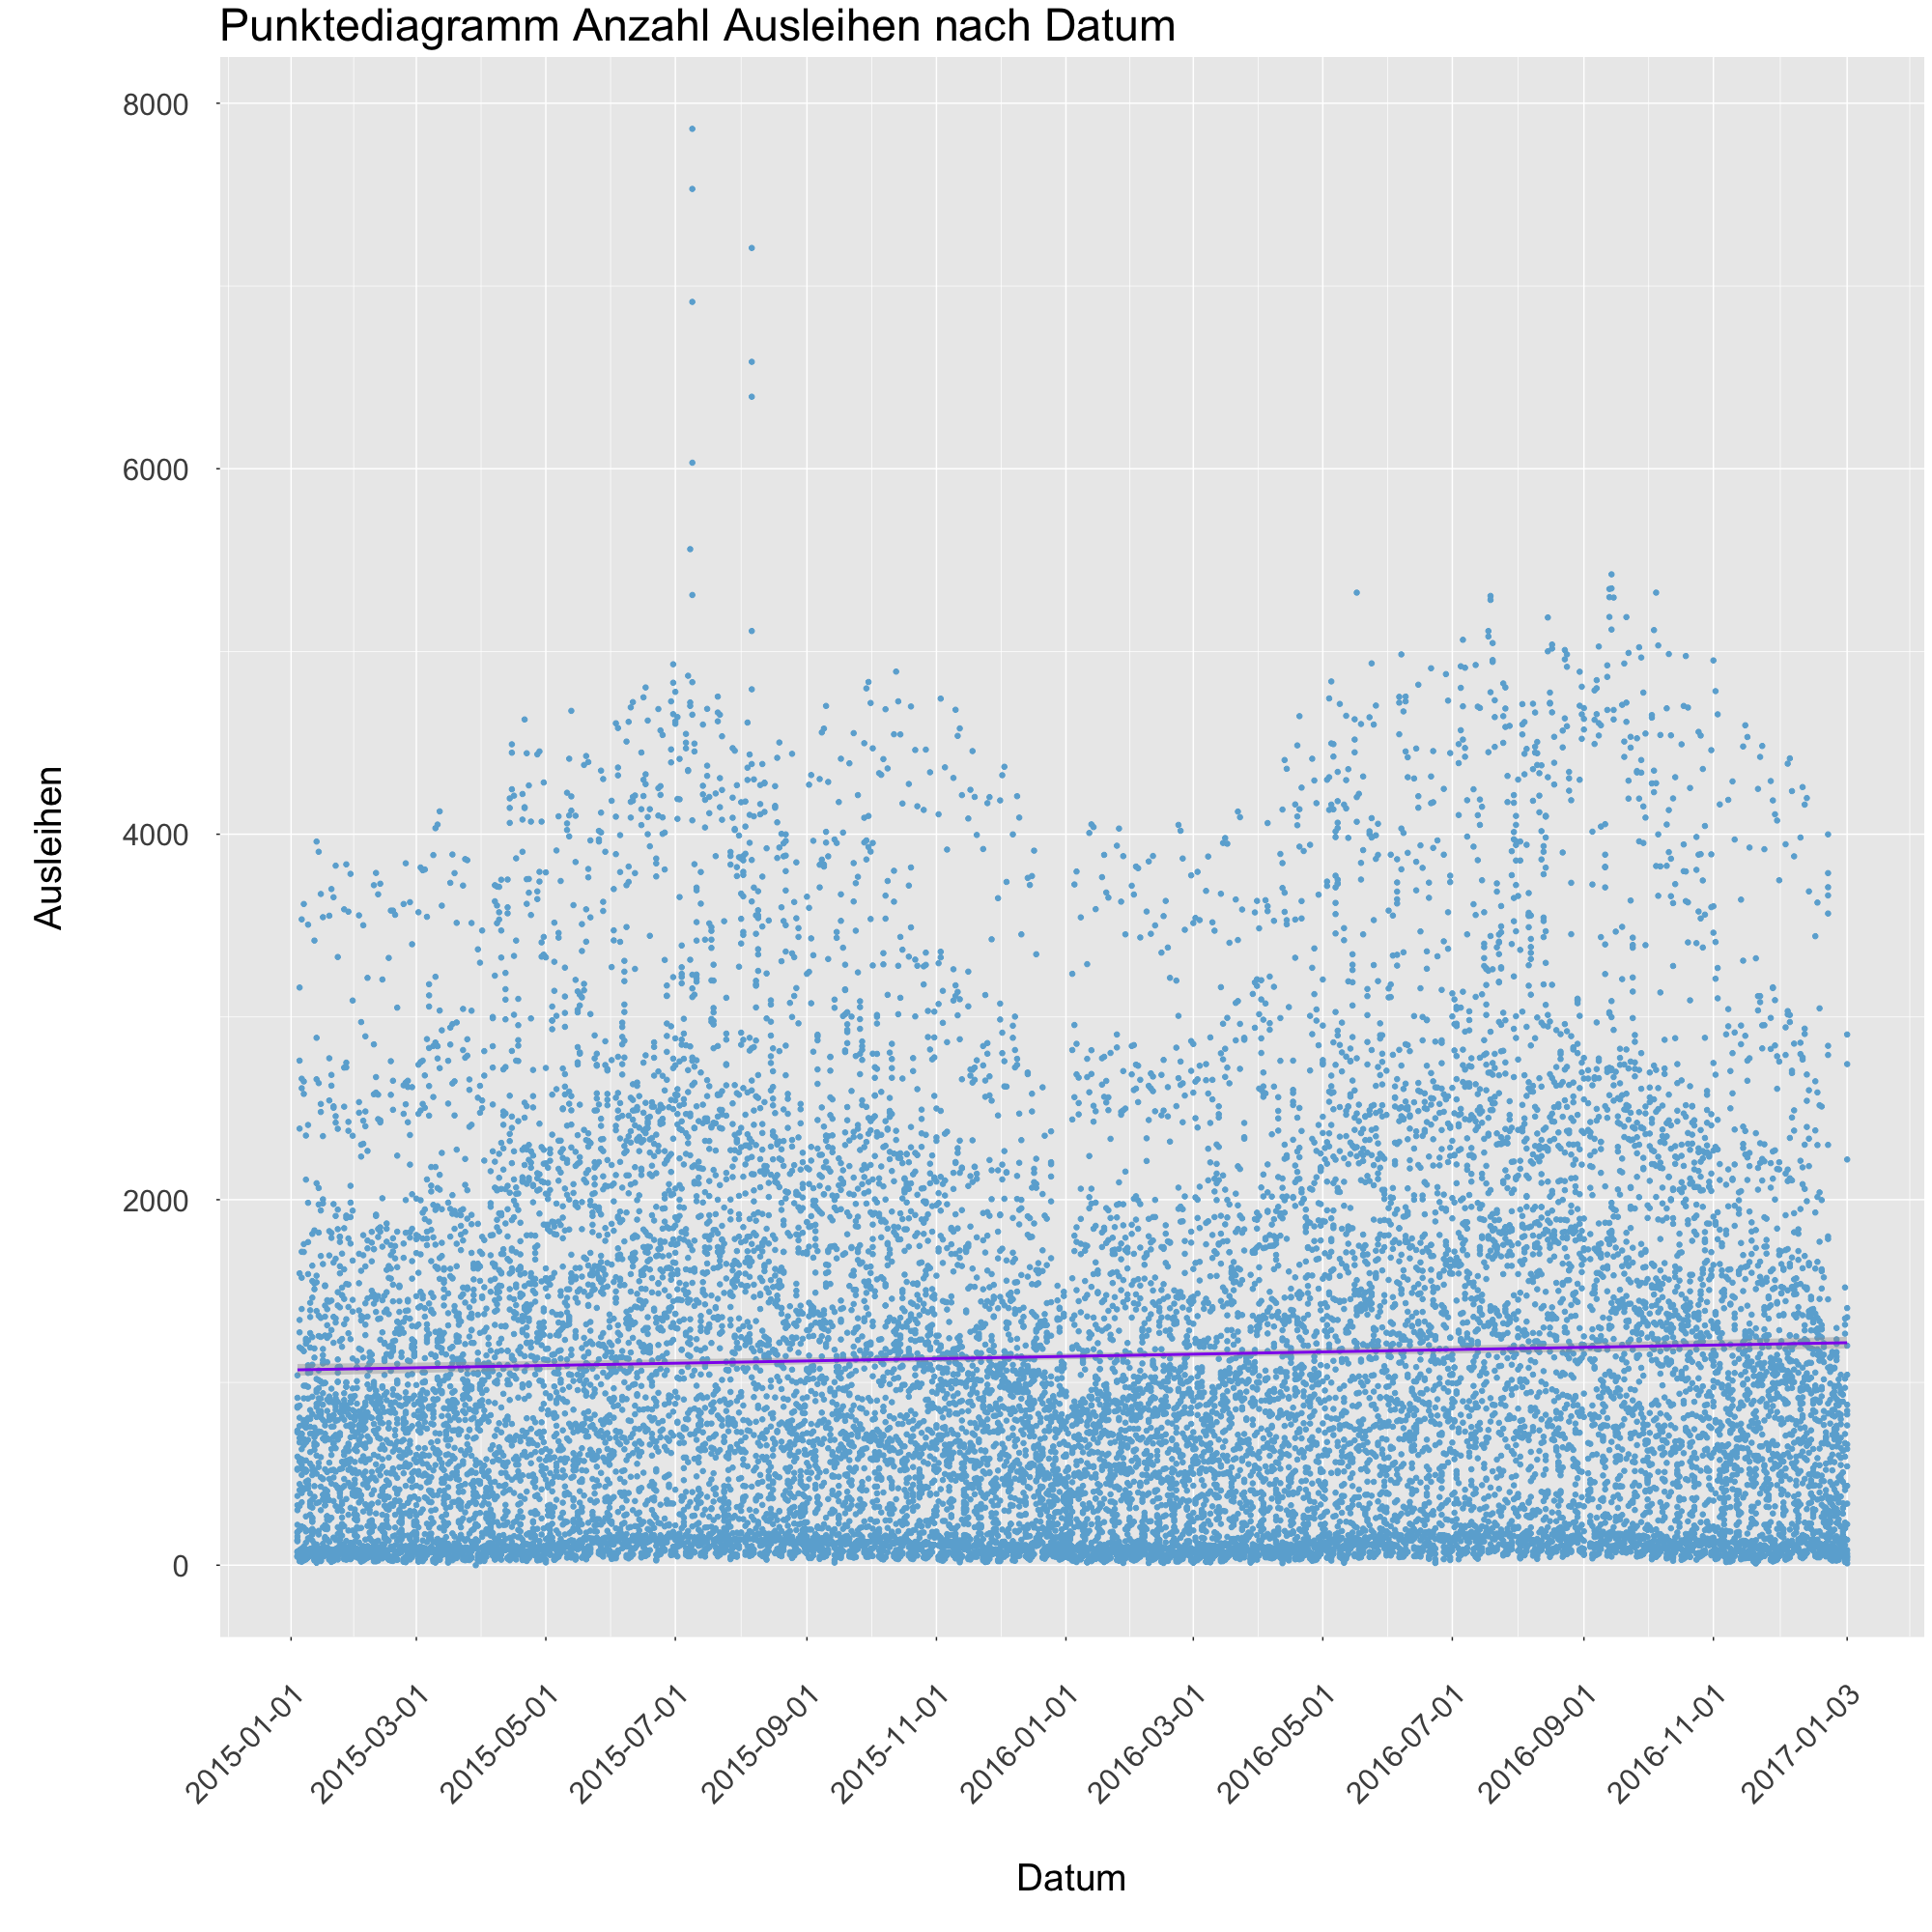

In [26]:
ggplot(data = bike_data, aes(as.Date(x=date),y=cnt)) +
#Cast String to Date https://statisticsglobe.com/convert-character-string-to-date-object-in-r
       geom_point(color="#6baed6") +
       geom_smooth(method = "lm", formula = y ~ x, color = "purple2") +
scale_x_date(date_labels = "%B")+
xlab("Datum") +
ylab("Nutzungsaufzeichnungen von Fahrrädern") +
ggtitle("Punktediagramm Anzahl Ausleihen nach Datum") +
 scale_x_date(breaks = as.Date(c("2015-01-01","2015-03-01", "2015-05-01", "2015-07-01", "2015-09-01","2015-11-01", "2016-01-01","2016-03-01", "2016-05-01", "2016-07-01", "2016-09-01","2016-11-01", "2017-01-03")))+
#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0), angle=45, hjust = 1),
      #https://www.datanovia.com/en/blog/ggplot-date-axis-customization/
      )

options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


### Punktediagramm mit Anzahl Ausleihen nach Datum von Januar 2016 bis Dezember 2016

ERROR: Error in xlab("Datum") + ylab("Ausleihen"): nicht-numerisches Argument für binären Operator


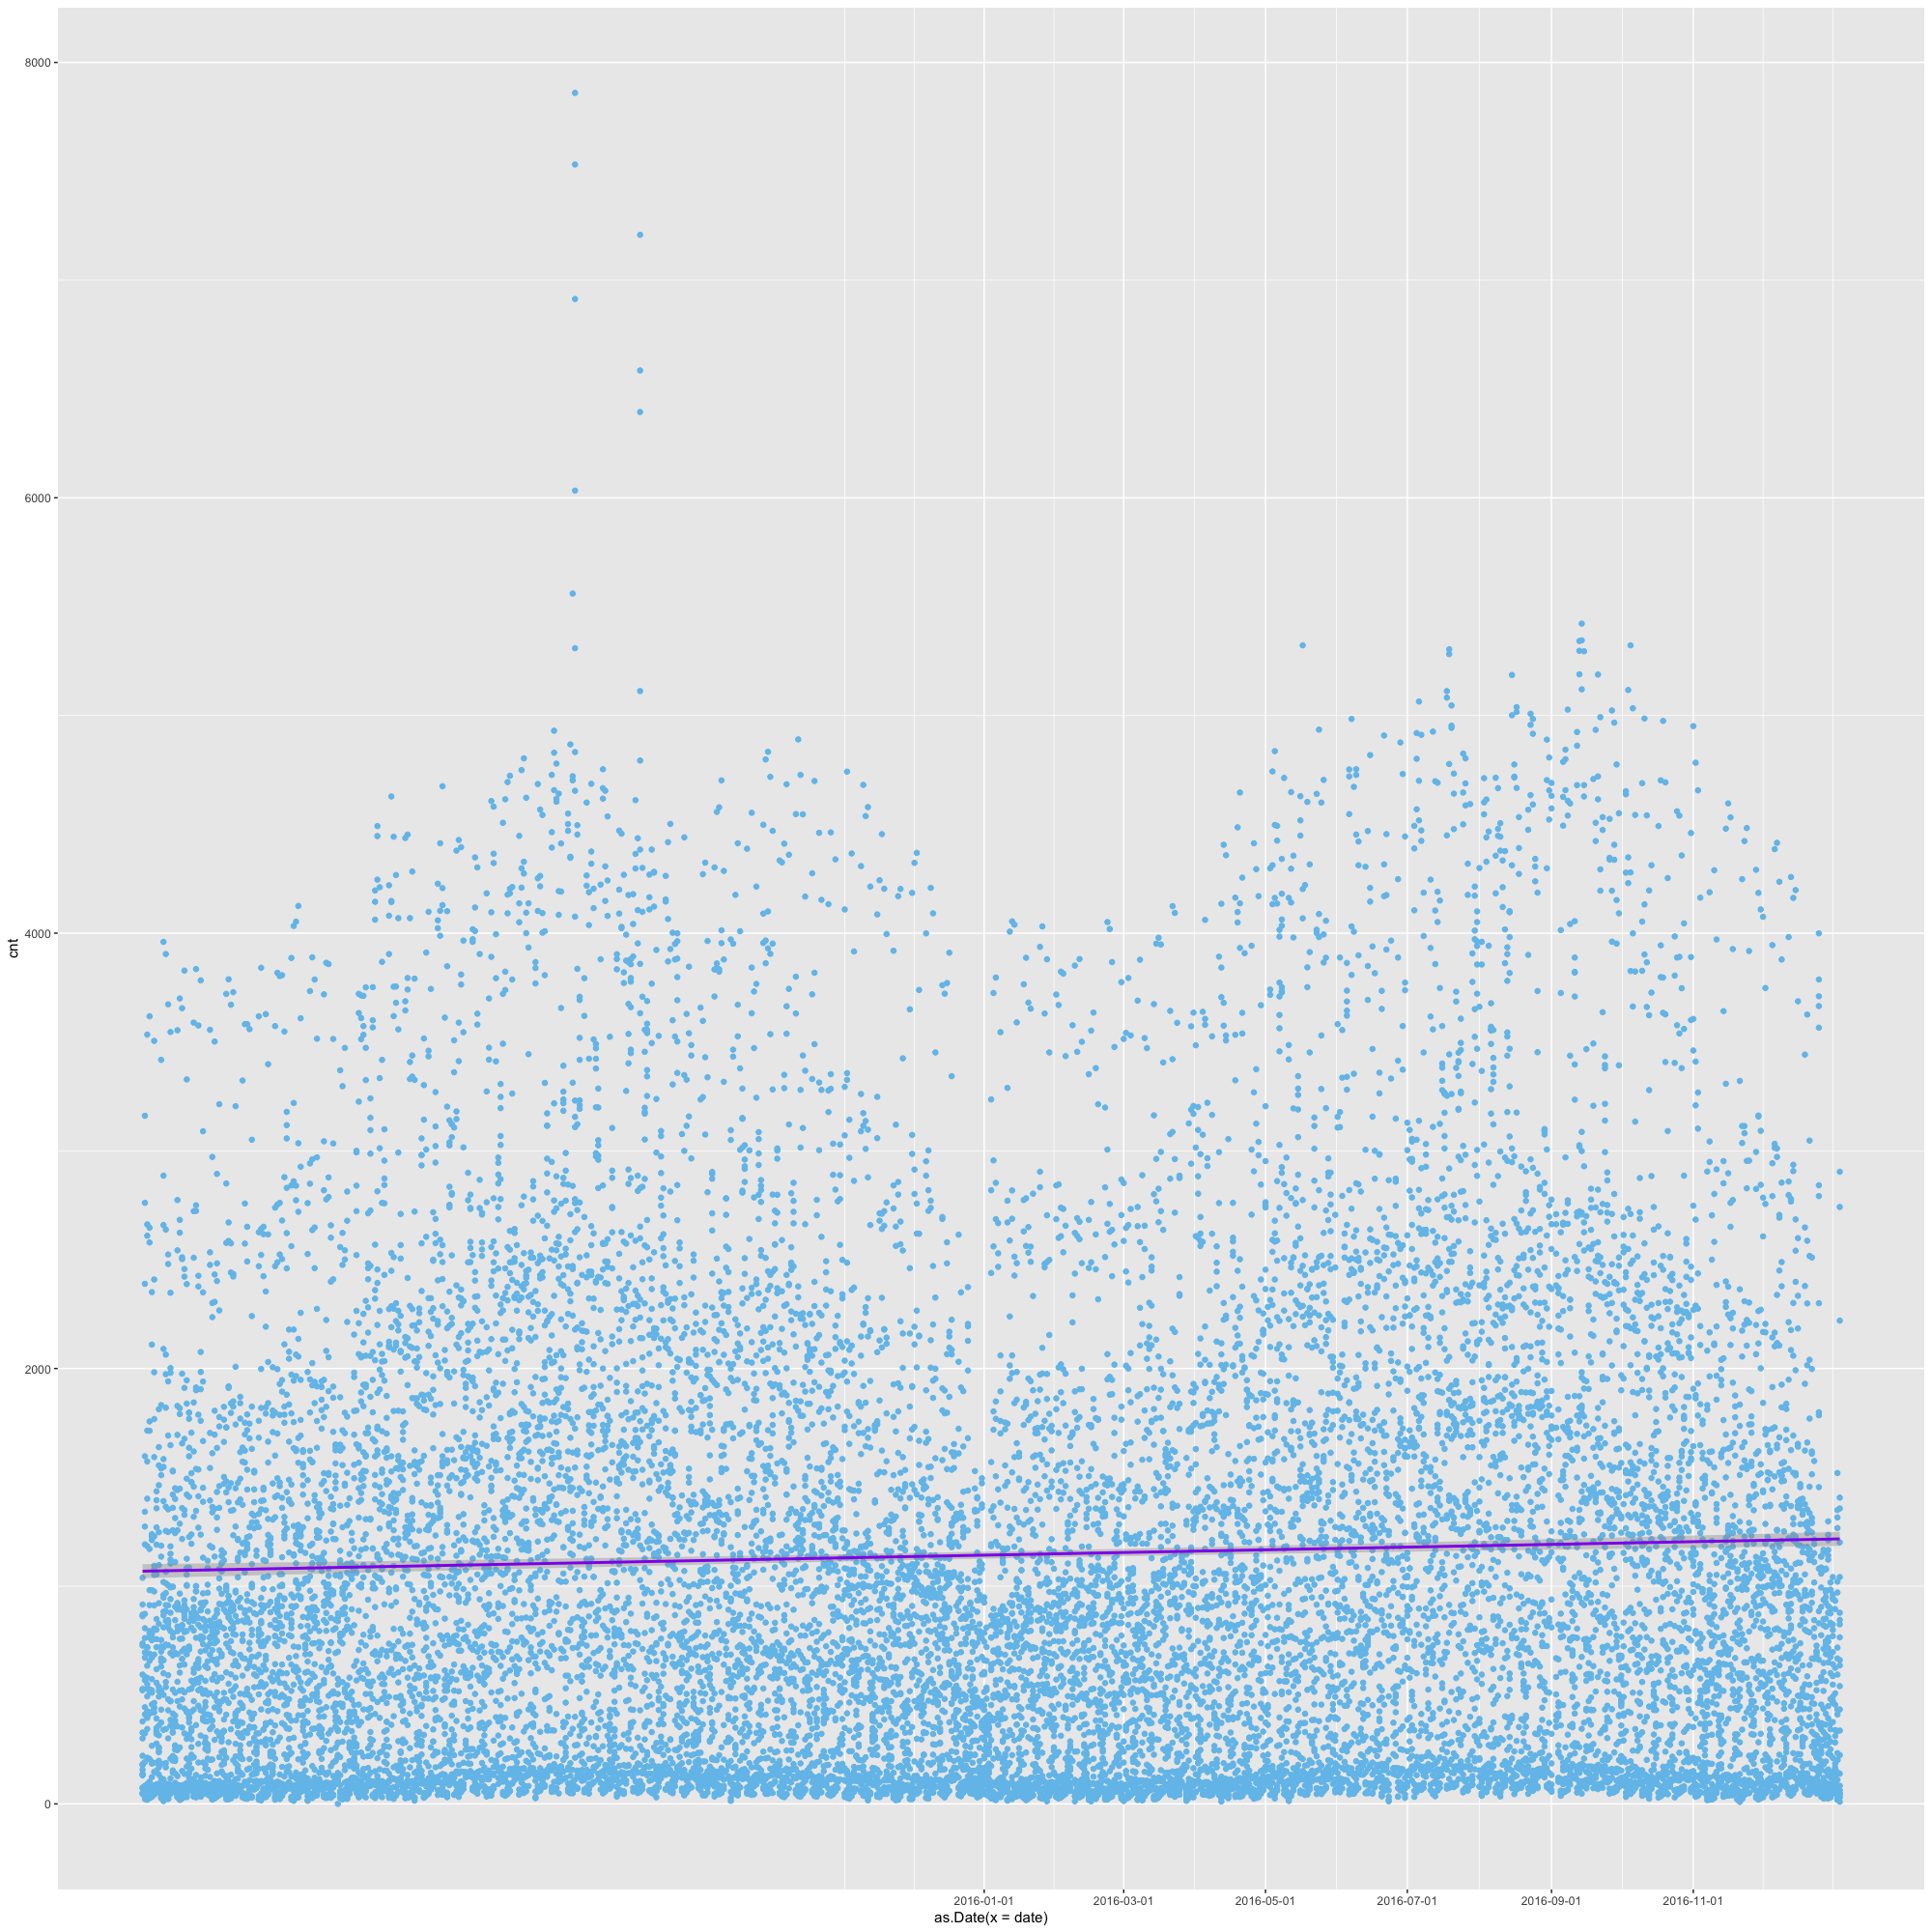

In [25]:
min <- as.Date("2016-01-01")
max <- as.Date("2016-11-01")

ggplot(data = bike_data, aes(as.Date(x=date),y=cnt)) +
#Cast String to Date https://statisticsglobe.com/convert-character-string-to-date-object-in-r
       geom_point(color="#73c1eb") +
       geom_smooth(method = "lm", formula = y ~ x, color = "purple2") +
scale_x_date(breaks = as.Date(c("2016-01-01","2016-03-01", "2016-05-01", "2016-07-01", "2016-09-01","2016-11-01")))
xlab("Datum") +
ylab("Ausleihen") +
ggtitle("Punktediagramm Anzahl Ausleihen nach Datum") +
 scale_x_date(limits = c(min, max))+
#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0), angle=45, hjust = 1),
      #https://www.datanovia.com/en/blog/ggplot-date-axis-customization/
      )

options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

`geom_smooth()` using formula 'y ~ x'



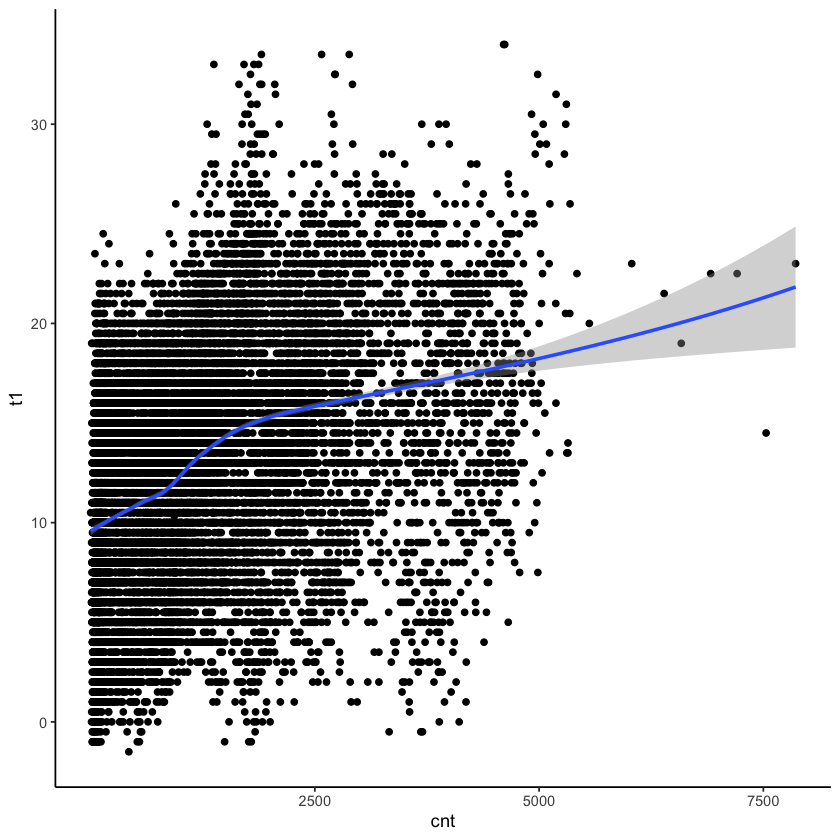

In [4]:
# Line plot with multiple groups
# with lineplot

ggplot(data = bike_data,aes(cnt,t1)) +
  geom_point() +
  geom_smooth(method = "loess") +
  theme_classic()+
scale_x_continuous(limits = c(), breaks = c(2500, 5000, 7500))

### Boxplot Anzahl Ausleihen nach Tageszeit

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


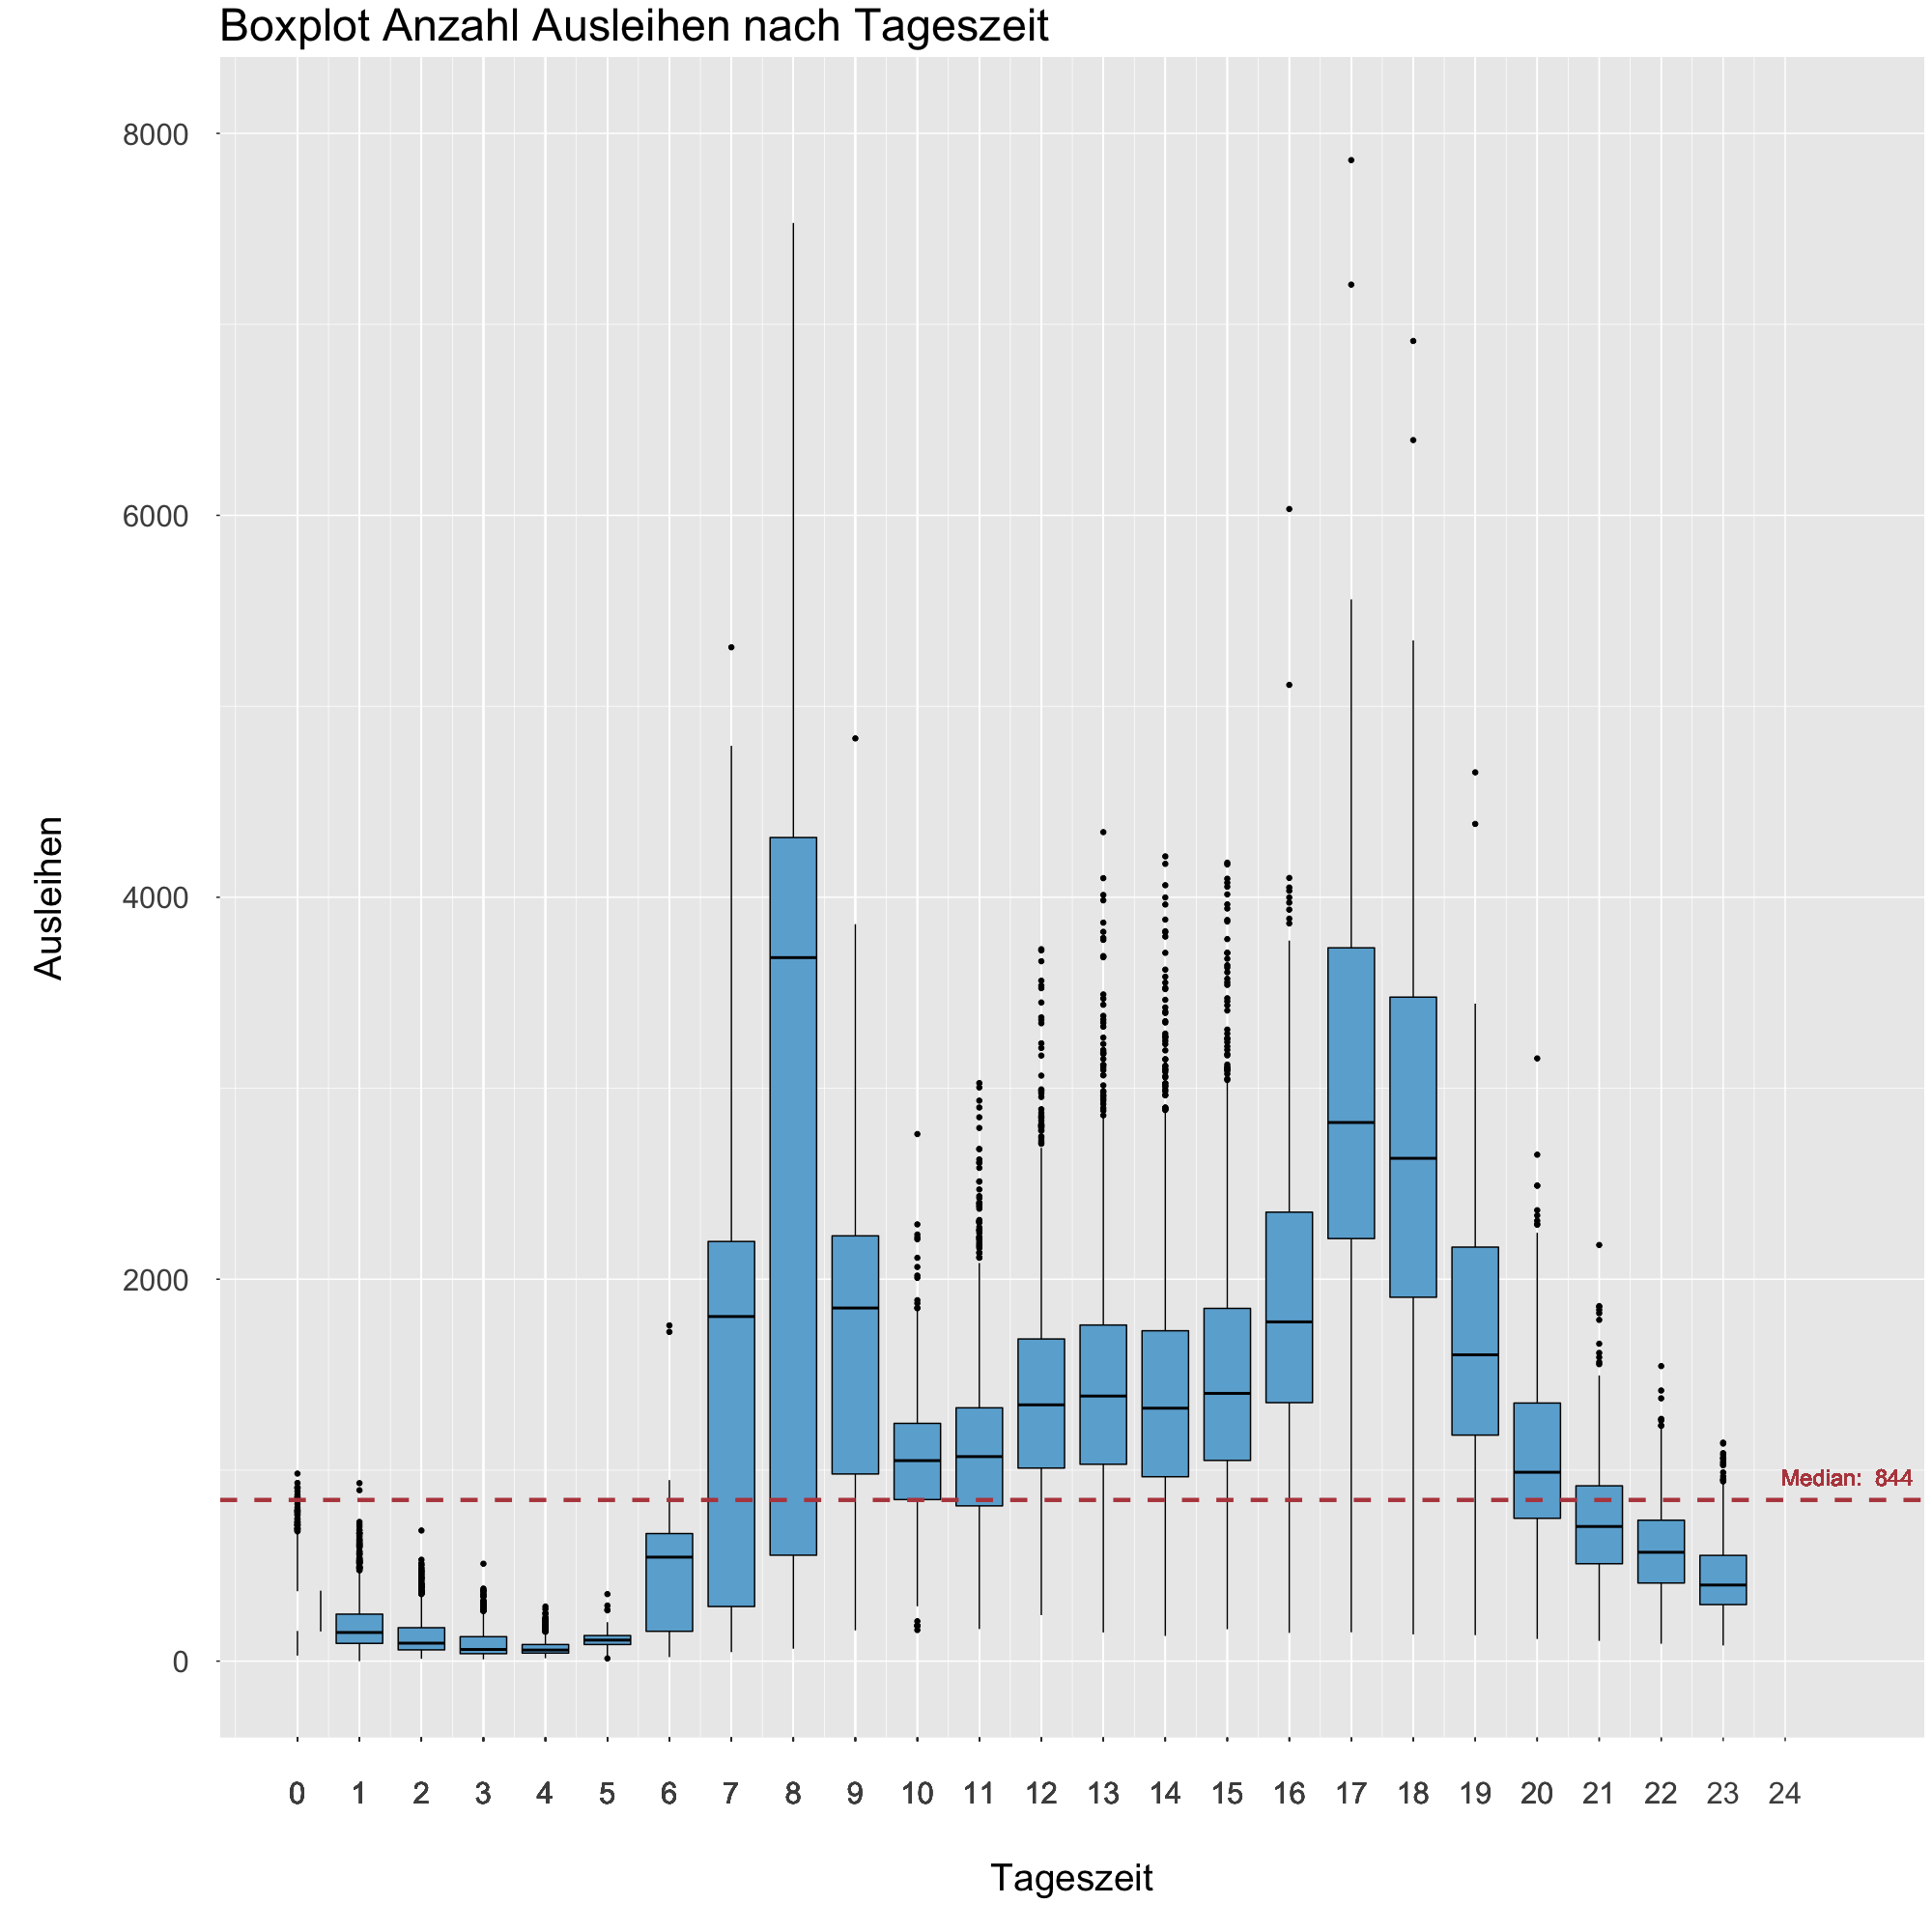

In [24]:
#Median aus Ausleihen berechnen
data <- bike_data$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="#B8494D", vjust = -10.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


#Könnte die Zeit auf 24H ändern mit https://stackoverflow.com/questions/42950909/plotting-daytime-without-date-in-ggplot2/42955819?noredirect=1#comment73016883_42955819

Aus diesem Histogramm kann abgelesen werden, zu welchen Tageszeiten durchschnittlich am meisten Fahrräder ausgeliehen werden. Es ist zudem auch sichtbar, wie gross die Streuung zu den verschiedenen Uhrzeiten ist.

### Boxplot Anzahl Ausleihen nach Tageszeit am Wochenende

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


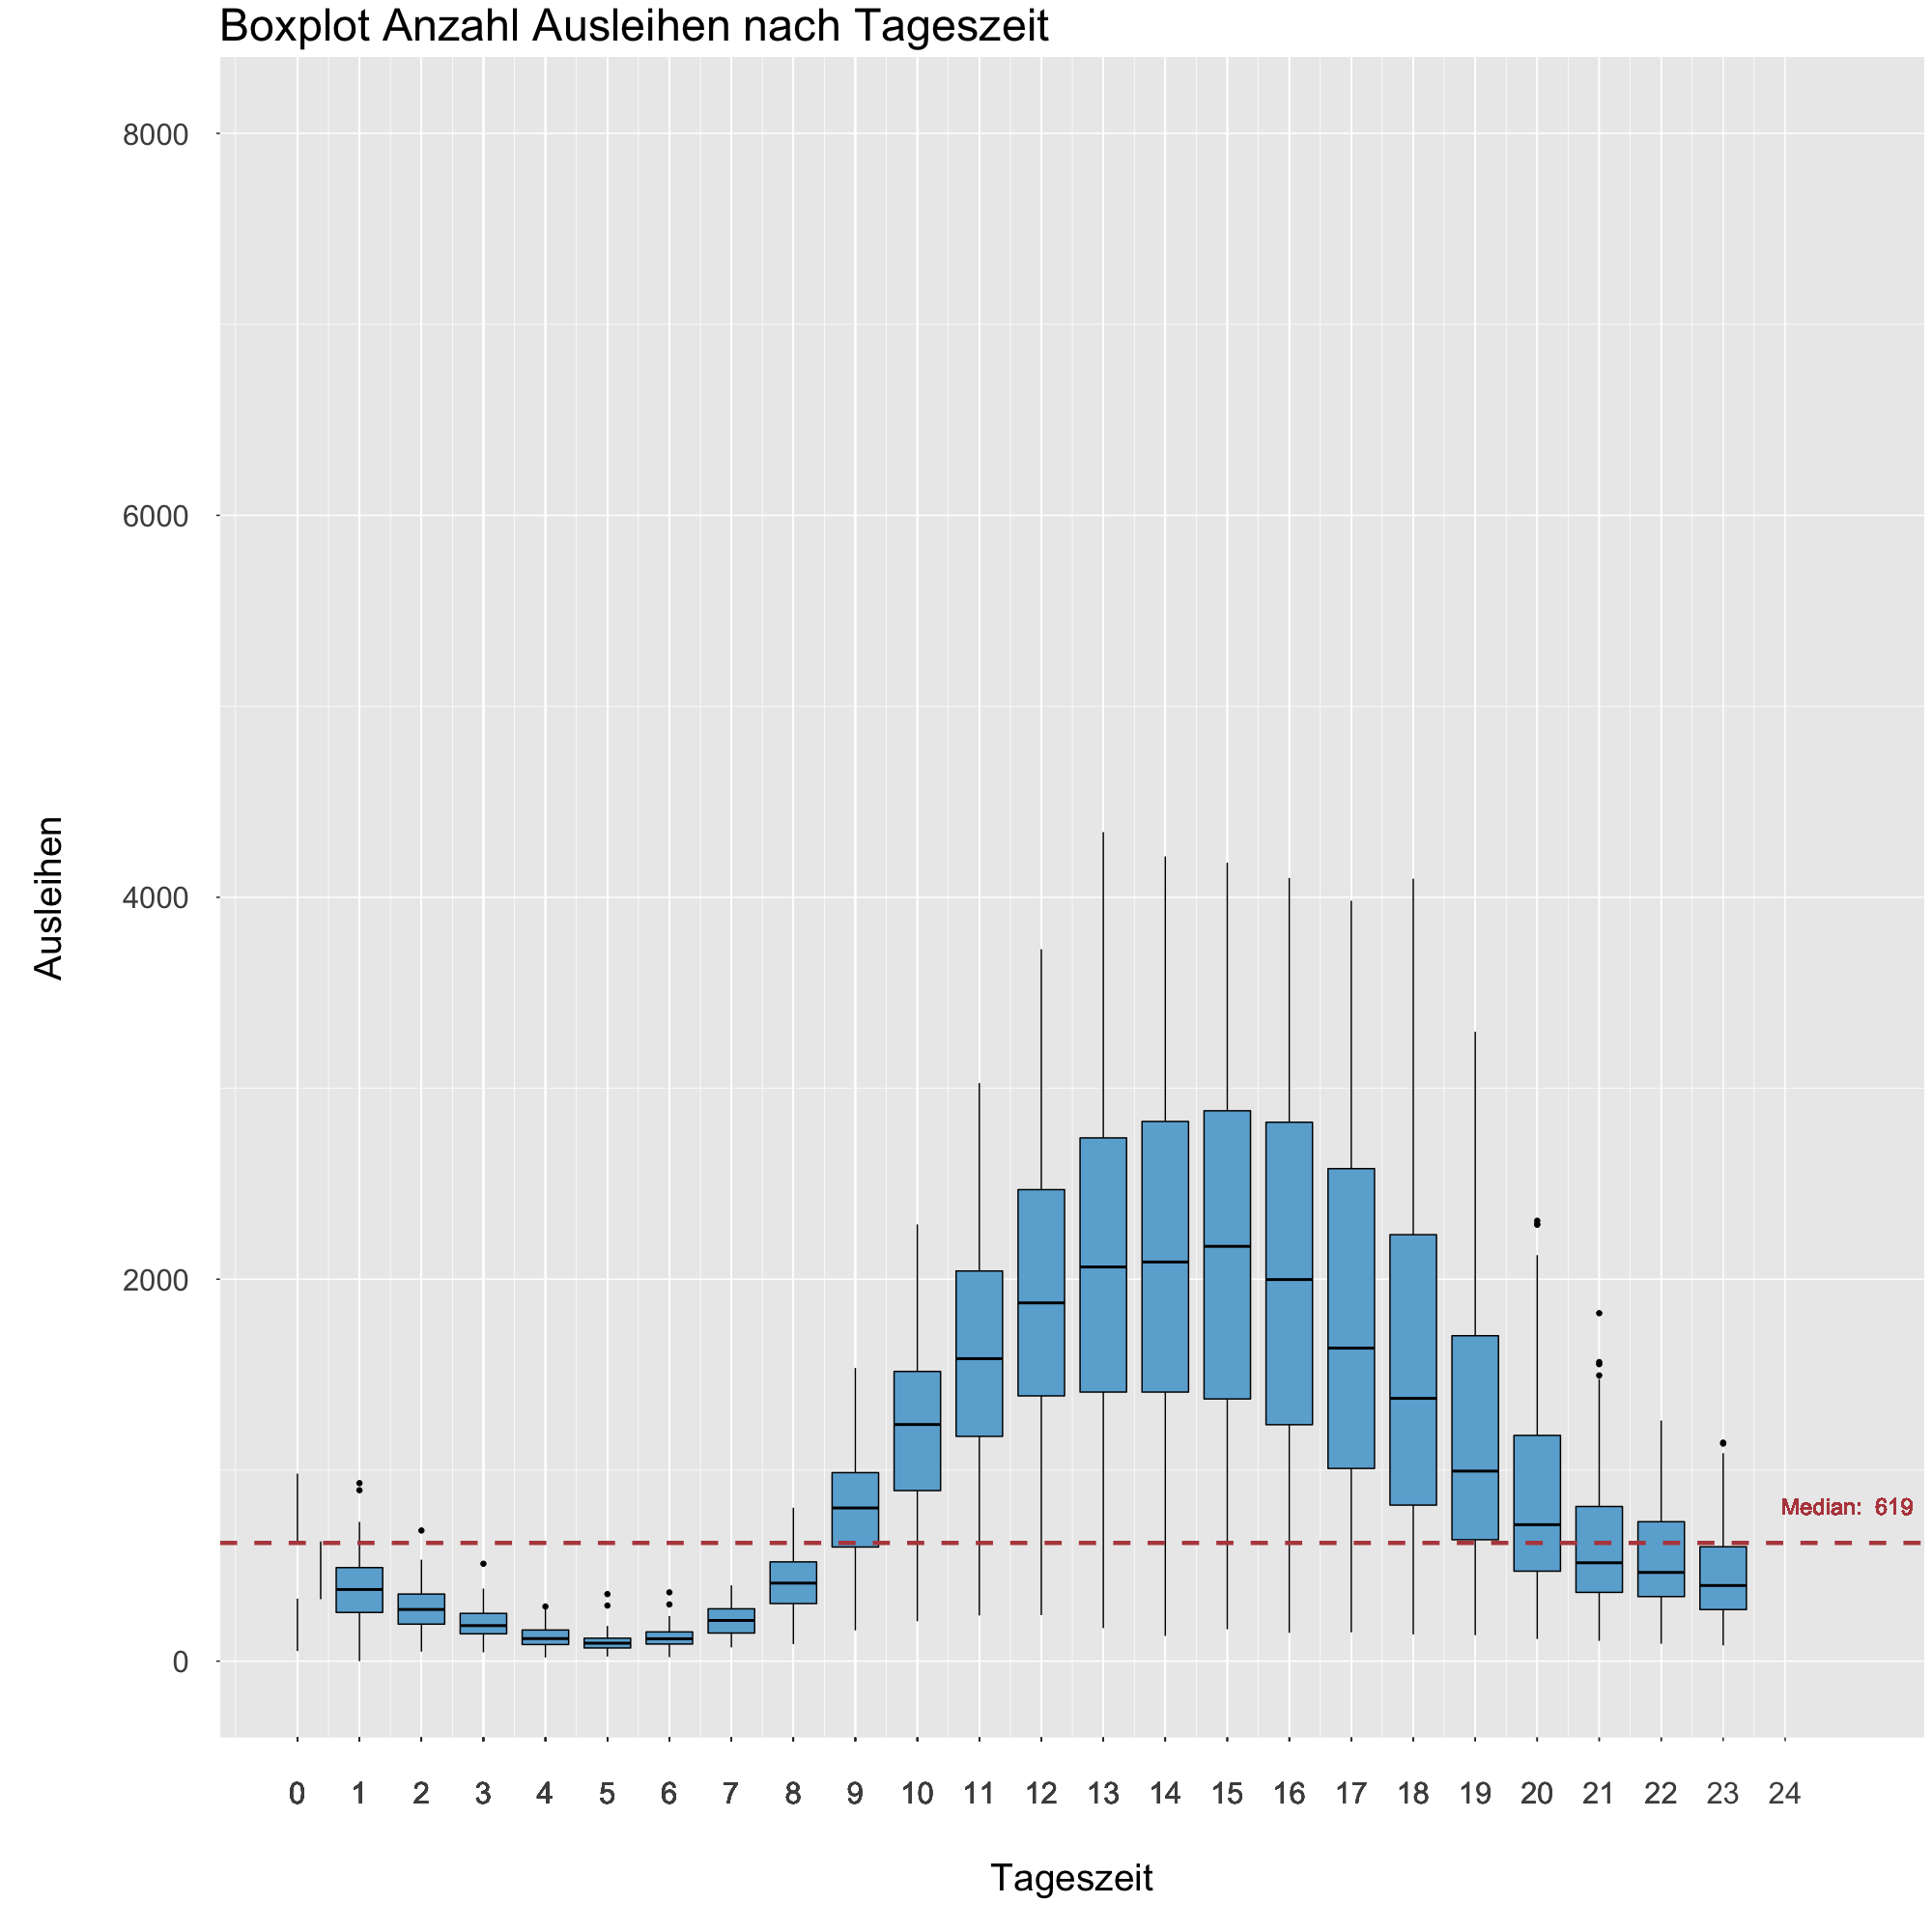

In [45]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$is_weekend == 1)

#Median aus Ausleihen berechnen
data <- filter_bike_data$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="#B8494D", vjust = -08.7, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Tageszeit unter der Woche

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


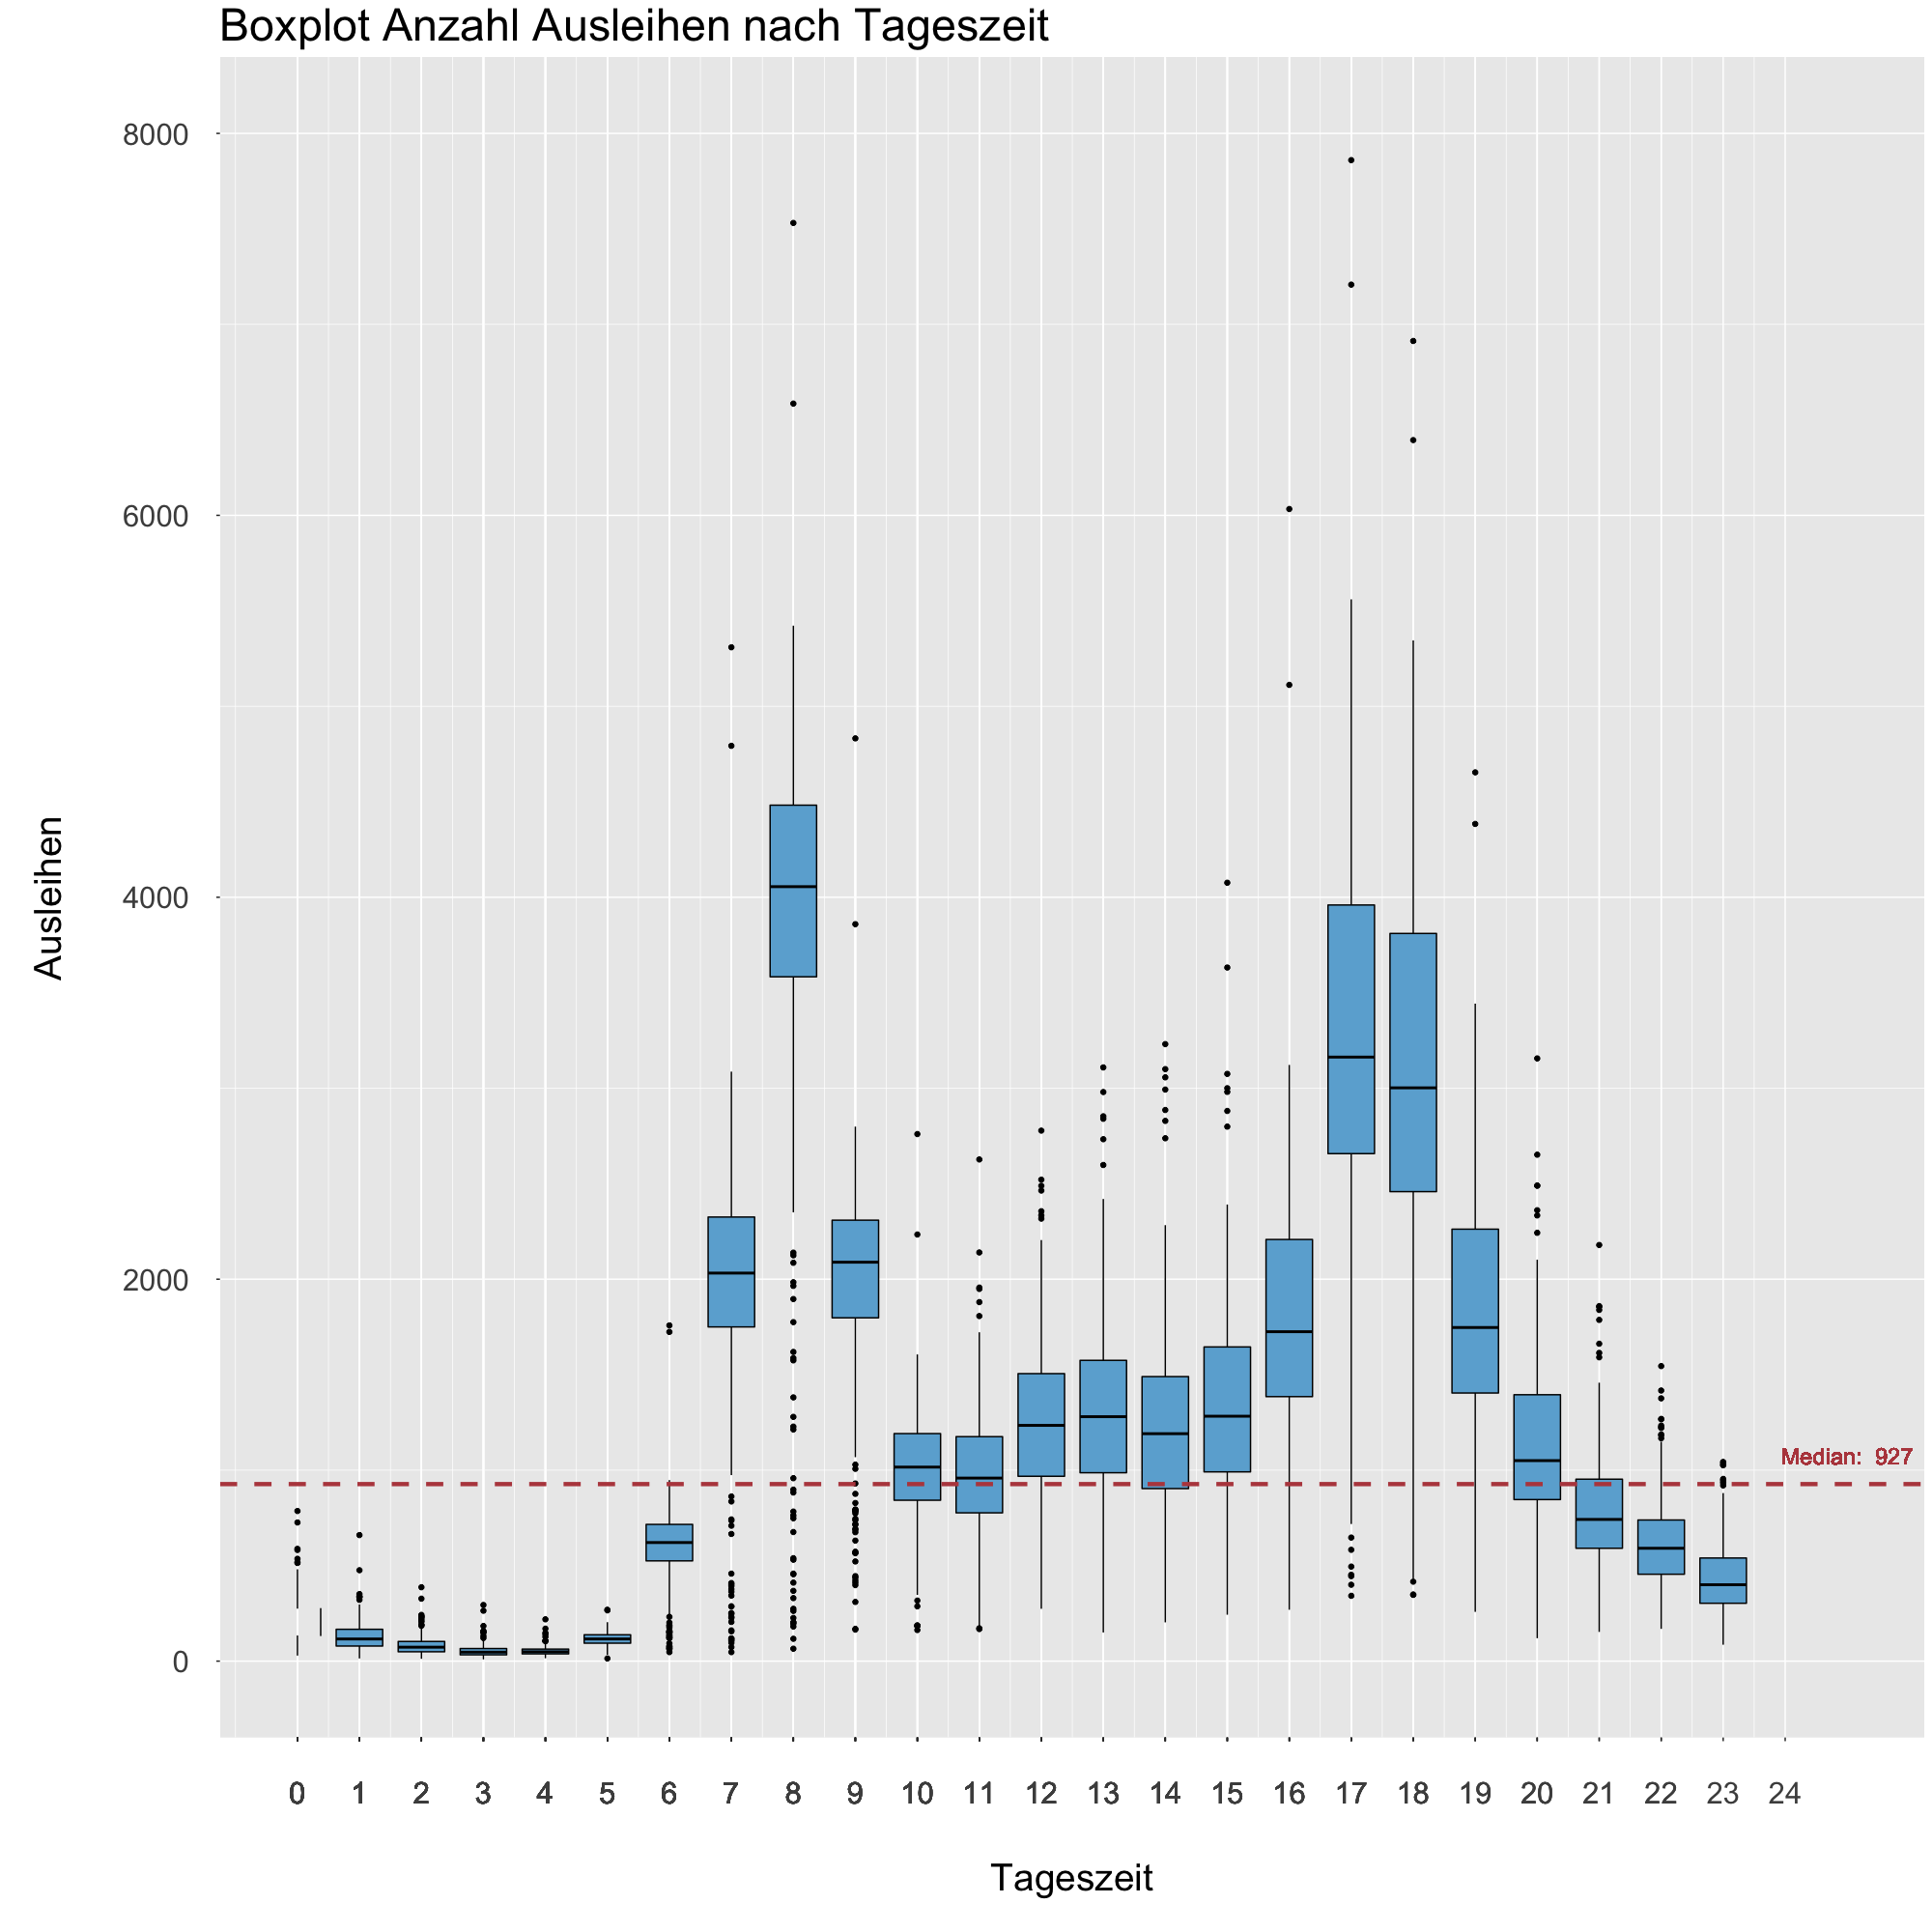

In [30]:
#Filter
filter_bike_data_weekend <- bike_data %>% filter(bike_data$is_weekend == 0)

#Median aus Ausleihen berechnen
data <- filter_bike_data_weekend$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data_weekend, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=25, label=zusammen , y = 20), colour="#B8494D", vjust = -11.8, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Wochentage gefiltert schönes Wetter

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


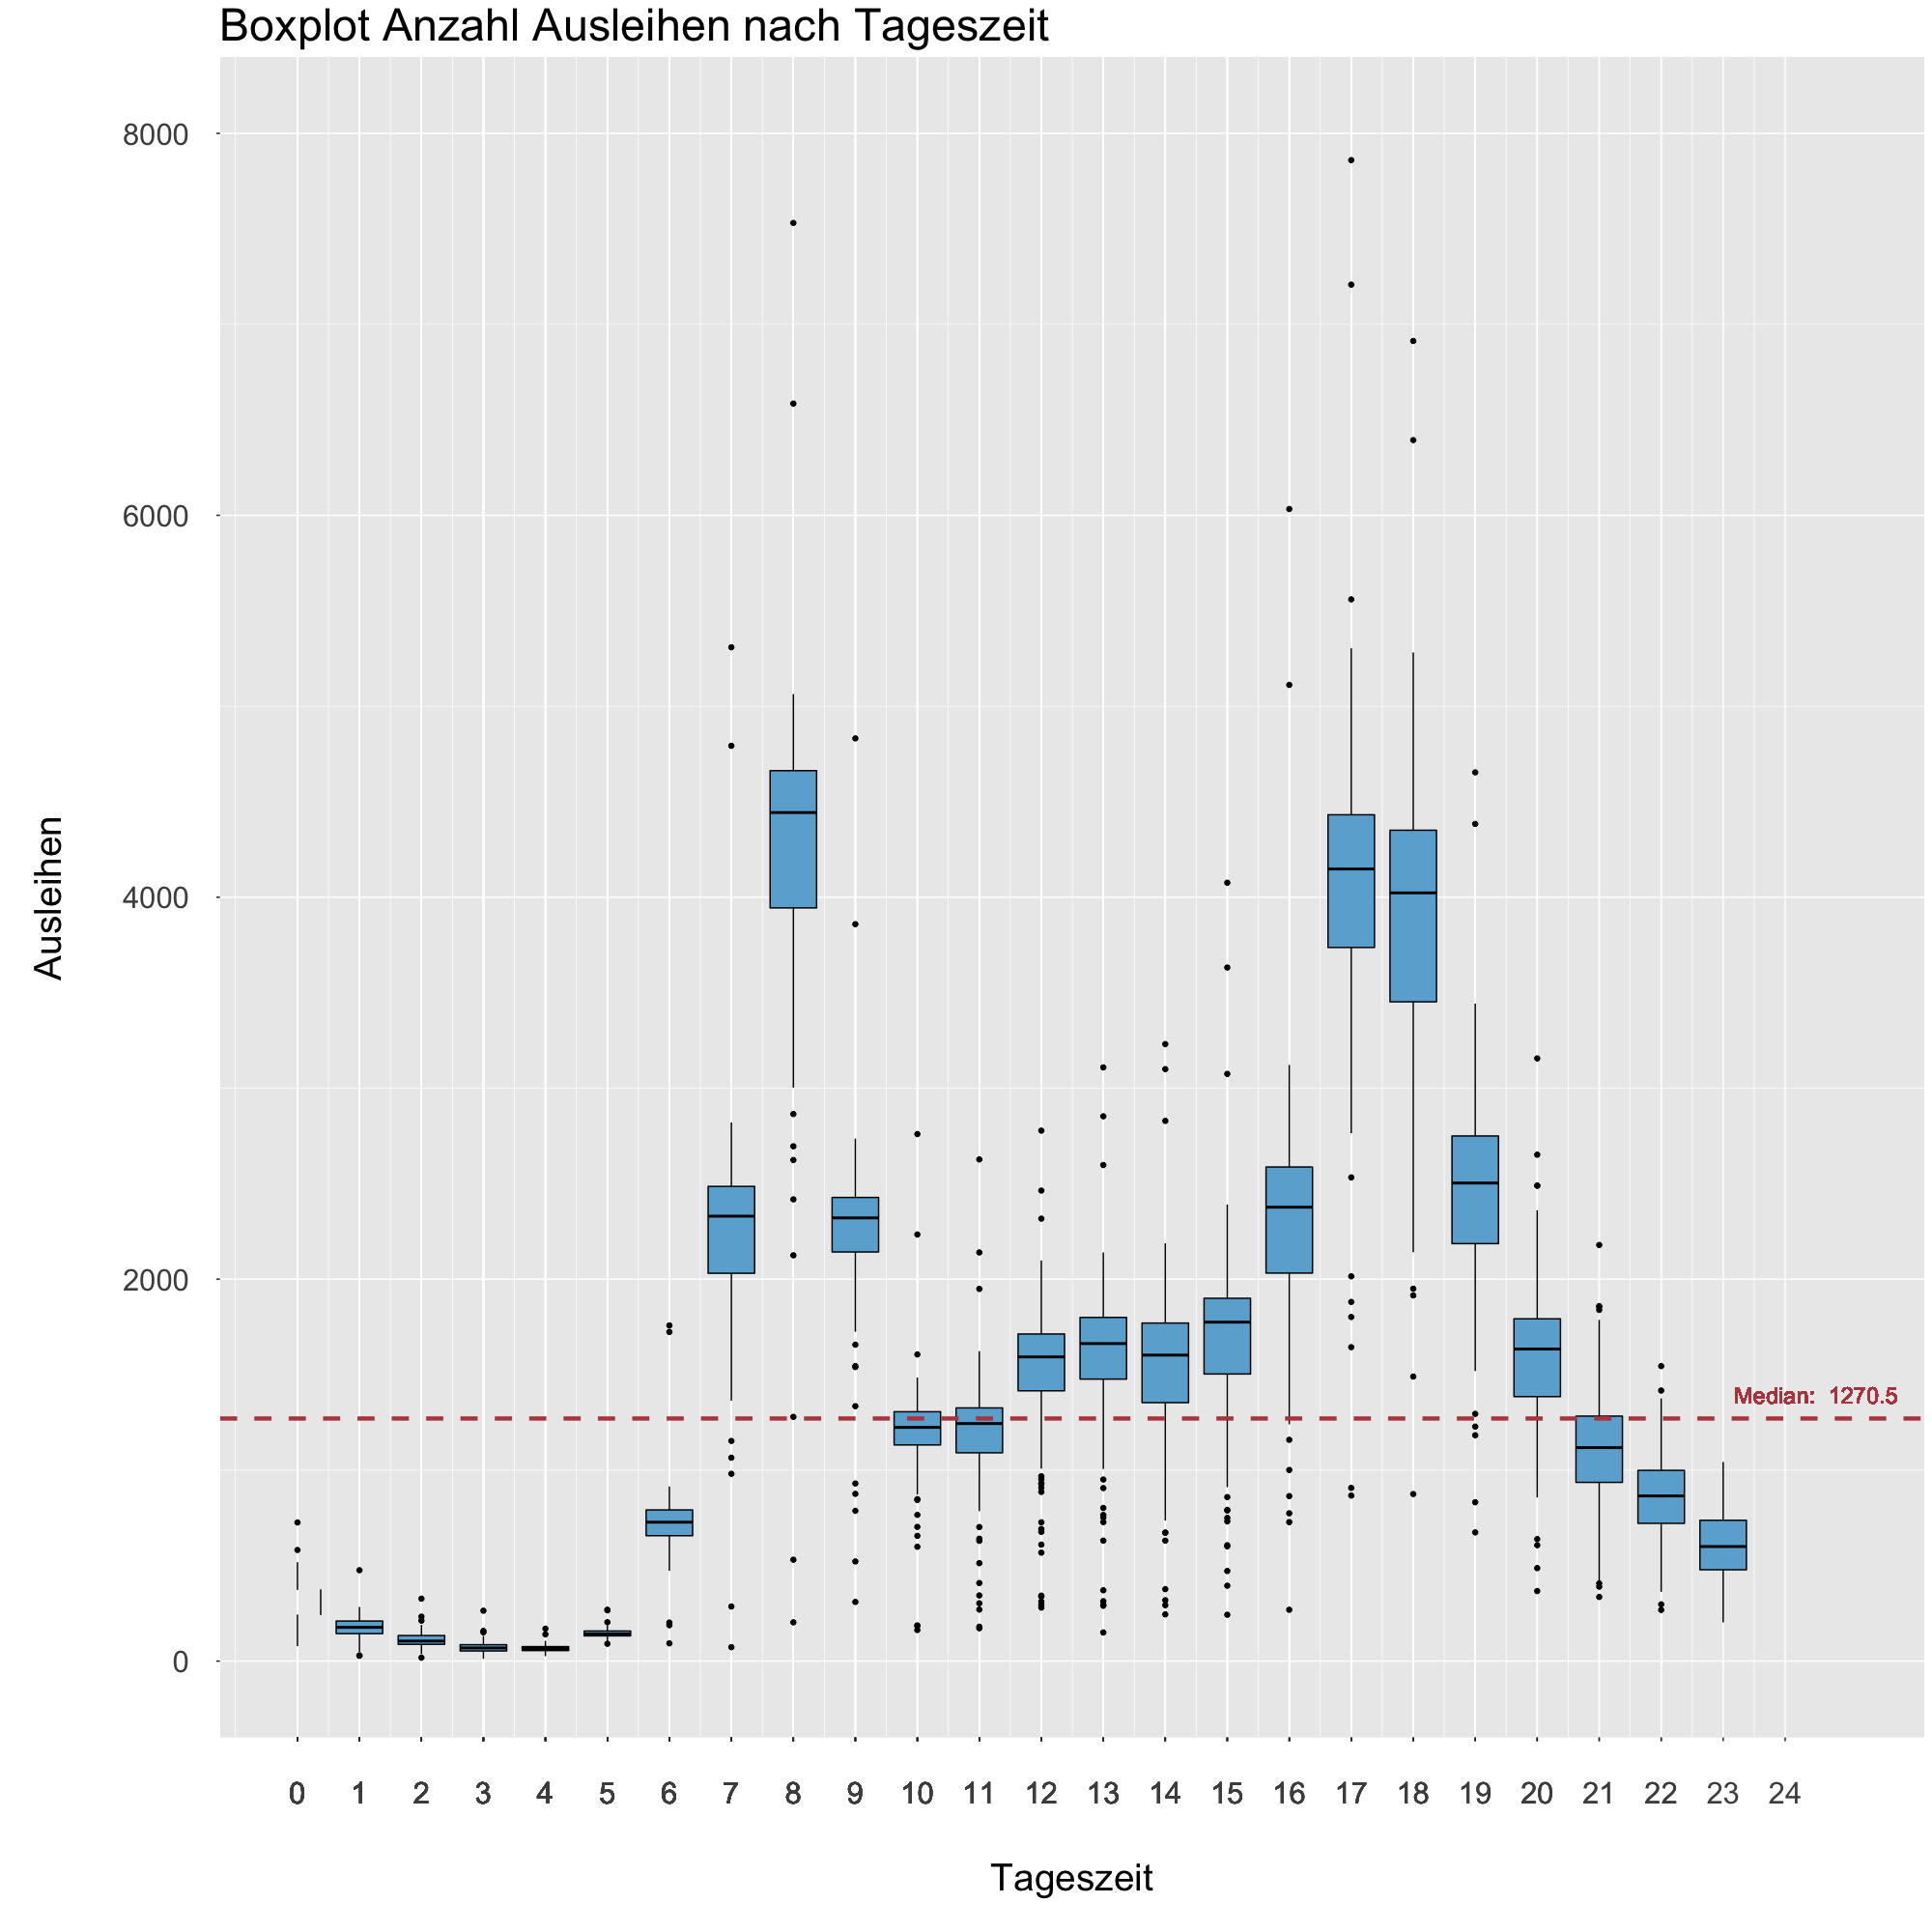

In [36]:
#Filter
filter_bike_data_weekend <- bike_data %>% filter(bike_data$is_weekend == 0)
filter_bike_data_weekend_nice <- filter_bike_data_weekend %>% filter(filter_bike_data_weekend$weather_code == 1)
filter_bike_data_weekend_nice_summer <- filter_bike_data_weekend %>% filter(filter_bike_data_weekend$season == 1)

#Median aus Ausleihen berechnen
data <- filter_bike_data_weekend_nice_summer$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data_weekend_nice_summer, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=24.5, label=zusammen , y = 20), colour="#B8494D", vjust = -15.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Tageszeit an Ferientagen

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


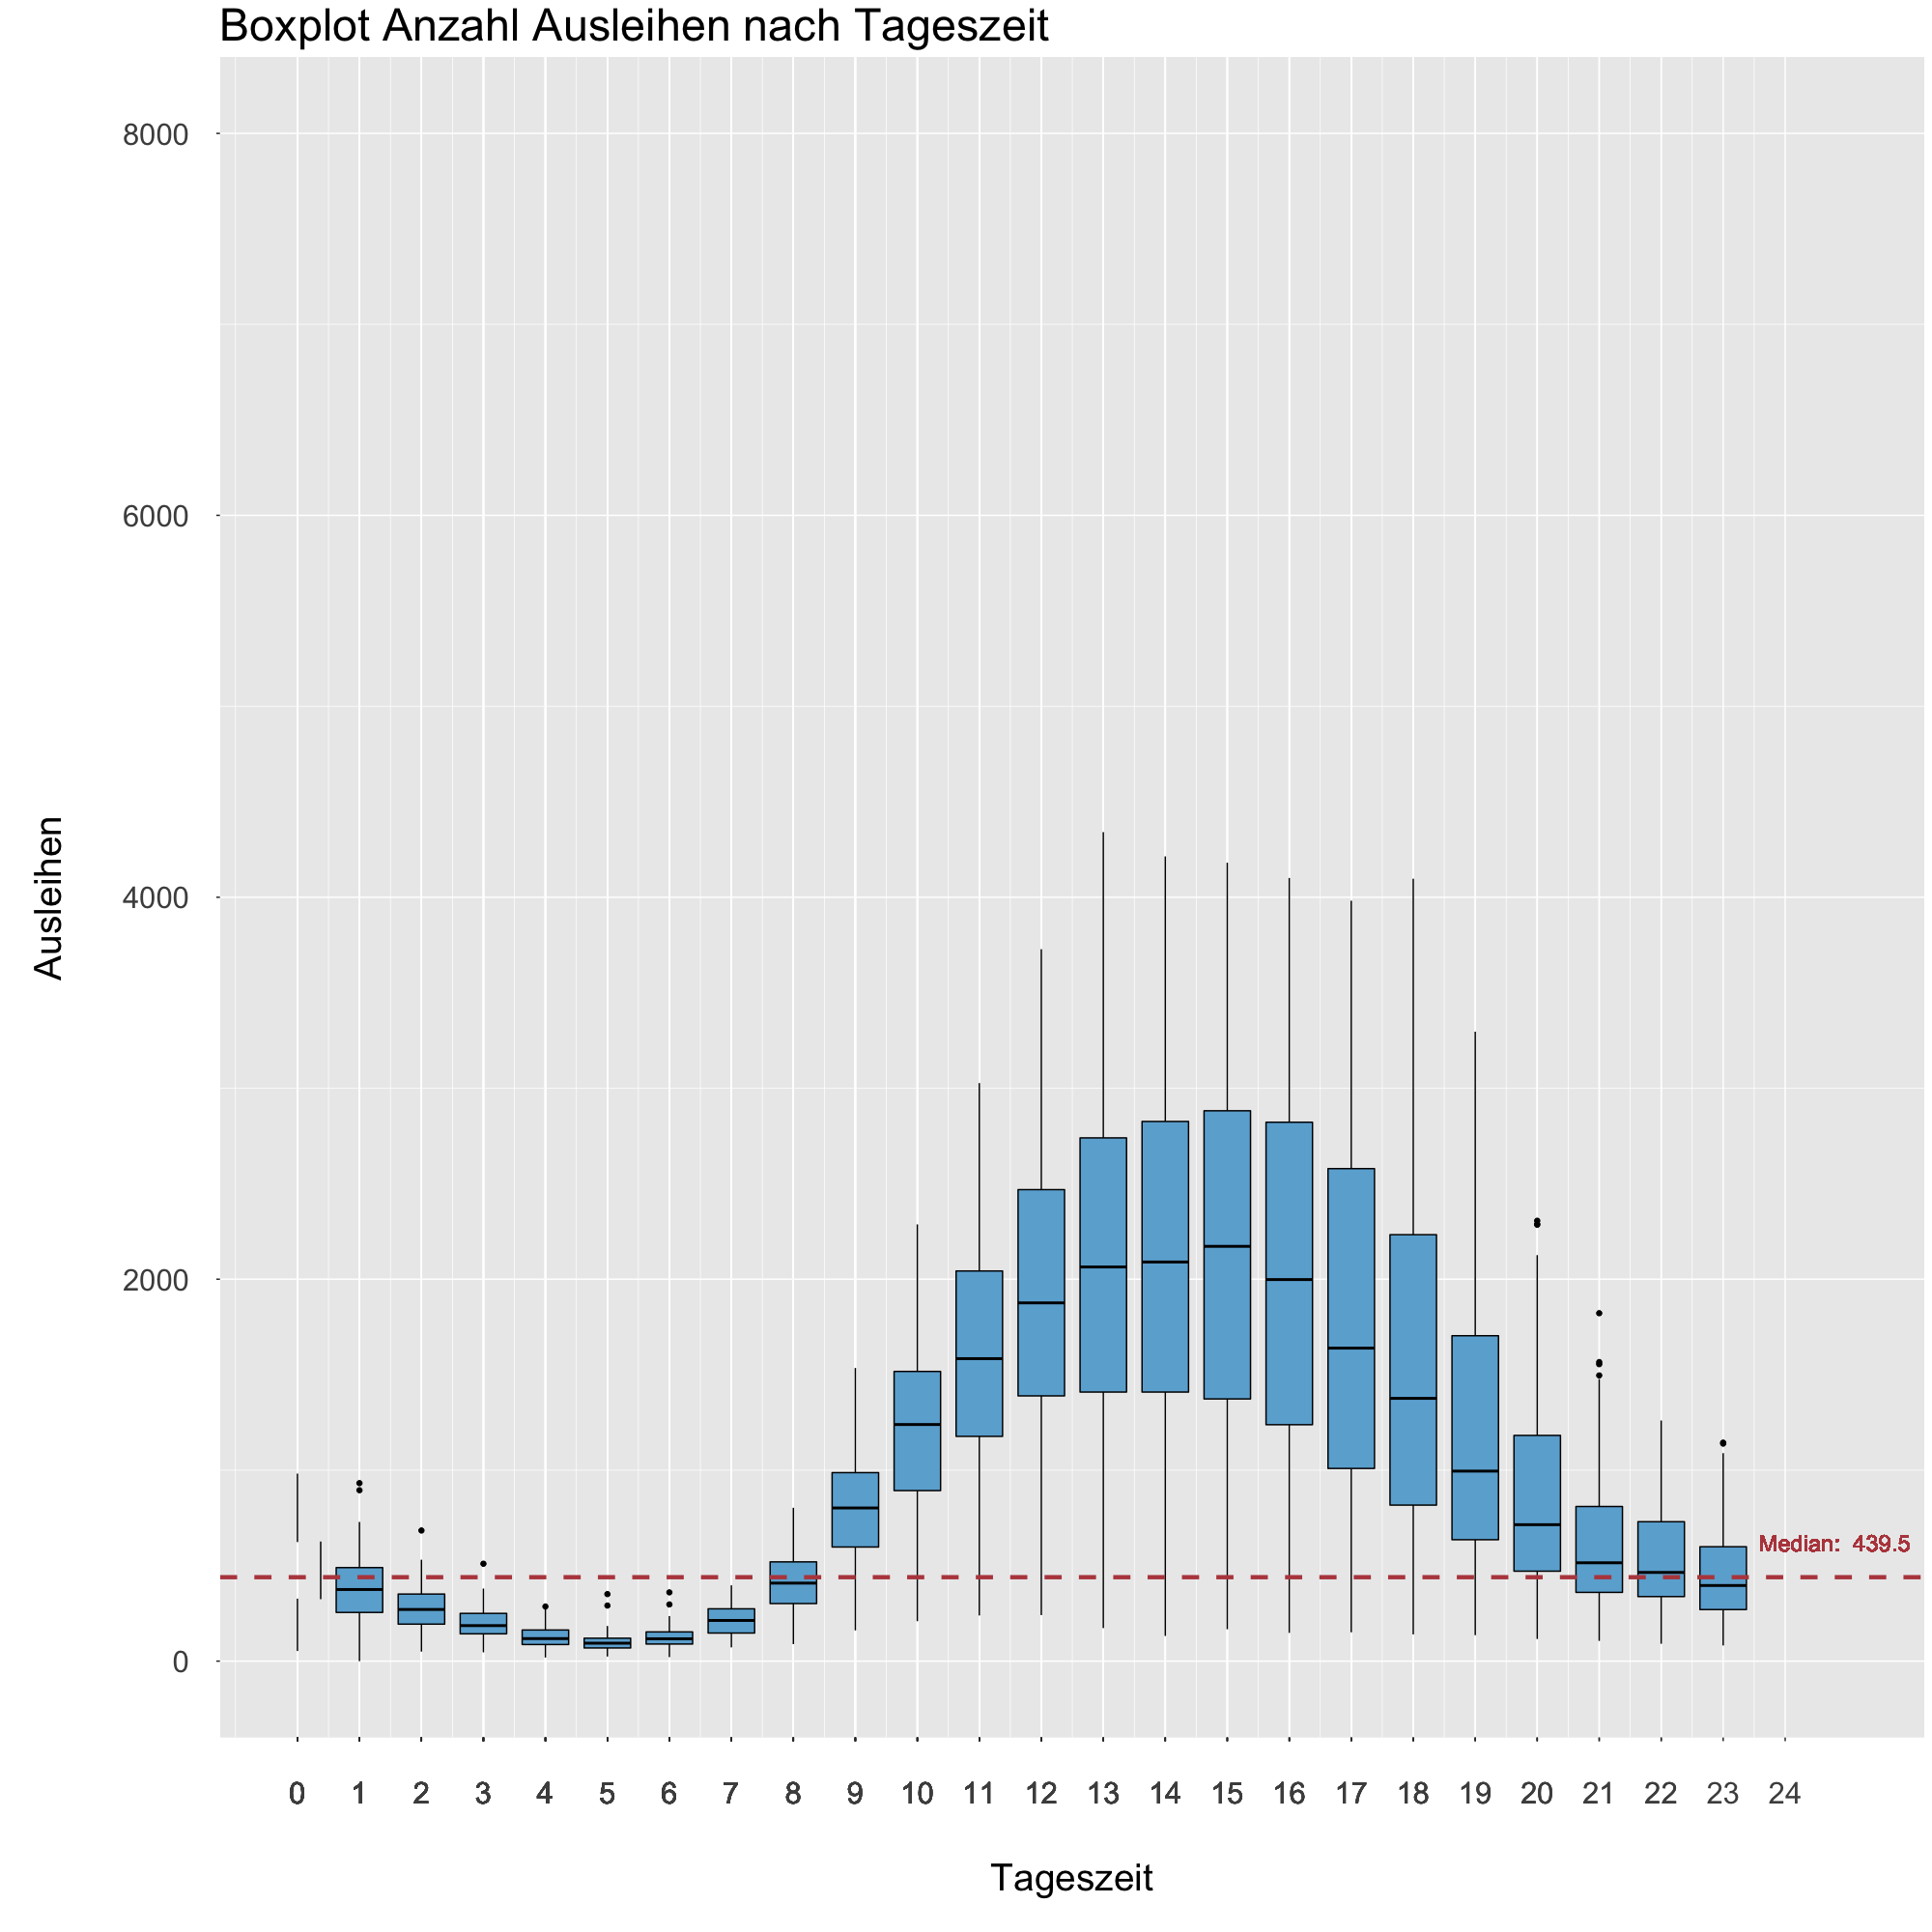

In [42]:
#Filter
filter_bike_data_holiday <- bike_data %>% filter(bike_data$is_holiday == 1)

#Median aus Ausleihen berechnen
data <- filter_bike_data_holiday$cnt
med <-median(data)
zusammen <- paste("Median: ",med)



#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
      geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit ") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=24.8, label=zusammen , y = 20), colour="#B8494D", vjust = -6.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


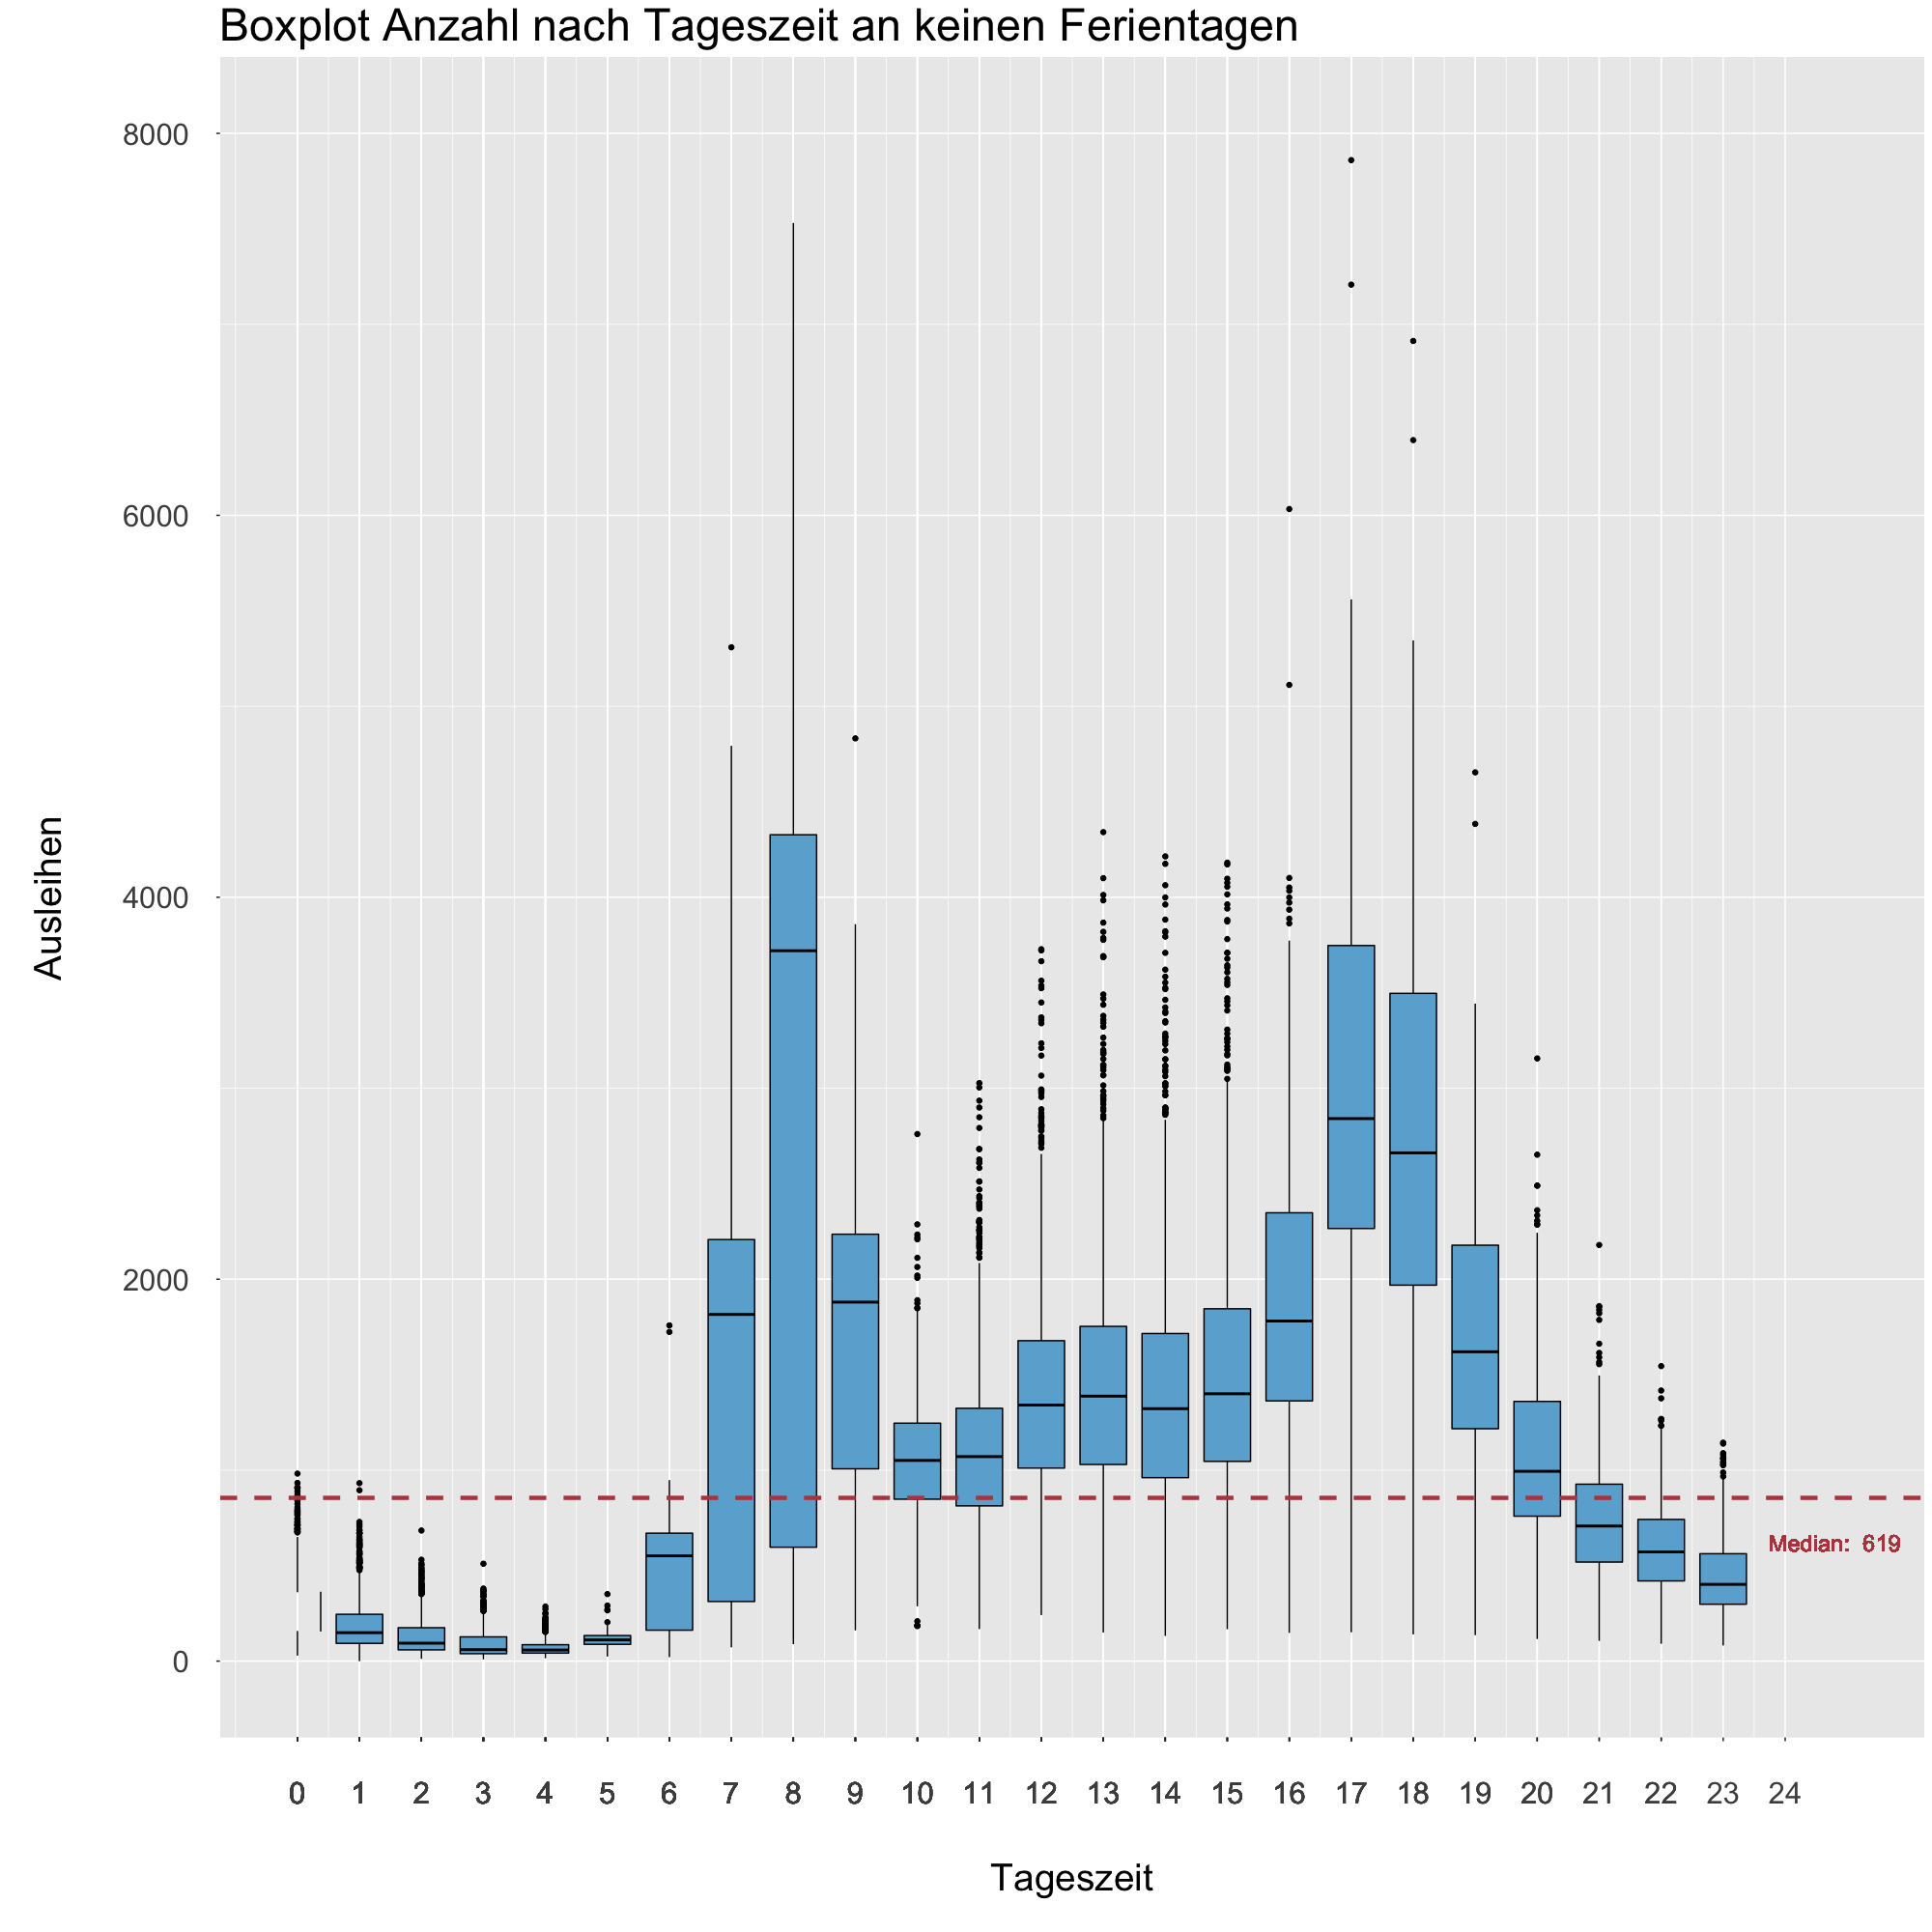

In [47]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$is_holiday == 0)

#Median aus Ausleihen berechnen
med <- filter_bike_data$cnt

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
      geom_boxplot( fill="#6baed6", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl nach Tageszeit an keinen Ferientagen") +
geom_hline(yintercept= median(med), color = "#B8494D", linetype='dashed', size = 1.5 ) +
geom_text(aes(x=24.8, label=zusammen , y = 20), colour="#B8494D", vjust = -6.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(00:00, 02:00, 04:00, 06:00, 08:00, 10:00, 12:00, 14:00, 16:00, 18:00, 20:00, 22:00, 24:00)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


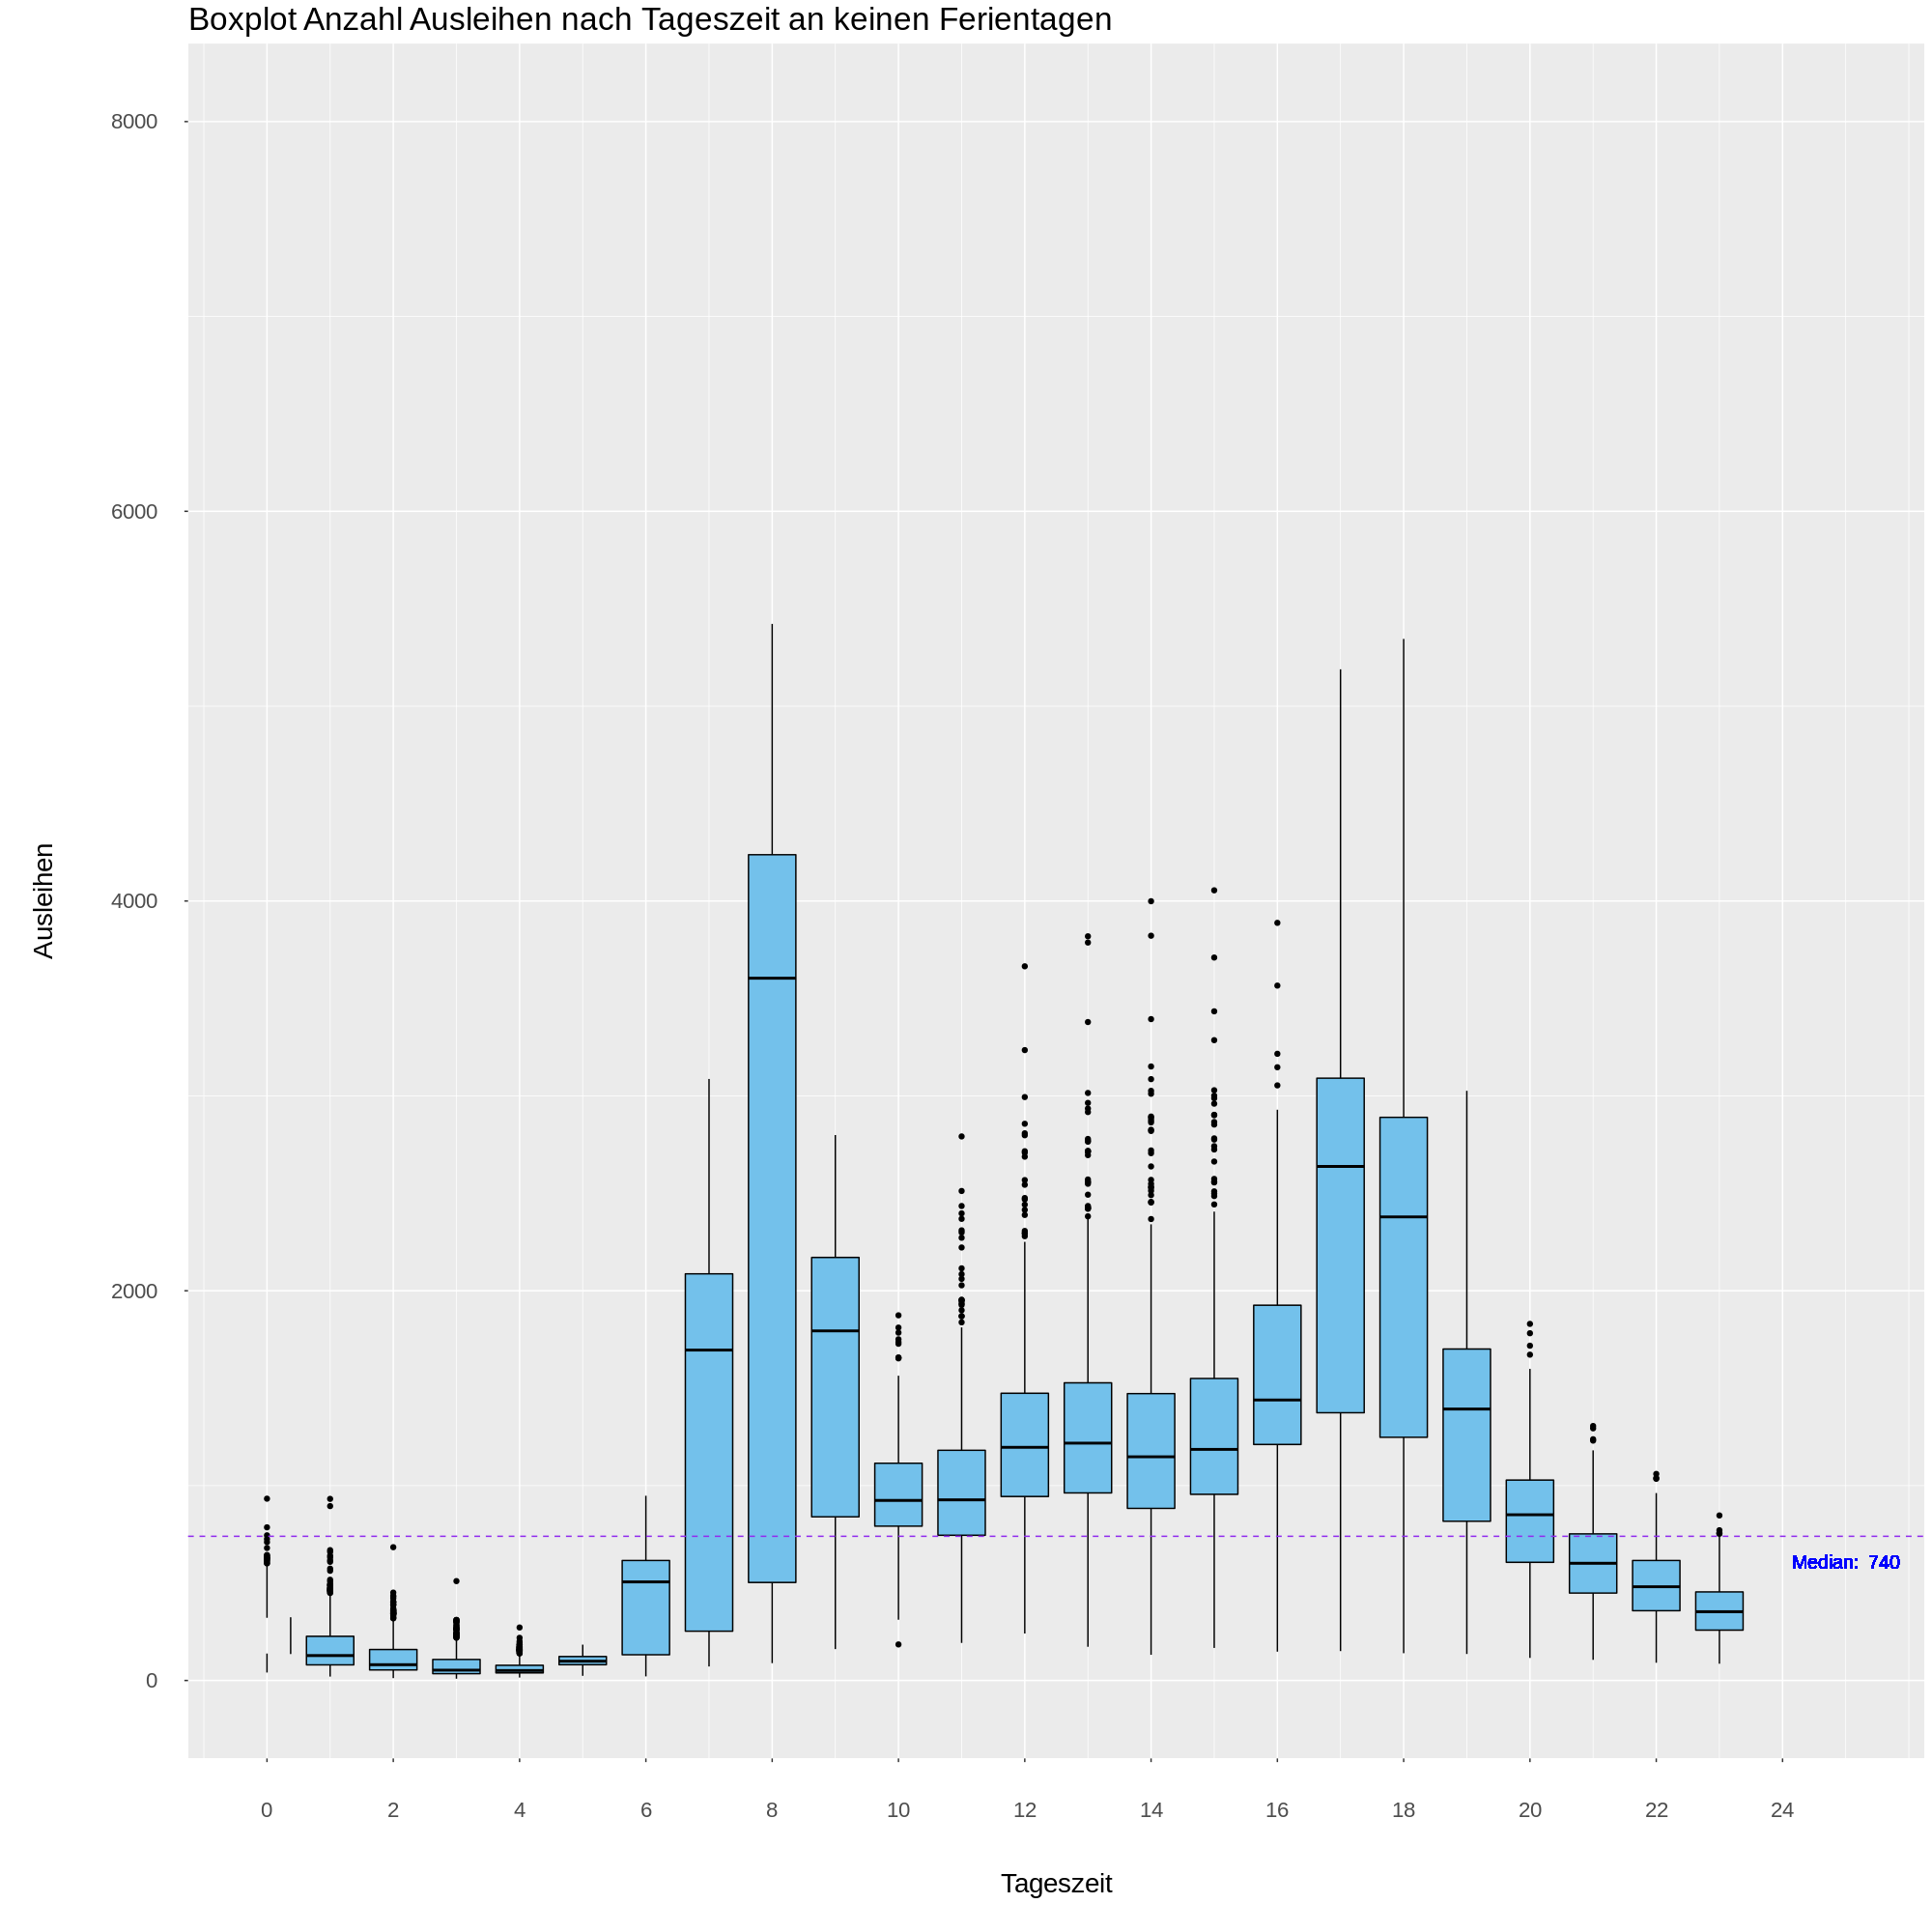

In [20]:
#Filter
filter_bike_data <- bike_data %>% filter(bike_data$season == 2 | bike_data$season == 3)

#Median aus Ausleihen berechnen
data <- filter_bike_data$cnt
med <-median(data)
zusammen <- paste("Median: ",med)

#Boxplot mit total Ausleihen nach Tageszeit, gruppiert nach Tageszeit
ggplot(data = filter_bike_data, aes(hr, cnt, group=hr)) +
       geom_boxplot( fill="#73c1eb", colour="black")  +
xlab("Tageszeit") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Tageszeit an keinen Ferientagen") +
geom_hline(yintercept= median(med), color = "purple2", linetype='dashed', size = 0.5 ) +
geom_text(aes(x=25, label=zusammen, y=20), colour="blue", vjust = -8.0, size=5) +
scale_x_continuous(limits = c(0, 25), breaks = c(0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +

#Aussehen Editing
theme(text = element_text(size = 20) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

## Balkendiagramm mit Anzahl Ausleihen und Windgeschwindigkeit

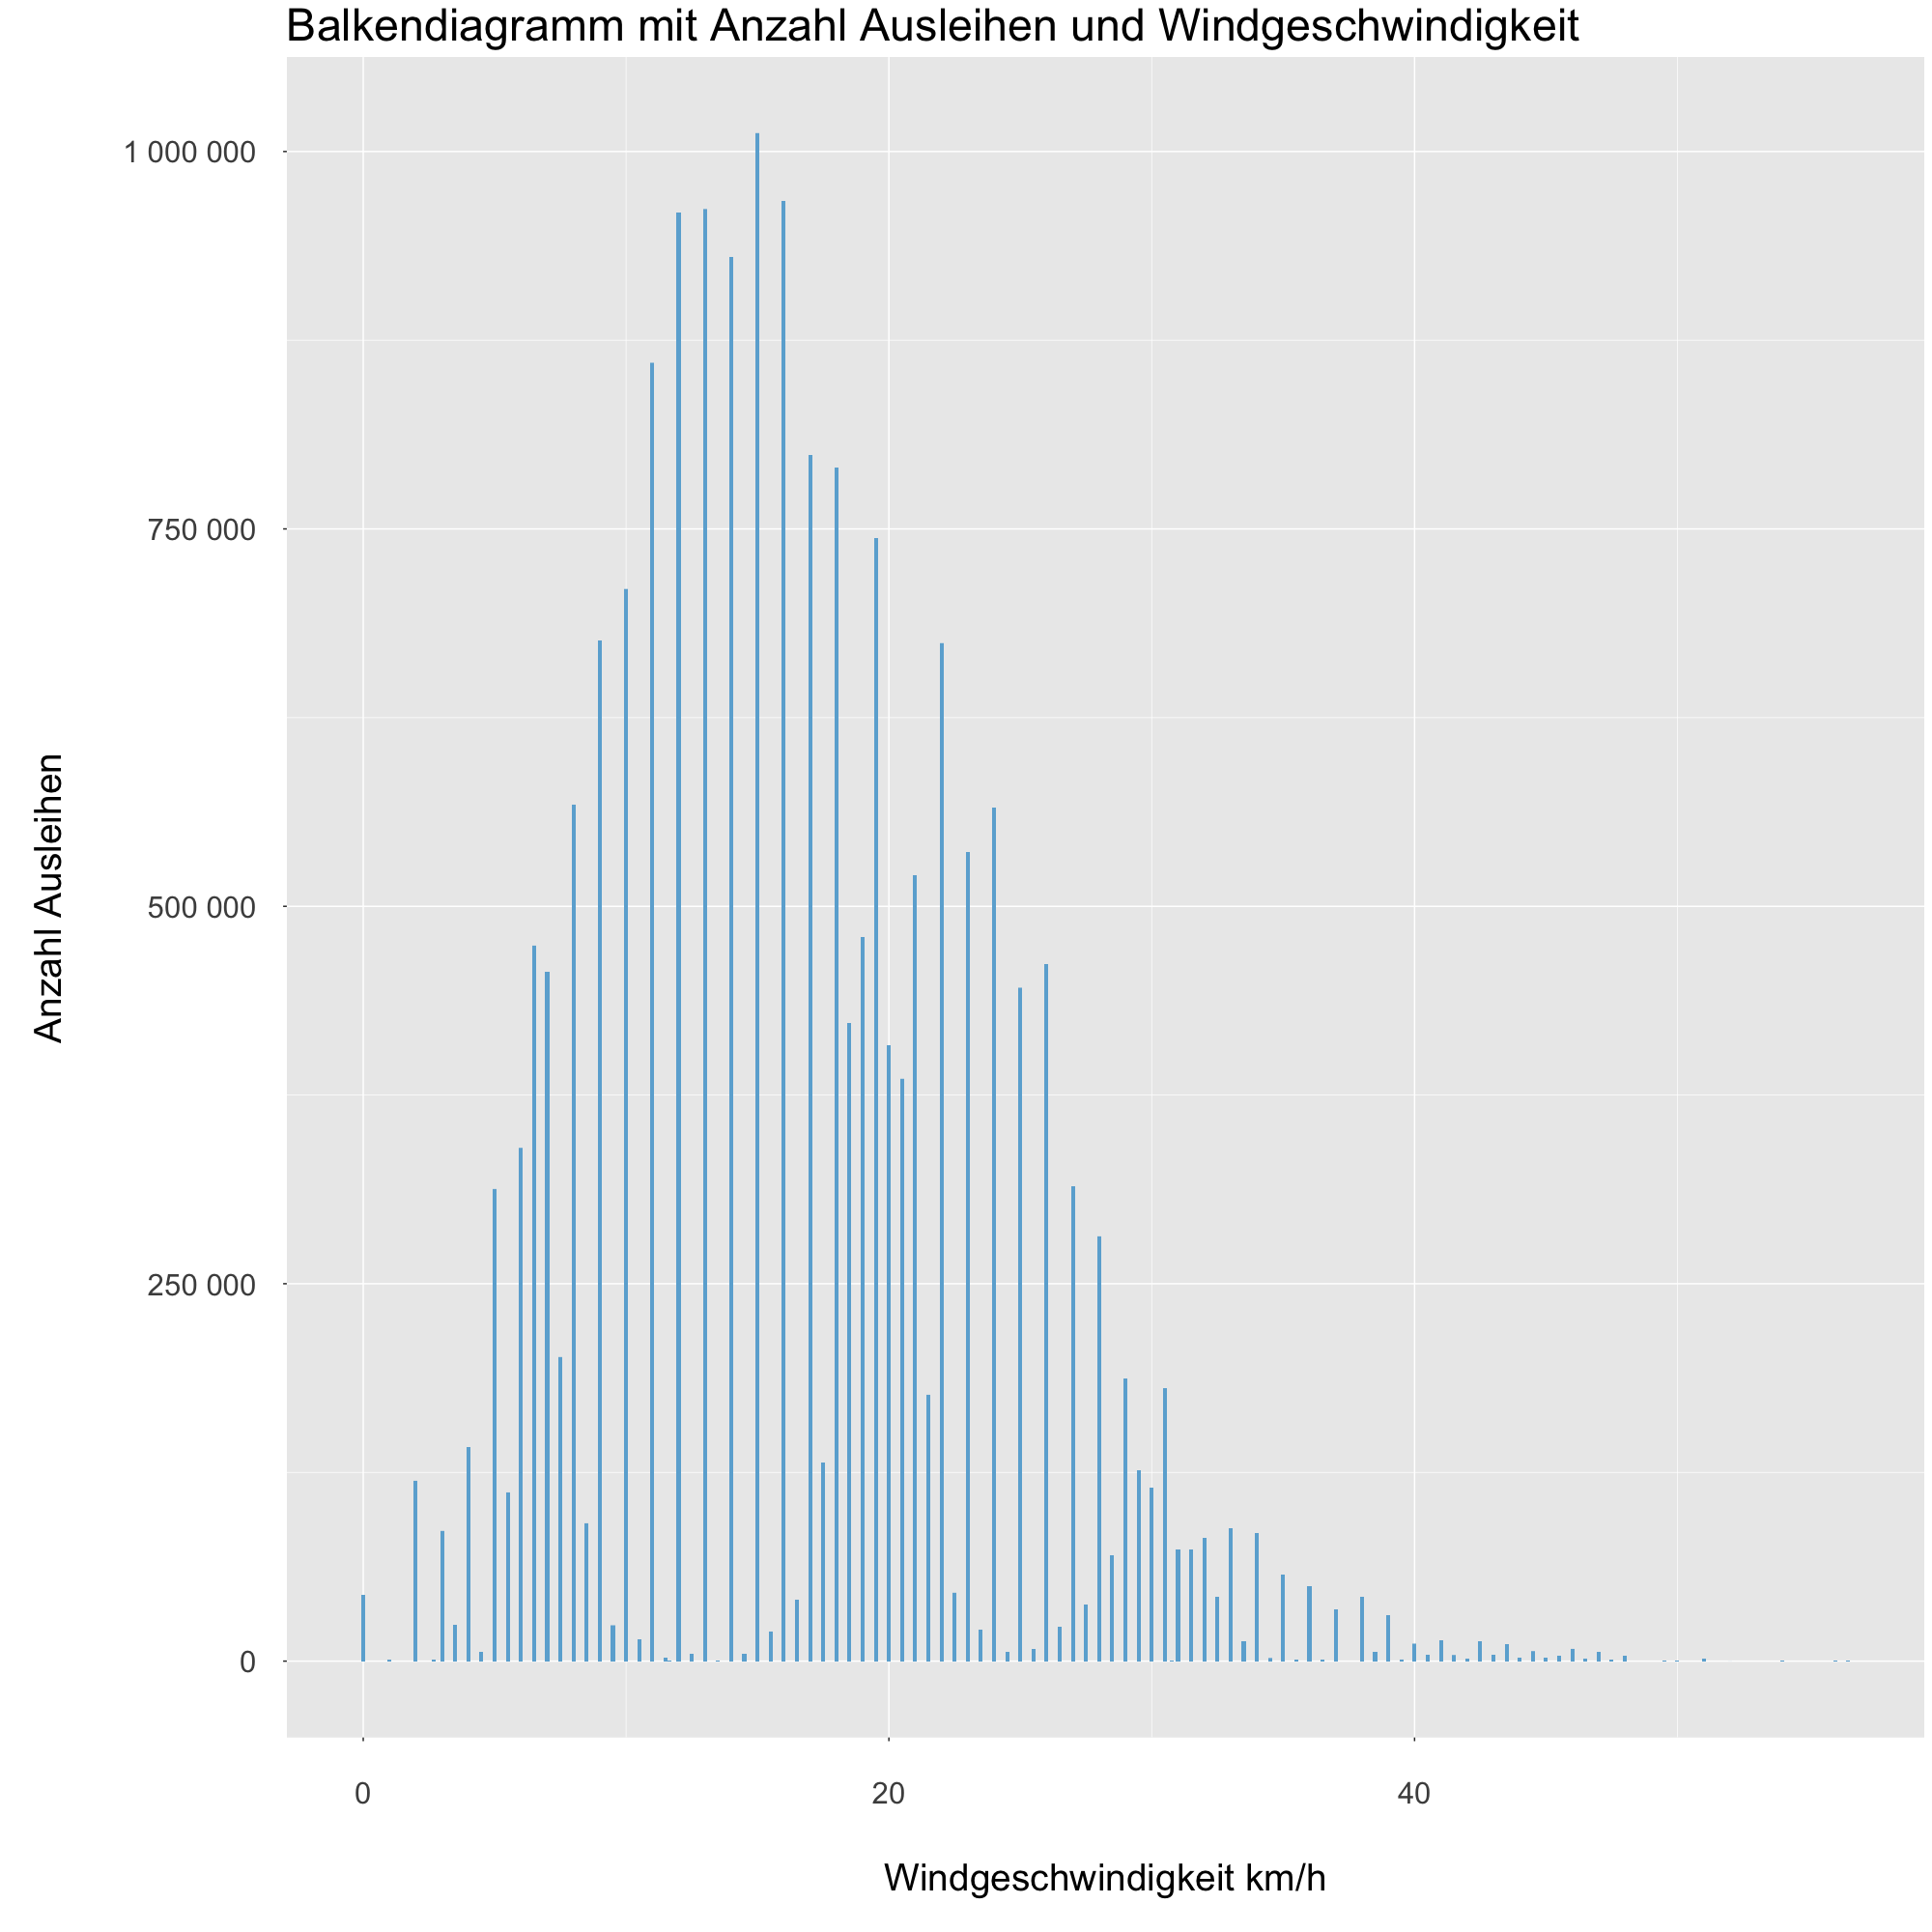

In [49]:
#Balkendiagramm mit Anzahl Ausleihen und Windgeschwindigkeit
ggplot(data = bike_data, aes(x=wind_speed, y=cnt)) +
       geom_col(fill="#6baed6") +
xlab("Windgeschwindigkeit km/h") +
ylab("Anzahl Ausleihen") +
scale_y_continuous(labels = number_format()) +
ggtitle("Balkendiagramm mit Anzahl Ausleihen und Windgeschwindigkeit") +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


### Heatmap mit Anzahl und Zeit

Using weekdays as id variables



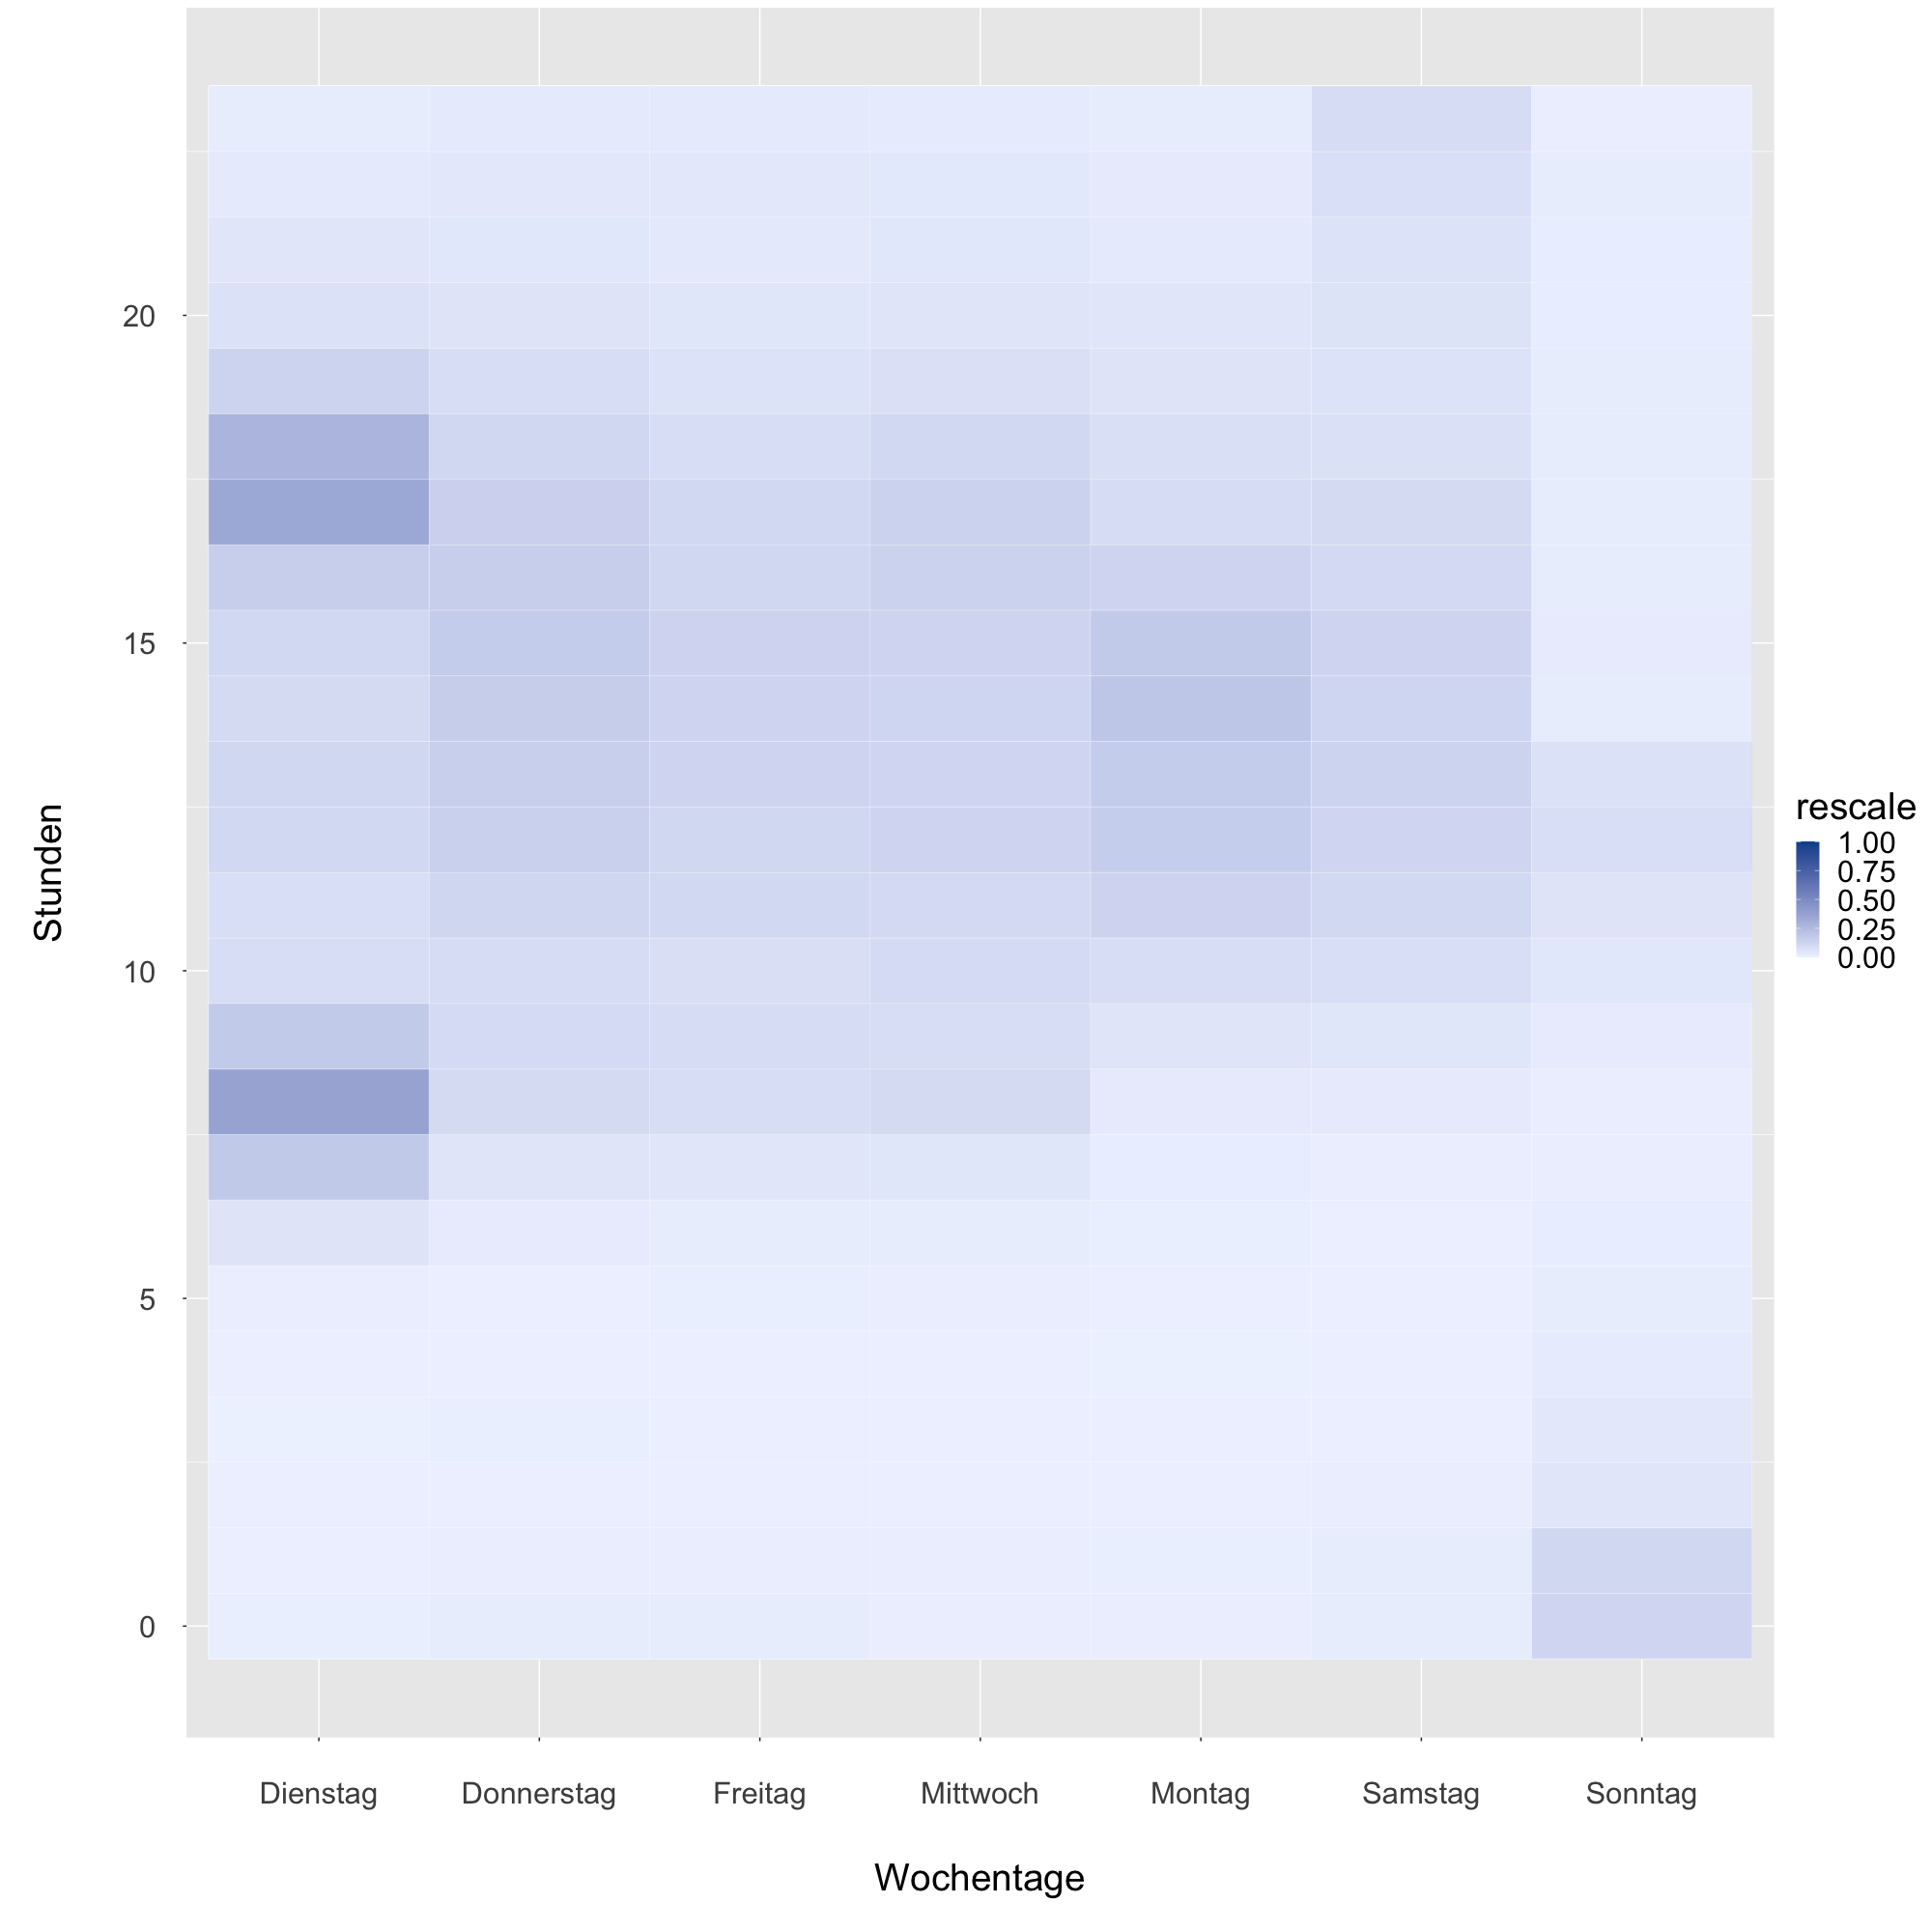

In [51]:
bike_data <- read.csv('london_bereinigt_V2.csv', header = TRUE, sep = ";")
bike_hr <- c(bike_data$hr)

#melt mtcars into long format
#melt_mtcars <- melt(bike_data, id = c("weekdays","cnt","hr"))
#melt_mtcars <- gather(bike_data, detail, value, weekday:hr, factor_key=TRUE)3
#melt_mtcars <- c(cnt,weekdays, hr)
#https://www.statology.org/heatmap-r-ggplot2/
bike_data <- bike_data  %>% select(cnt, weekdays)
melt_mtcars <- melt(bike_data)
#melt_mtcars

melt_mtcars$hr <- bike_hr
melt_mtcars <- ddply(melt_mtcars, .(variable), transform, rescale = rescale(value))
#sort by player with custom order
#melt_mtcars <- melt_mtcars %>% arrange(factor(weekdays, levels = c('Monntag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag')))

#create heatmap using rescaled values
ggplot(melt_mtcars, aes(weekdays, hr)) +
  geom_tile(aes(fill = rescale), colour = "white") +
  scale_fill_gradient2(low = muted("red"), mid = "#eff3ff",
  high = ("#08519c"), midpoint = 0, space = "Lab",
  na.value = "grey50", guide = "colourbar", aesthetics = "fill") +

xlab("Wochentage") +
ylab("Stunden") +



#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Heatmap mit Anzahl Ausleihen nach Luftfeuchtigkeit

ERROR: Error in options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100) + : Ziel der Zuweisung expandiert zu keinem Sprachobjekt


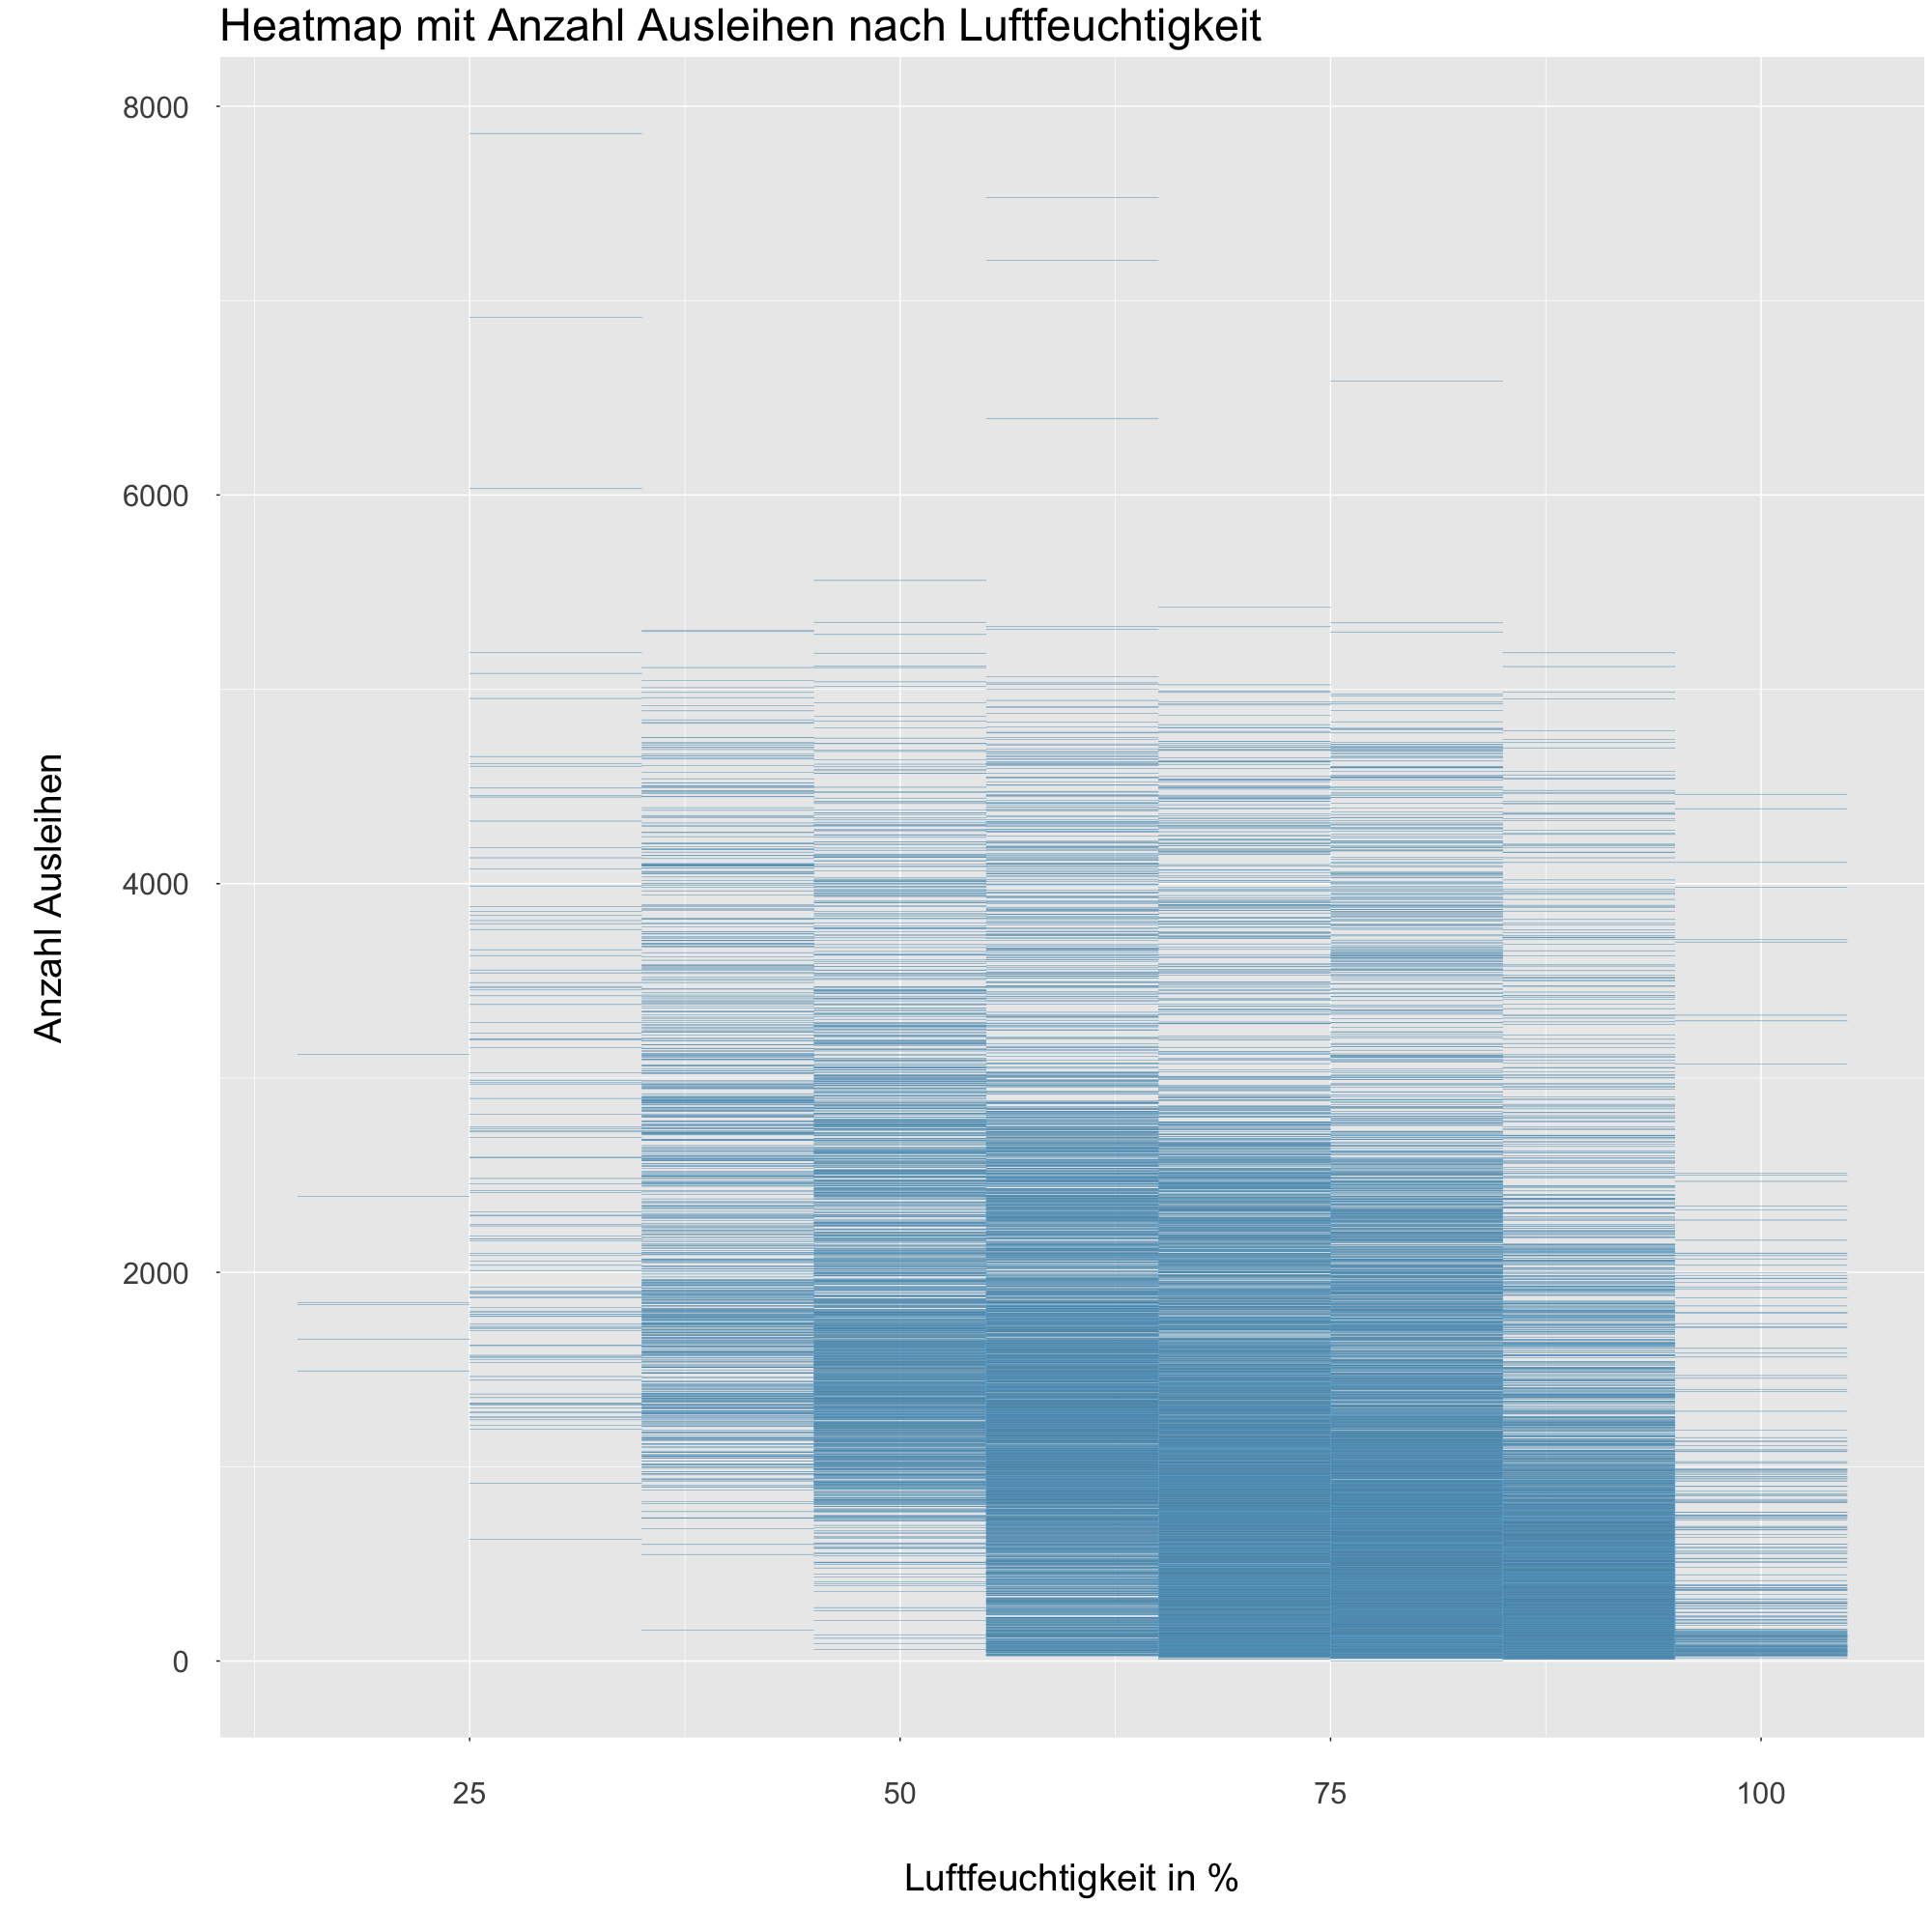

In [61]:
#Heatmap mit Anzahl Ausleihen und Luftfeuchtigkeit
#Luftfeuchtigkeit auf 10er runden und neue Variable erstellen, damit Grafik übersichtlicher ist.
bike_data$humR <- round(bike_data$hum, digits=-1)
ggplot(data = bike_data, aes(x=humR, y=cnt)) +
       geom_tile(color="#73c1eb") +
xlab("Luftfeuchtigkeit in %") +
ylab("Anzahl Ausleihen") +
ggtitle("Heatmap mit Anzahl Ausleihen nach Luftfeuchtigkeit") +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100) +



#Spalte mit gerundeten Werten wieder entfernen
bike_data <- bike_data %>% select(-contains("humR")) 





### Boxplot Anzahl Ausleihen nach Monat

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



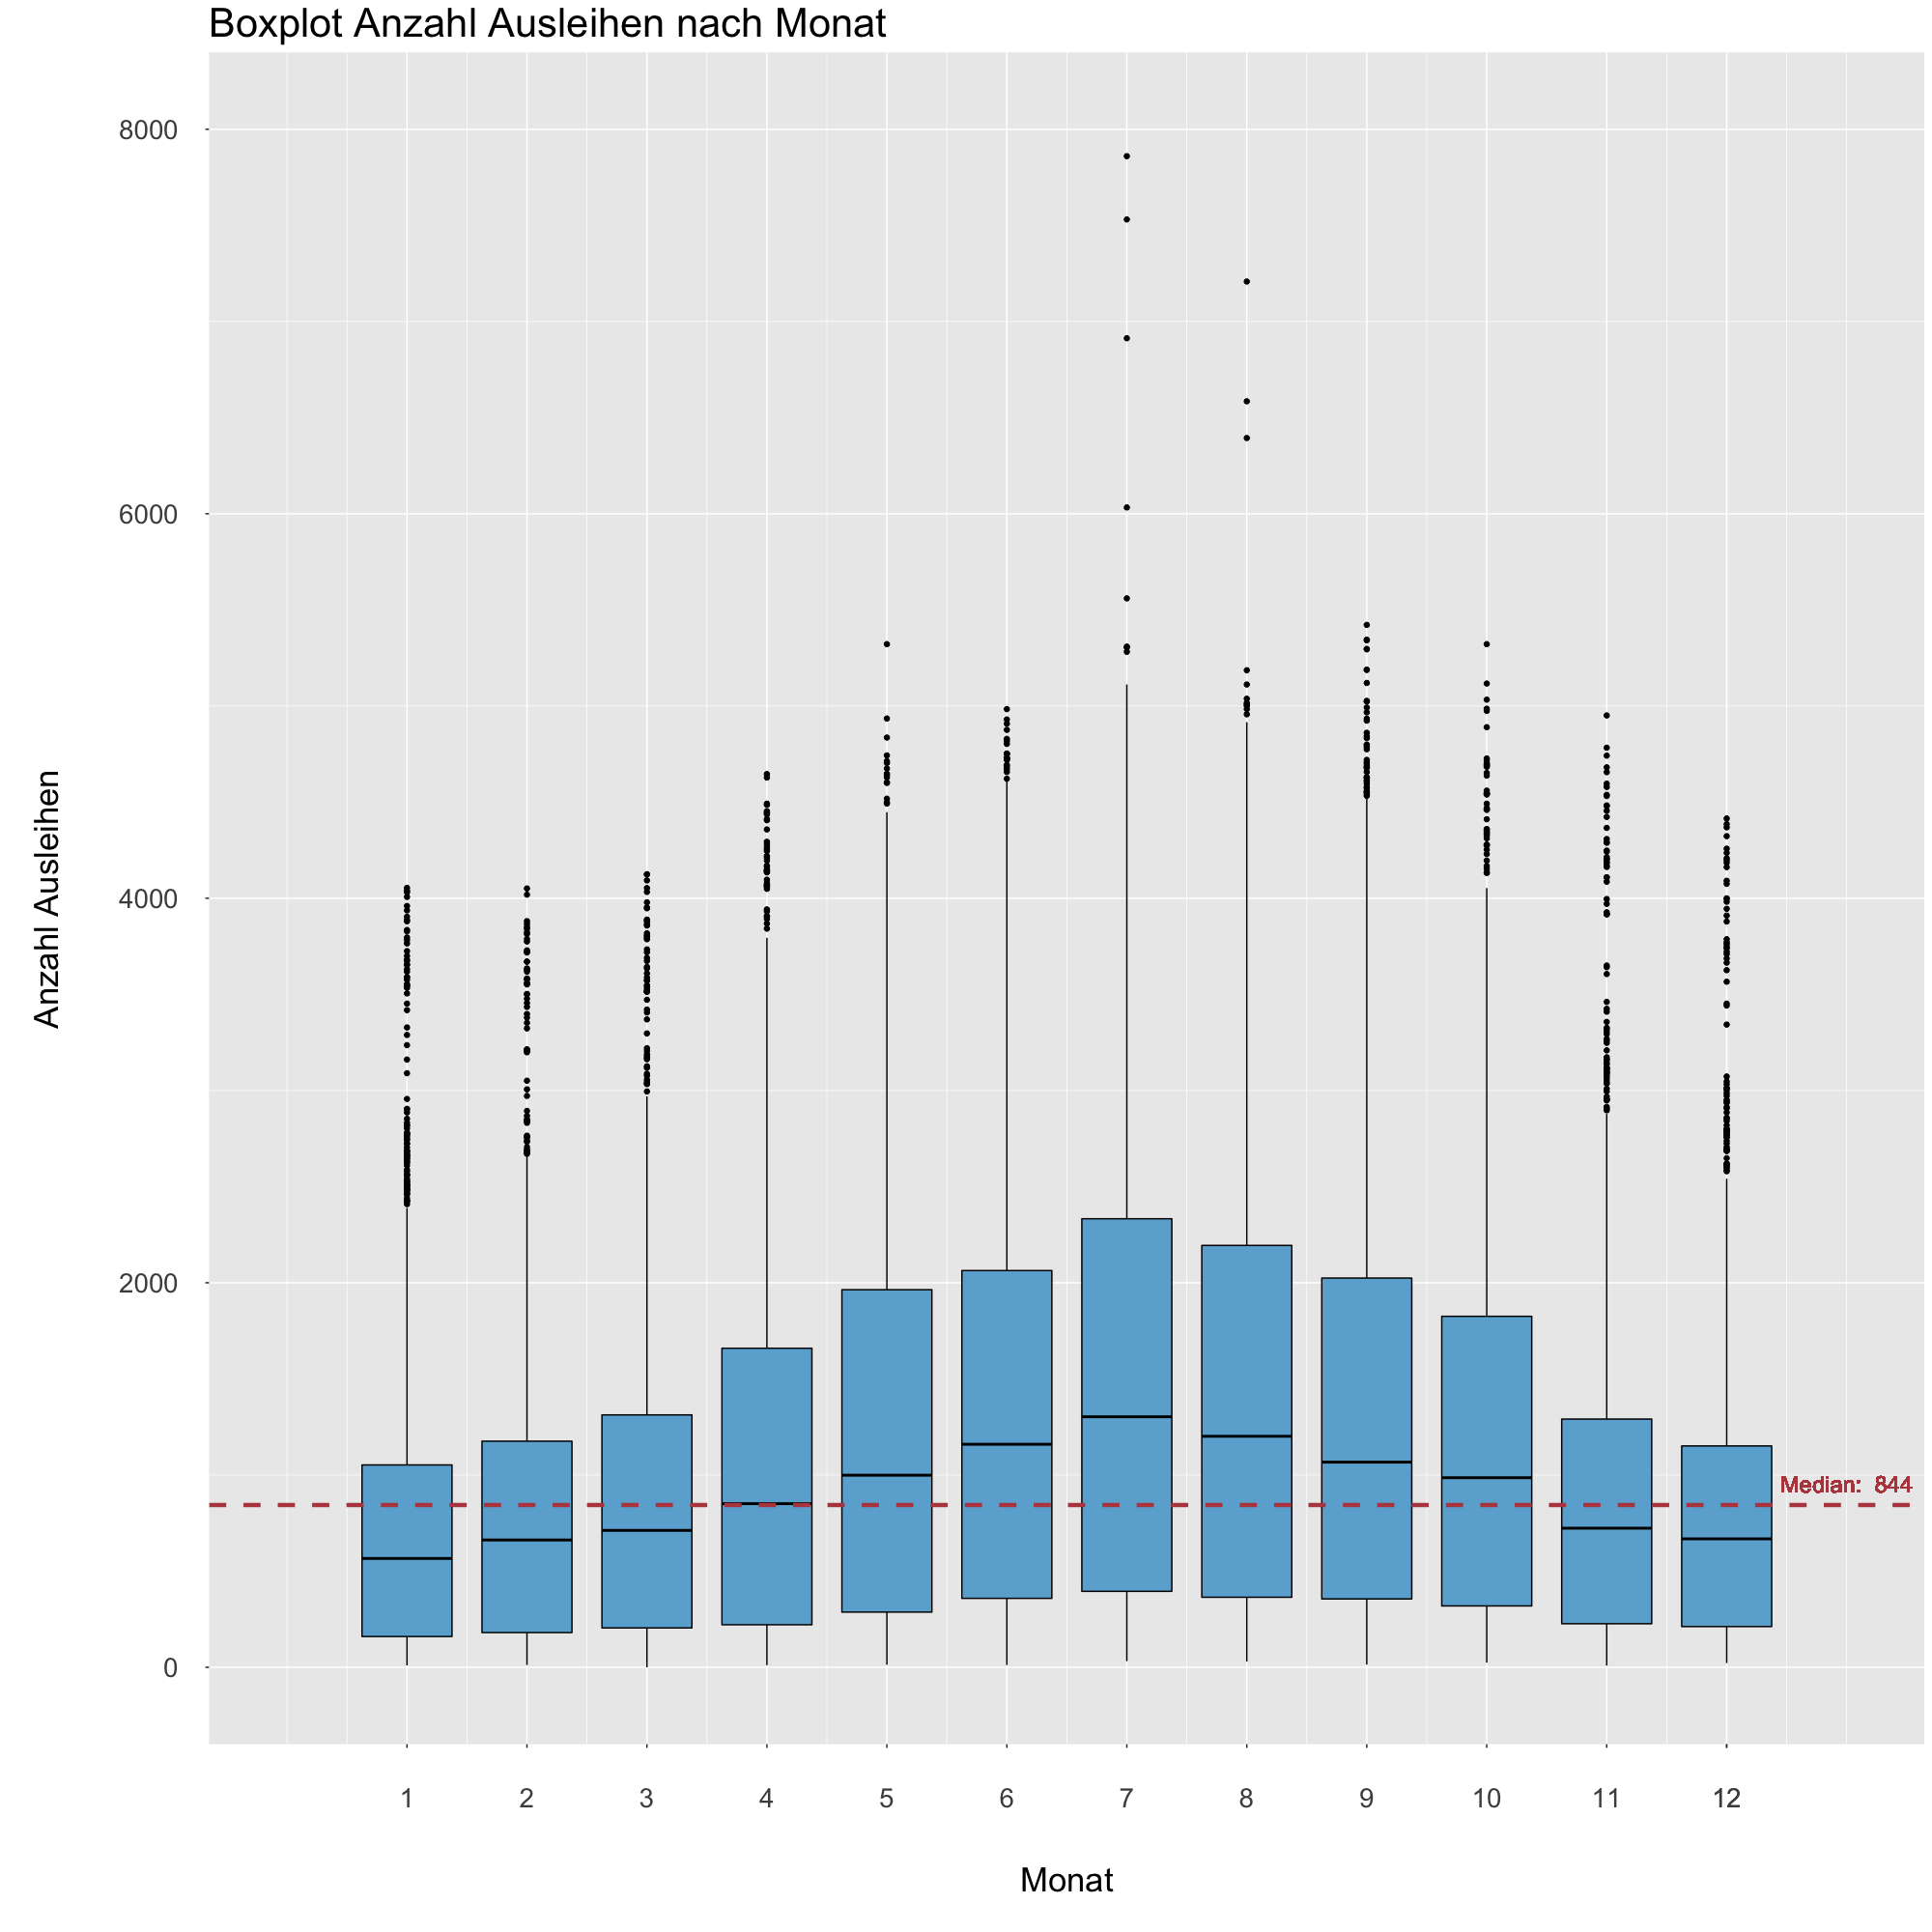

In [111]:
#Boxplot nach Anzahl Ausleihen und Monat, gruppiert nach Monat

#Median aus Ausleihen berechnen
data <- bike_data$cnt
med <- median(data)
zusammen <- paste("Median: ",med)


ggplot(data = bike_data, aes(month, cnt, group=month)) +
       geom_boxplot(fill="#6baed6", colour="black") +
xlab("Monat") +
ylab("Anzahl Ausleihen") +
coord_cartesian(xlim = c(0, 13)) +
scale_y_continuous(labels = number_format()) +
ggtitle("Boxplot Anzahl Ausleihen nach Monat") +
geom_hline(yintercept = median(med), color = "#B8494D",linetype='dashed', size = 1.5) +
geom_text(aes(x=13, label=zusammen, y=15), colour="#B8494D", vjust = -10.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 12)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +
ylim(0, 8000) +


#Aussehen Editing
theme(text = element_text(size = 25) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Monat

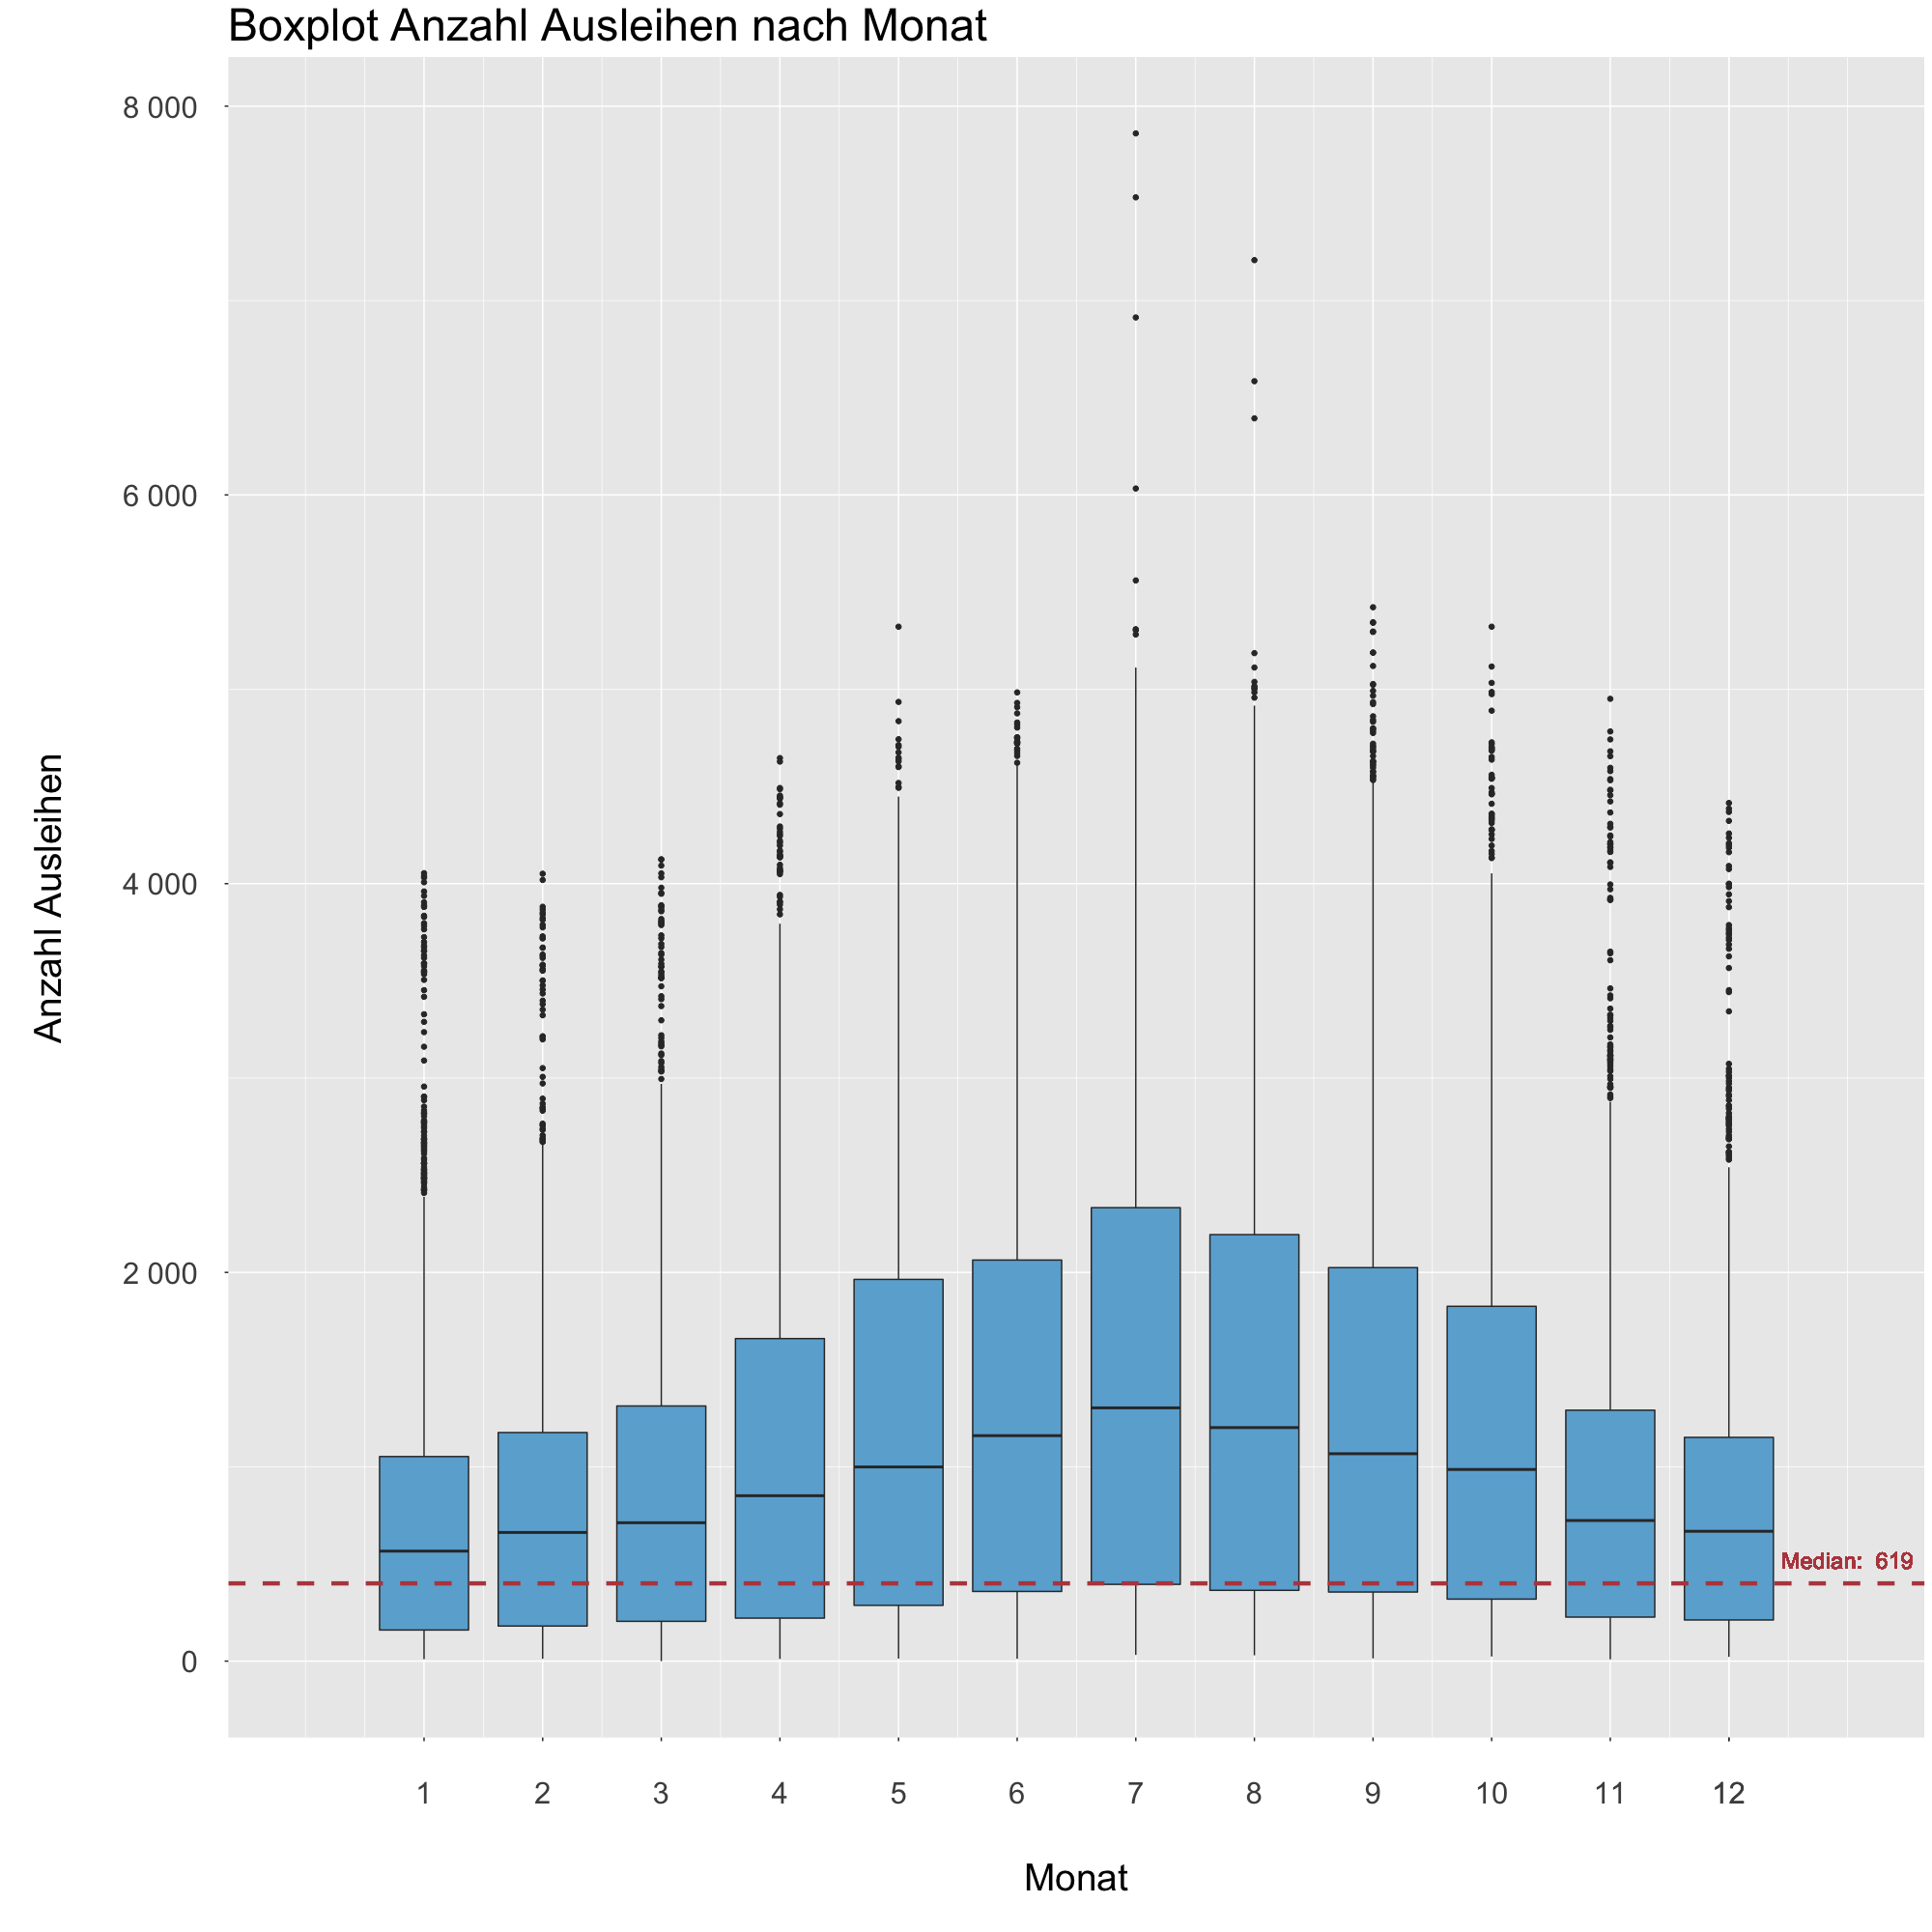

In [68]:
#Boxplot nach Anzahl Ausleihen und Monat, gruppiert nach Monat
ggplot(data = bike_data, aes(month, cnt, group=month)) +
       geom_boxplot(fill="#6baed6") +
xlab("Monat") +
ylab("Anzahl Ausleihen") +
coord_cartesian(xlim = c(0, 13)) +
scale_y_continuous(labels = number_format()) +
ggtitle("Boxplot Anzahl Ausleihen nach Monat") +
geom_hline(yintercept = 400, color = "#B8494D",linetype='dashed', size = 1.5) +
geom_text(aes(x=13, label=zusammen, y=15), colour="#B8494D", vjust = -5.5, size=6) +
scale_x_continuous(limits = c(0, 25), breaks = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 11, 12)) +
# Anleitung: https://www.statology.org/ggplot-axis-breaks/ +

#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Boxplot Anzahl Ausleihen nach Monat

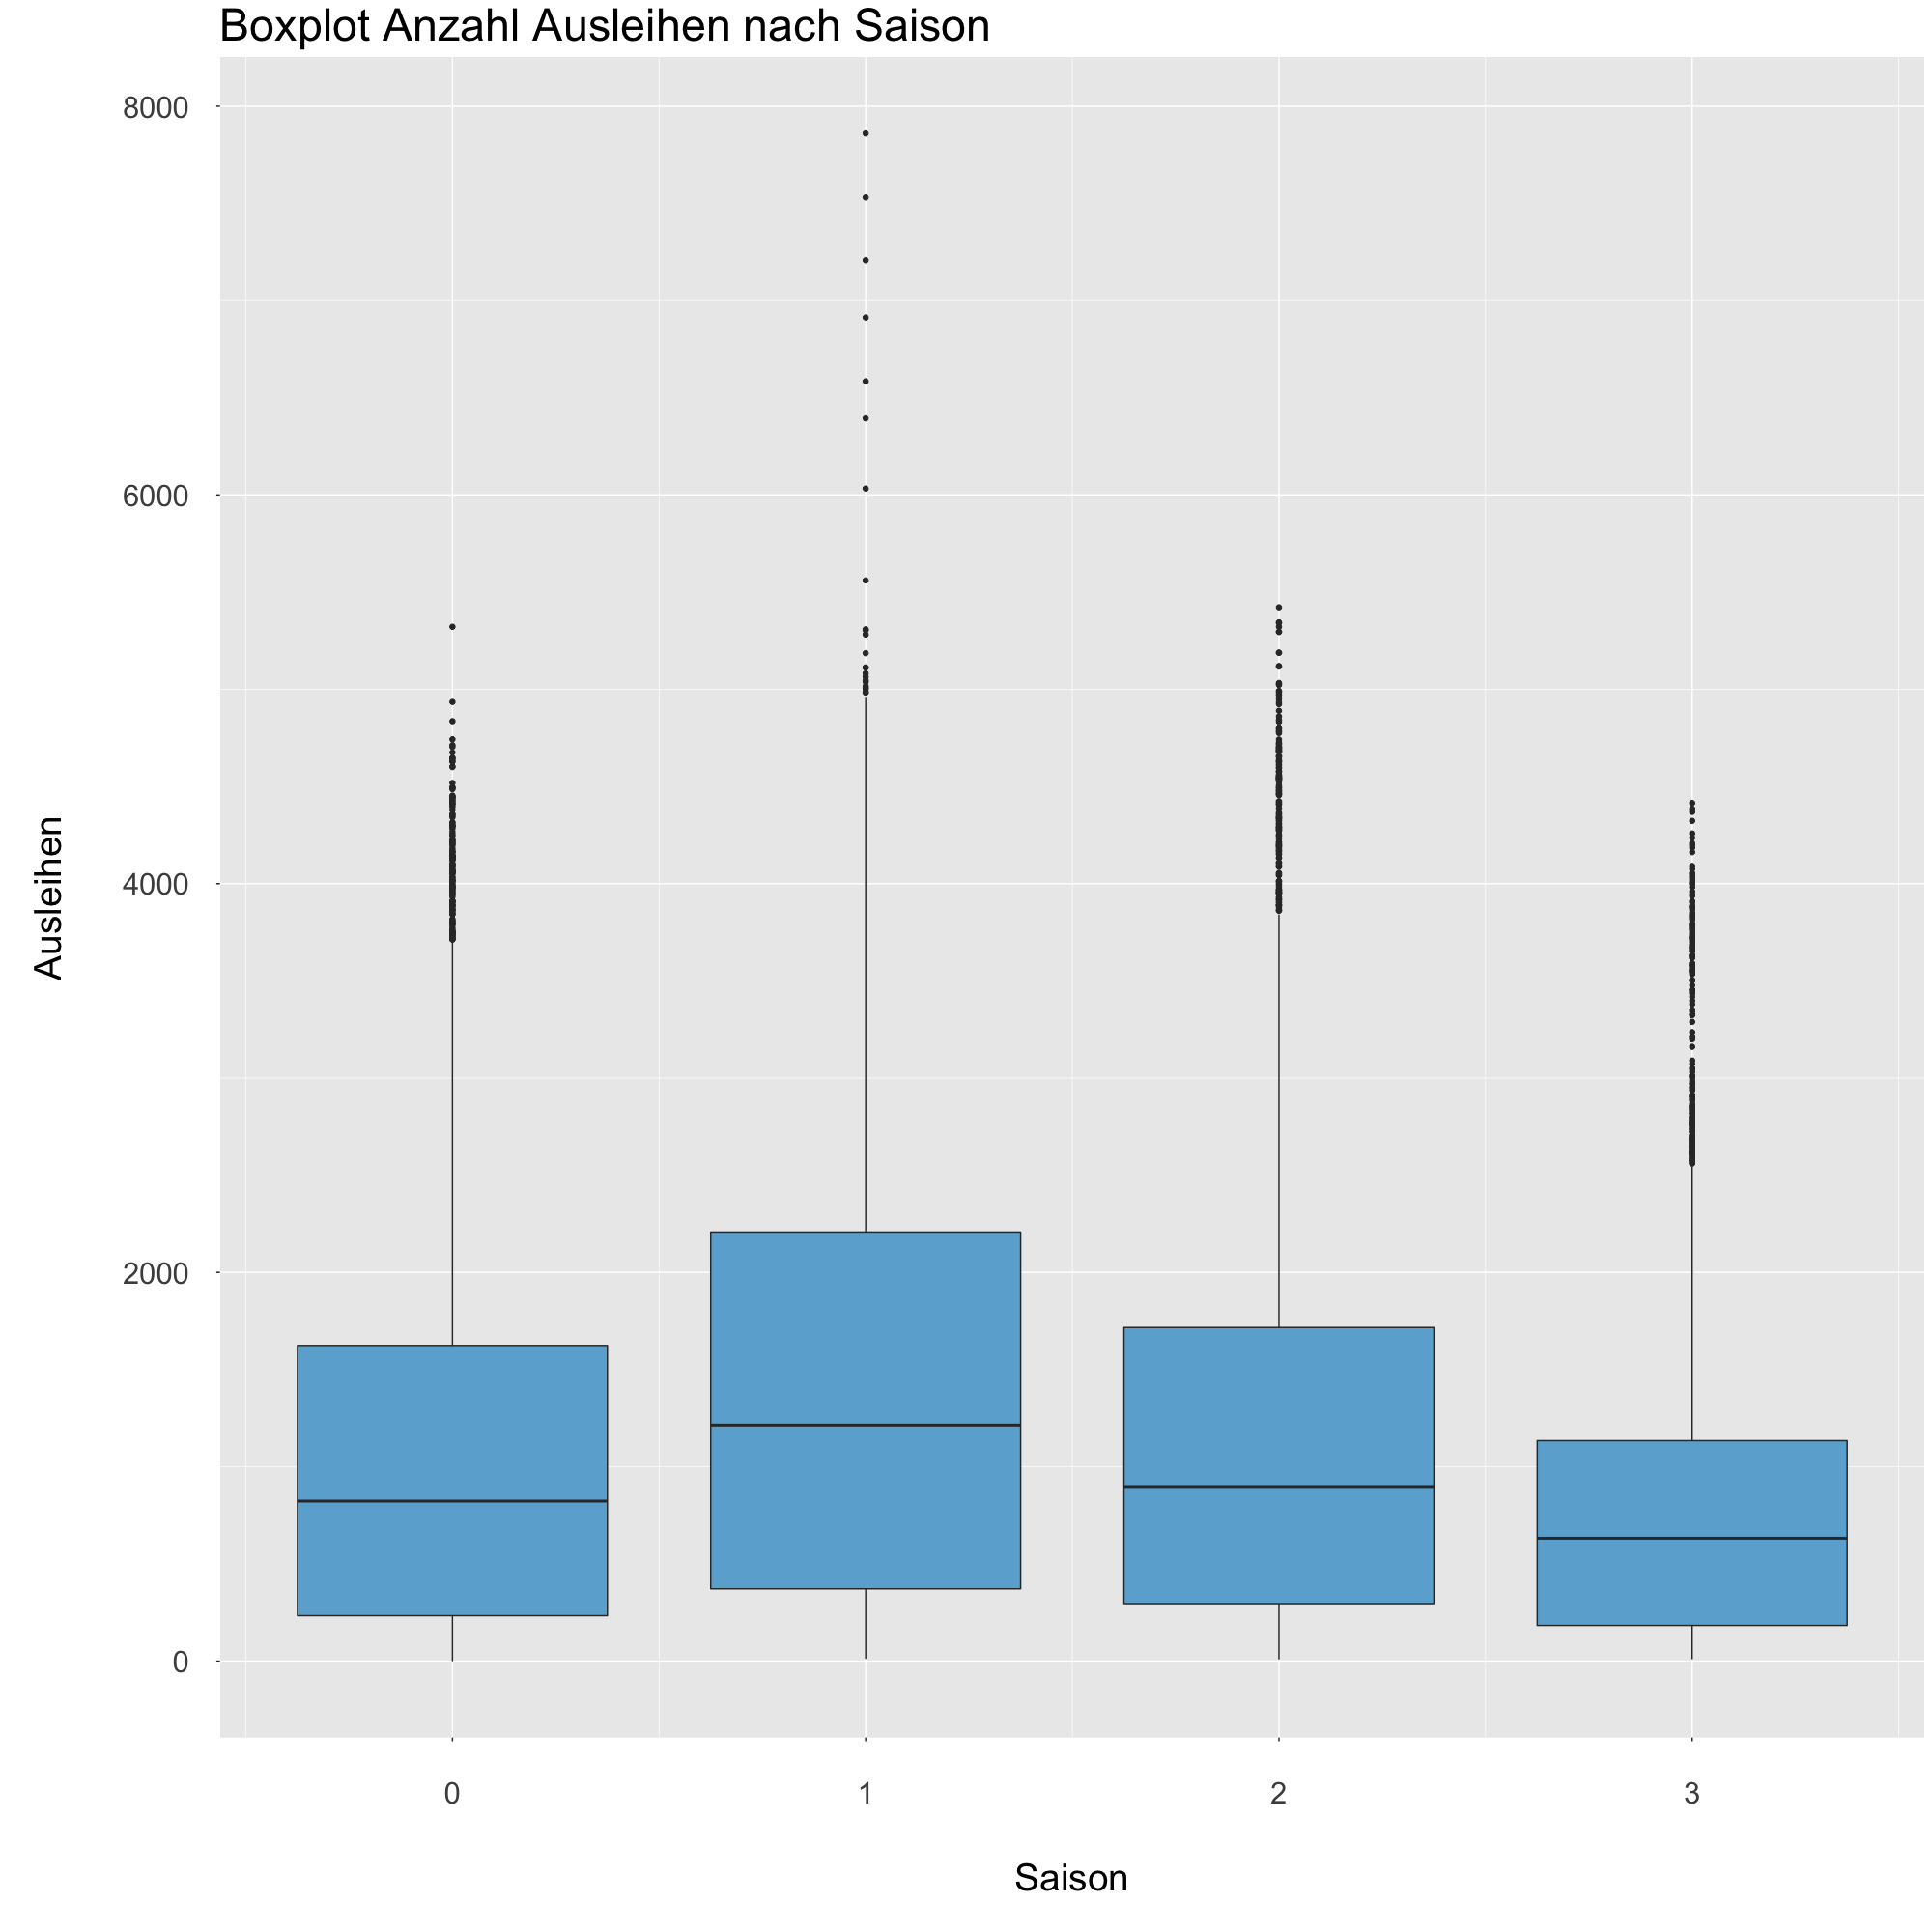

In [70]:
#Boxplot mit total Ausleihen und Saison, gruppiert nach Saison
ggplot(data = bike_data, aes(season, cnt, group=season)) +
       geom_boxplot(fill="#6baed6") +
xlab("Saison") +
ylab("Ausleihen") +
ggtitle("Boxplot Anzahl Ausleihen nach Saison") +

#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Histogramm mit Ausleihen nach Wetterverhältnis

instant date     time     hr weekdays month cnt t1  t2  hum   wind_speed
1 1       04.01.15 00:00:00 0  Sonntag  1     182 3.0 2.0  93.0 6.0       
2 2       04.01.15 01:00:00 1  Sonntag  1     138 3.0 2.5  93.0 5.0       
3 3       04.01.15 02:00:00 2  Sonntag  1     134 2.5 2.5  96.5 0.0       
4 4       04.01.15 03:00:00 3  Sonntag  1      72 2.0 2.0 100.0 0.0       
5 5       04.01.15 04:00:00 4  Sonntag  1      47 2.0 0.0  93.0 6.5       
6 6       04.01.15 05:00:00 5  Sonntag  1      46 2.0 2.0  93.0 4.0       
  weather_code is_holiday is_weekend season
1 3            0          1          3     
2 1            0          1          3     
3 1            0          1          3     
4 1            0          1          3     
5 1            0          1          3     
6 1            0          1          3

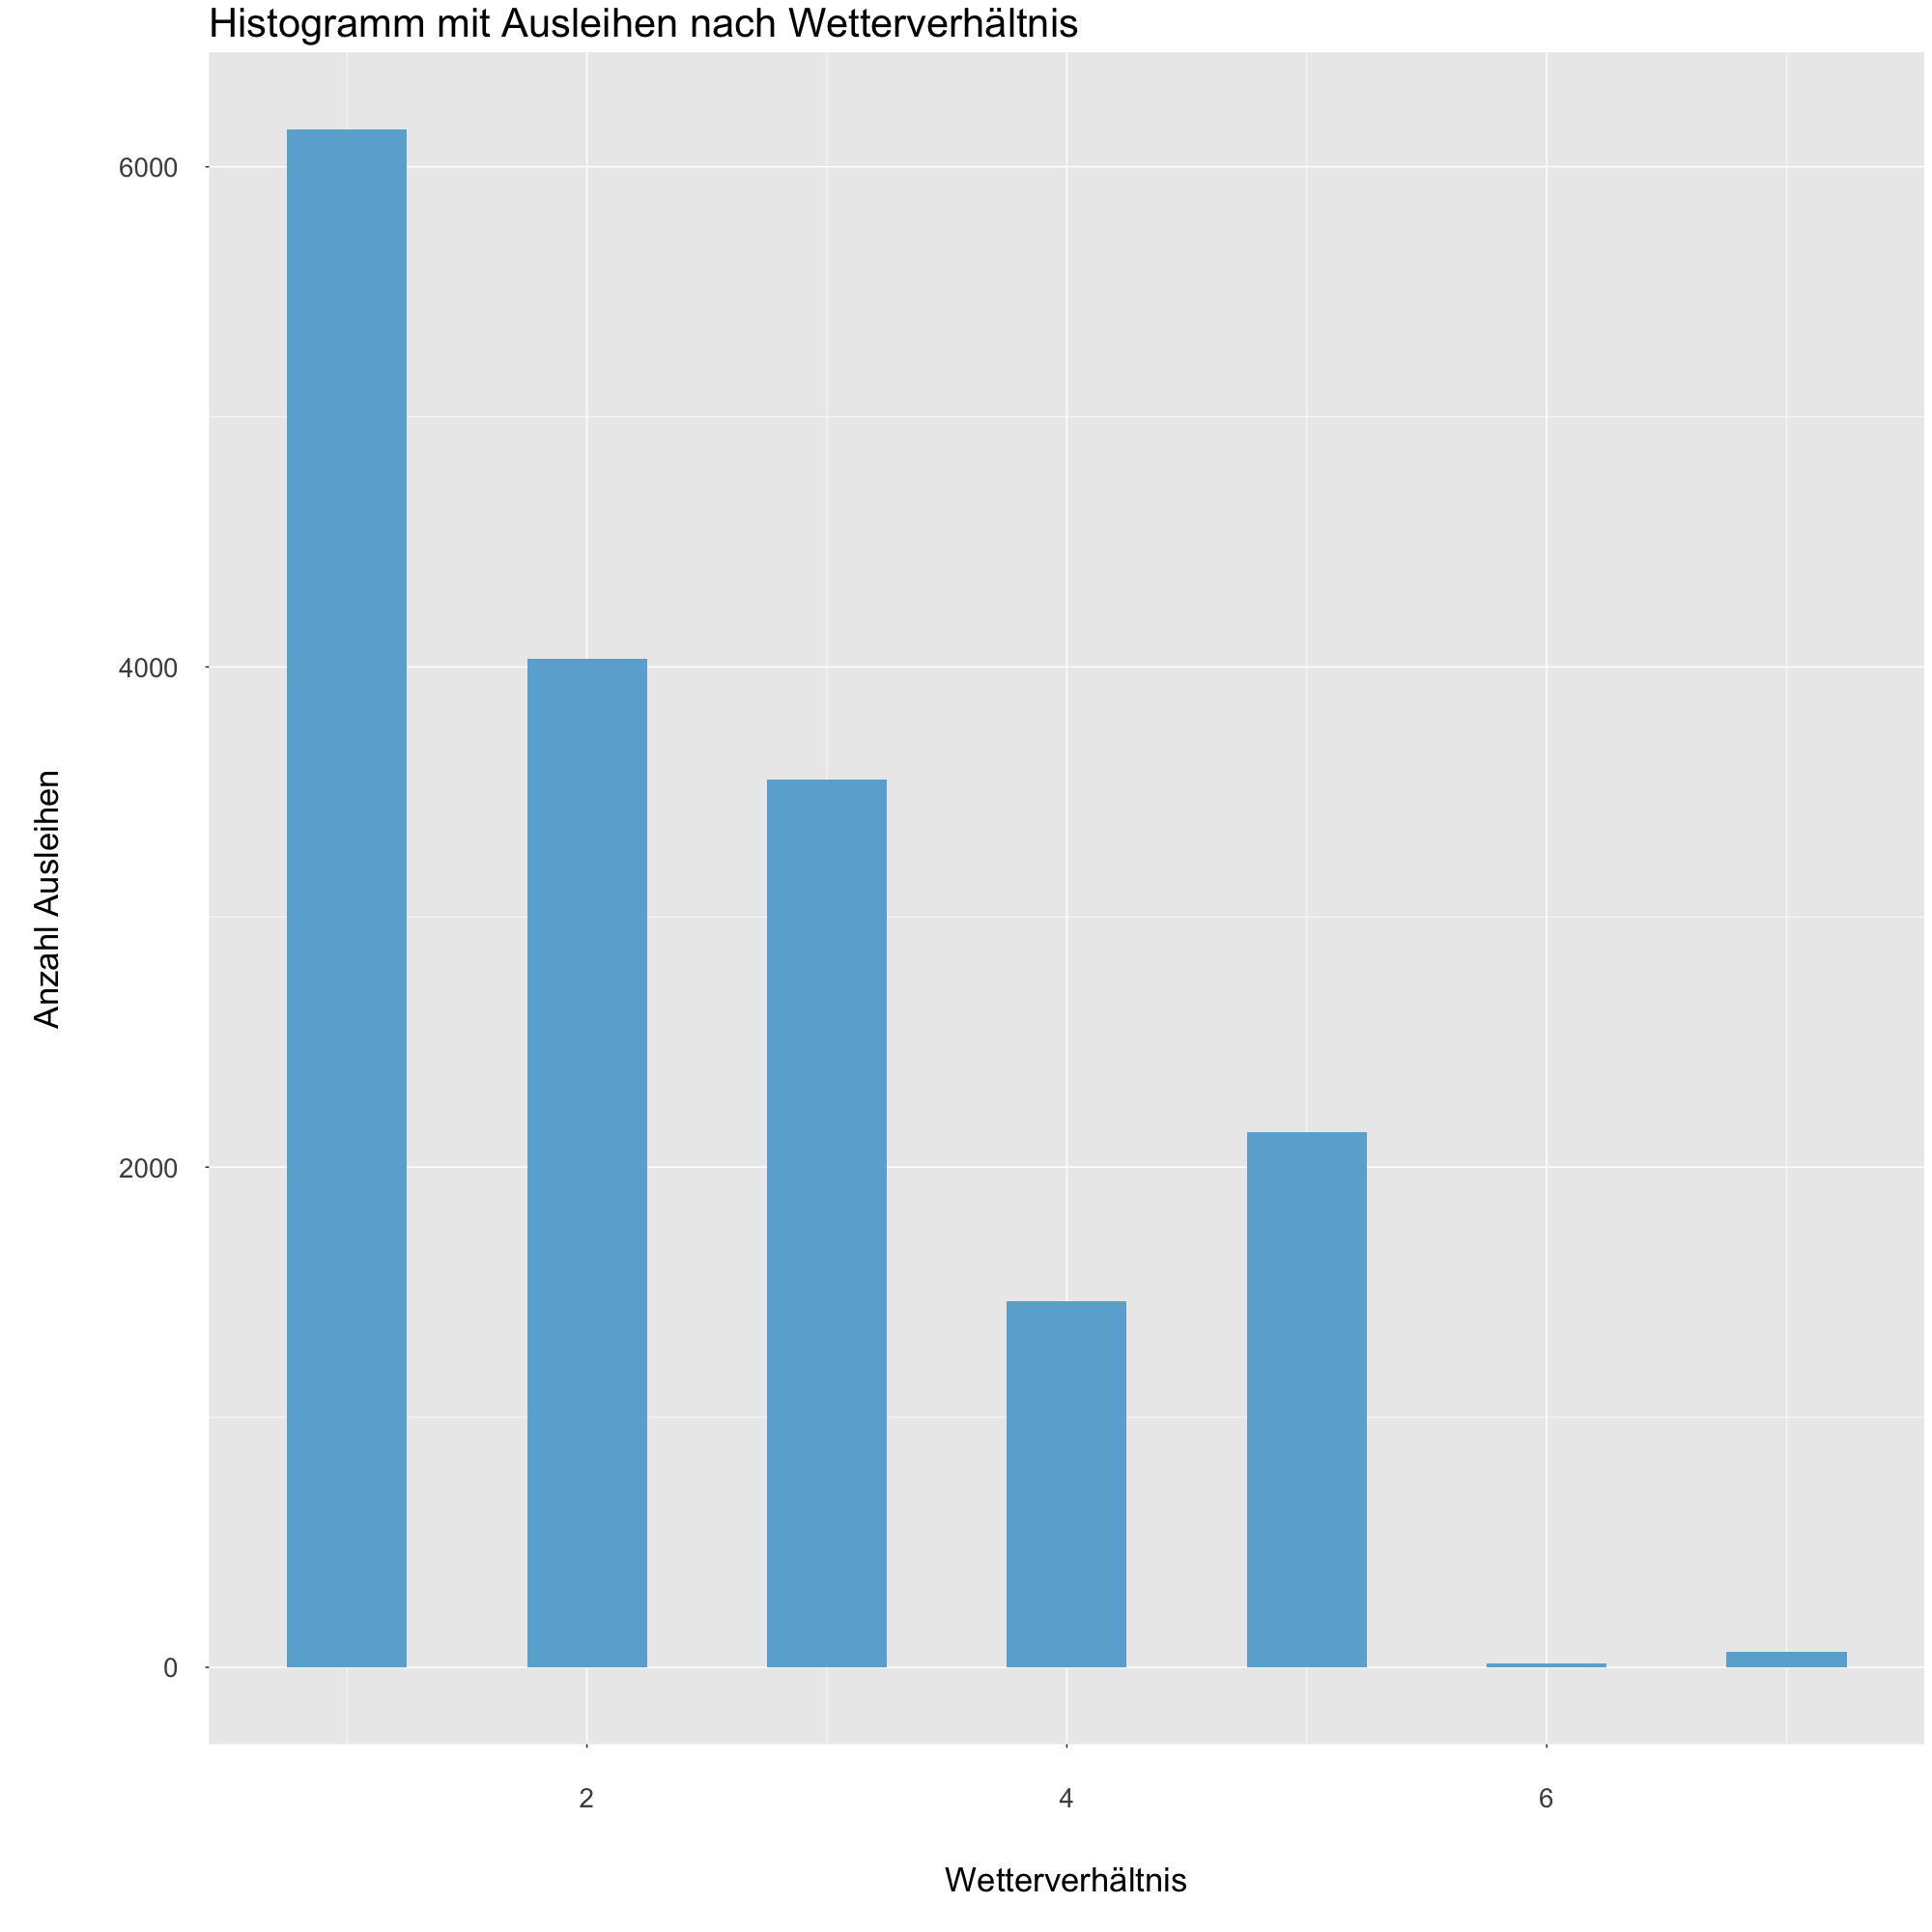

In [147]:
#Balkendiagramm mit Anzahl Ausleihen nach Wetterverhältnis
bike_data <- read.csv('london_bereinigt_V3.csv', header = TRUE, sep = ";")

#https://statisticsglobe.com/draw-histogram-with-different-colors-in-r

#bike_data$weather_code <- factor(
#bike_data$weather_code,
#levels = c(1,2,3,4,7),
#labels = c('Clear', 'Scattered Clouds', 'Broken Clouds', 'Cloudy','Light Rain'))
#gp + scale_fill_manual(breaks = c(1,2,3,4,5,6), values=c("Clear", "Scattered Clouds", "Broken Clouds", "Cloudy","Light Rain", "Snow", "Gefriernebel"))+

head(bike_data)


ggplot(data = bike_data, aes(x=weather_code)) +
        geom_histogram(fill="#6baed6", binwidth=0.5) +
scale_fill_manual(values = c('1'= "#1b98e0", '2' = "#f6f805", '3' = "#353436"))+

xlab("Wetterverhältnis") +
ylab("Anzahl Ausleihen")+
ggtitle("Histogramm mit Ausleihen nach Wetterverhältnis") +


#Aussehen Editing
theme(text = element_text(size = 25) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


### Korrelation zwischen gemessener Temperatur (t1) und Ausleihen (cnt) - v1

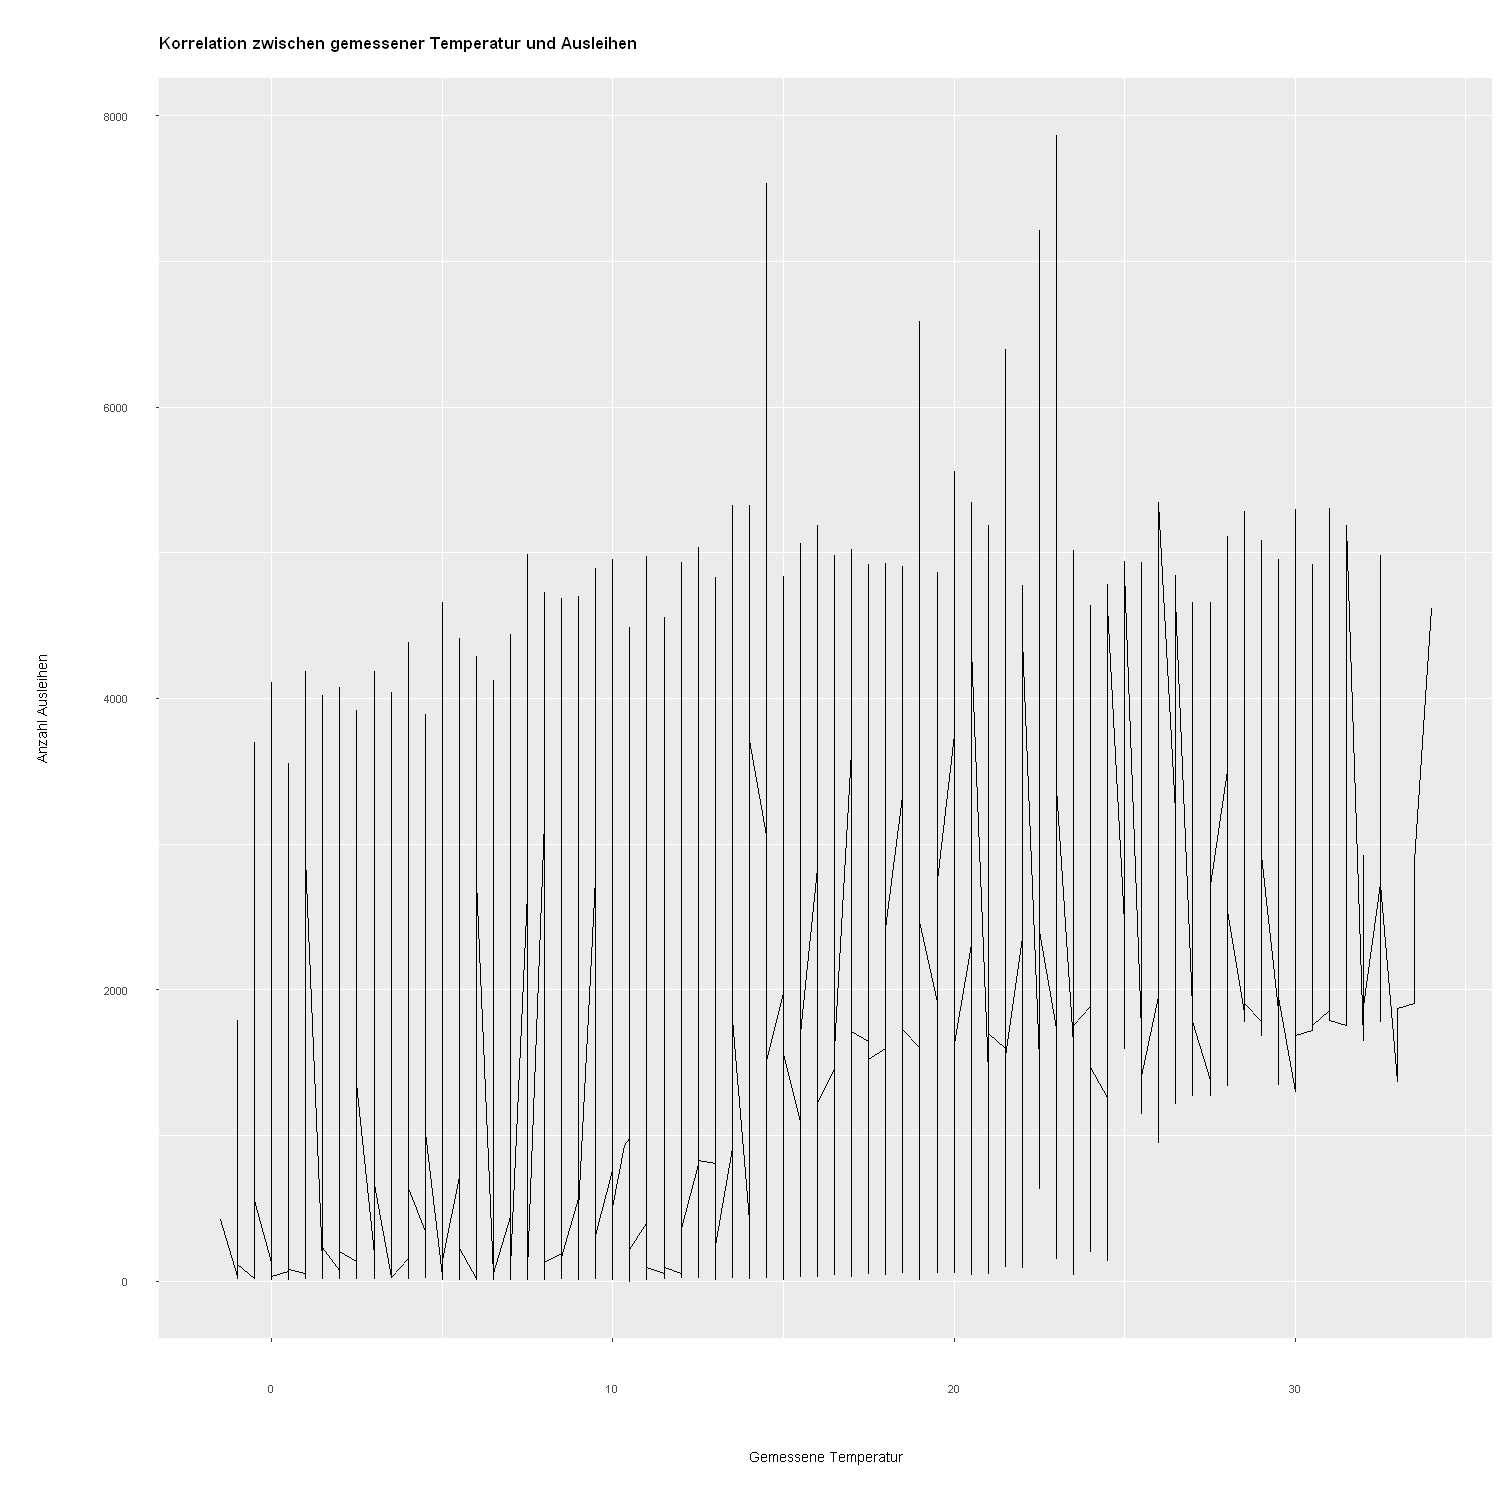

In [16]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")

ggplot(data = bike_data, aes(x = t1, y = cnt)) + 
        geom_line() +
xlab("Gemessene Temperatur") +
ylab("Anzahl Ausleihen") +
ggtitle("Korrelation zwischen gemessener Temperatur und Ausleihen") +

theme(text = element_text(size = 10) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )

### Balkendiagramm mit Anzahl Ausleihen und Temperatur

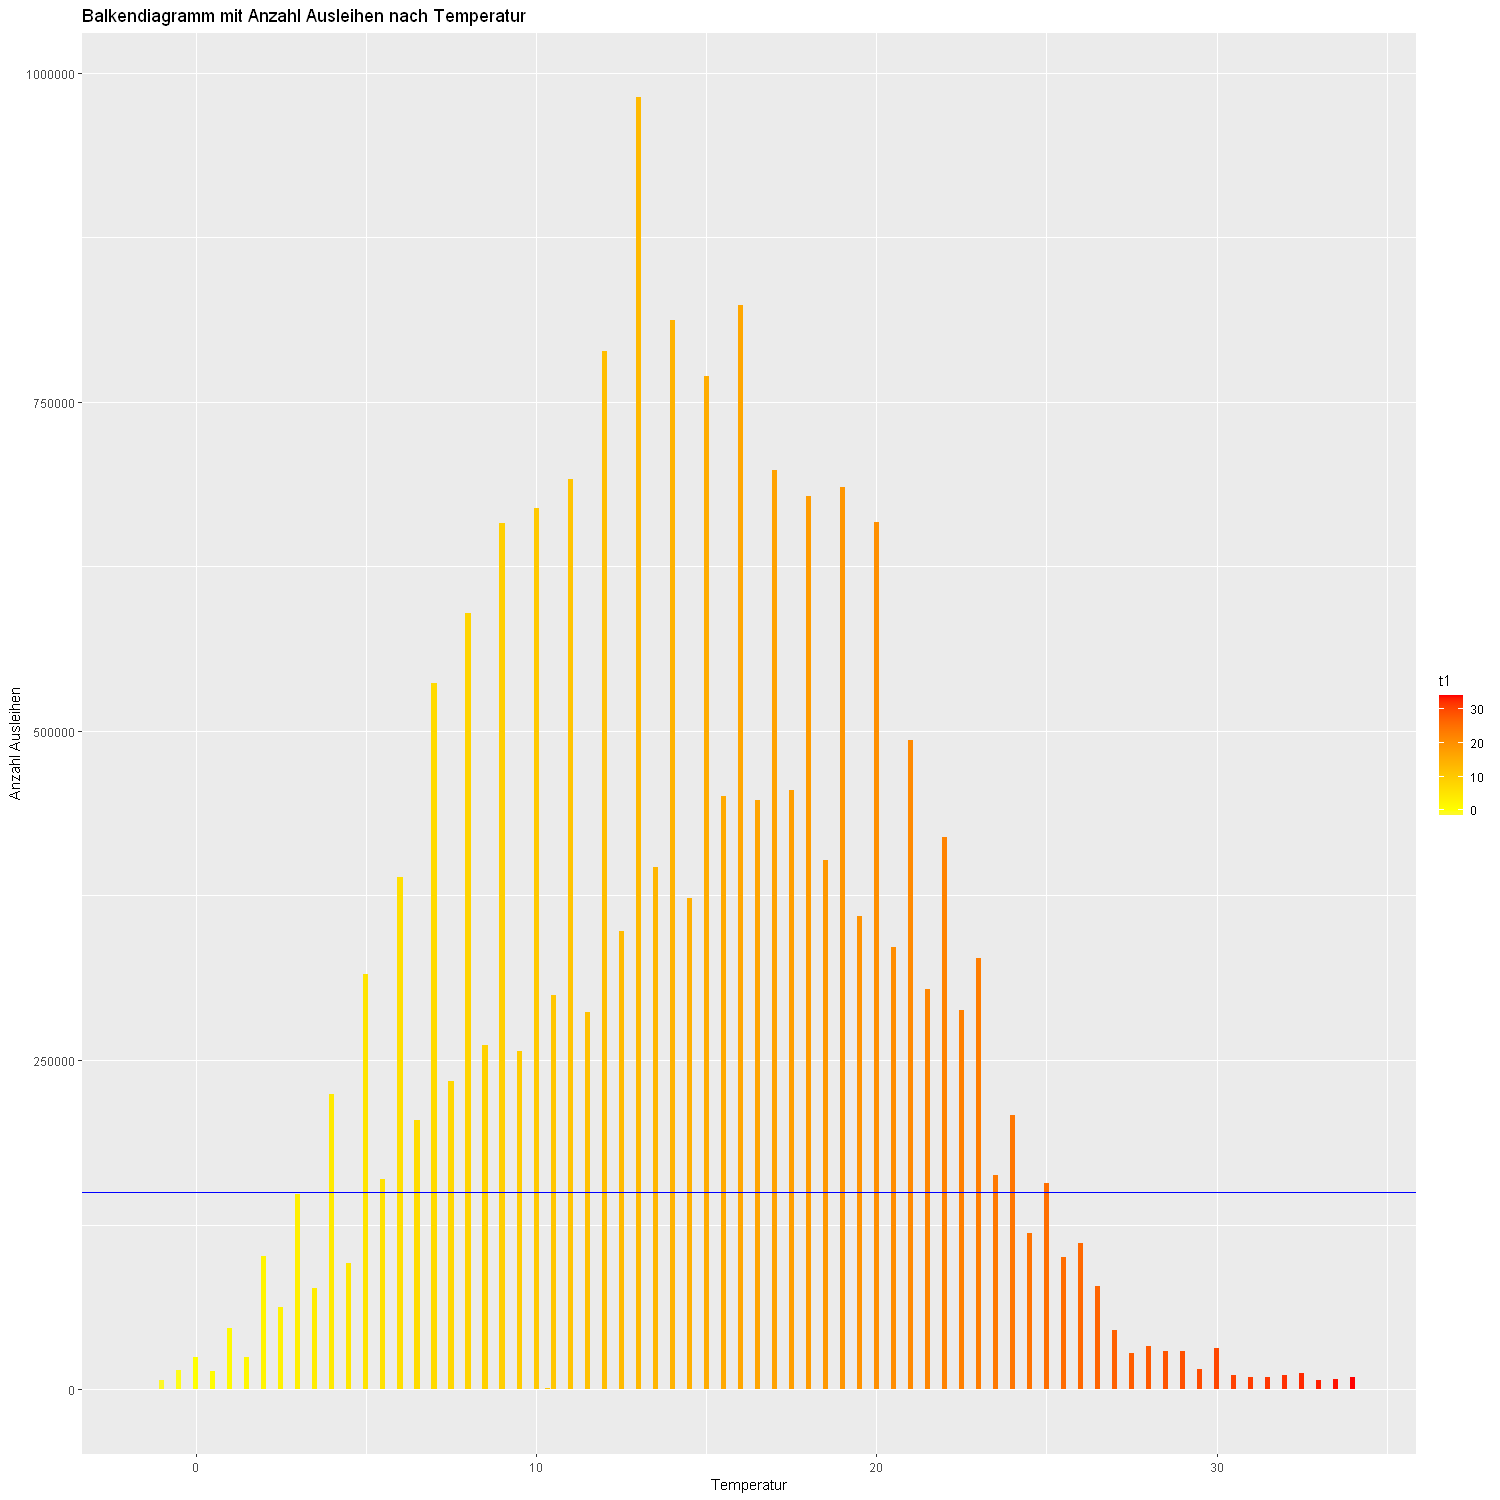

In [73]:
ggplot(data = bike_data, aes(x=t1, y=cnt, fill=t1)) +
       geom_col() +
 scale_fill_gradient2(low = "blue", high = "red", mid ="yellow") +
xlab("Temperatur") +
ylab("Anzahl Ausleihen") +
geom_hline(yintercept = 150000, color = "blue", size = 0.5) +
ggtitle("Balkendiagramm mit Anzahl Ausleihen nach Temperatur")


# Reihenfolge funktioniert nicht (Farben)!! https://stackoverflow.com/questions/63518639/r-ggplot-scale-fill-gradient2-on-histogram-vs-dotplot **



### Visualisierung der Korrelation mit einer Heatmap


The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//RtmpuA4H1f/downloaded_packages


instant date       time     hr weekdays month cnt t1  t2  hum   wind_speed
1 1       2015-01-04 00:00:00 0  Sonntag  1     182 3.0 2.0  93.0 6.0       
2 2       2015-01-04 01:00:00 1  Sonntag  1     138 3.0 2.5  93.0 5.0       
3 3       2015-01-04 02:00:00 2  Sonntag  1     134 2.5 2.5  96.5 0.0       
4 4       2015-01-04 03:00:00 3  Sonntag  1      72 2.0 2.0 100.0 0.0       
5 5       2015-01-04 04:00:00 4  Sonntag  1      47 2.0 0.0  93.0 6.5       
6 6       2015-01-04 05:00:00 5  Sonntag  1      46 2.0 2.0  93.0 4.0       
  weather_code is_holiday is_weekend season
1 3            0          1          3     
2 1            0          1          3     
3 1            0          1          3     
4 1            0          1          3     
5 1            0          1          3     
6 1            0          1          3

instant hr month cnt t1  t2  hum   wind_speed weather_code is_holiday
1 1       0  1     182 3.0 2.0  93.0 6.0        3            0         
2 2       1  1     138 3.0 2.5  93.0 5.0        1            0         
3 3       2  1     134 2.5 2.5  96.5 0.0        1            0         
4 4       3  1      72 2.0 2.0 100.0 0.0        1            0         
5 5       4  1      47 2.0 0.0  93.0 6.5        1            0         
6 6       5  1      46 2.0 2.0  93.0 4.0        1            0         
  is_weekend season
1 1          3     
2 1          3     
3 1          3     
4 1          3     
5 1          3     
6 1          3

instant hr   month cnt  t1   t2   hum   wind_speed weather_code
instant 1.00    0.00 0.47  0.04 0.13 0.14  0.12 -0.13      -0.02       
hr      0.00    1.00 0.00  0.32 0.17 0.15 -0.30  0.14      -0.04       
month   0.47    0.00 1.00  0.06 0.33 0.37  0.11 -0.09      -0.03       
cnt     0.04    0.32 0.06  1.00 0.39 0.37 -0.46  0.12      -0.17       
t1      0.13    0.17 0.33  0.39 1.00 0.99 -0.45  0.15      -0.10       
t2      0.14    0.15 0.37  0.37 0.99 1.00 -0.40  0.09      -0.10       
        is_holiday is_weekend season
instant  0.03       0.00       0.12 
hr       0.00       0.00       0.00 
month   -0.01      -0.01       0.20 
cnt     -0.05      -0.10      -0.12 
t1      -0.04      -0.01      -0.29 
t2      -0.04      -0.01      -0.29

Var1    Var2    value
1 instant instant 1.00 
2 hr      instant 0.00 
3 month   instant 0.47 
4 cnt     instant 0.04 
5 t1      instant 0.13 
6 t2      instant 0.14

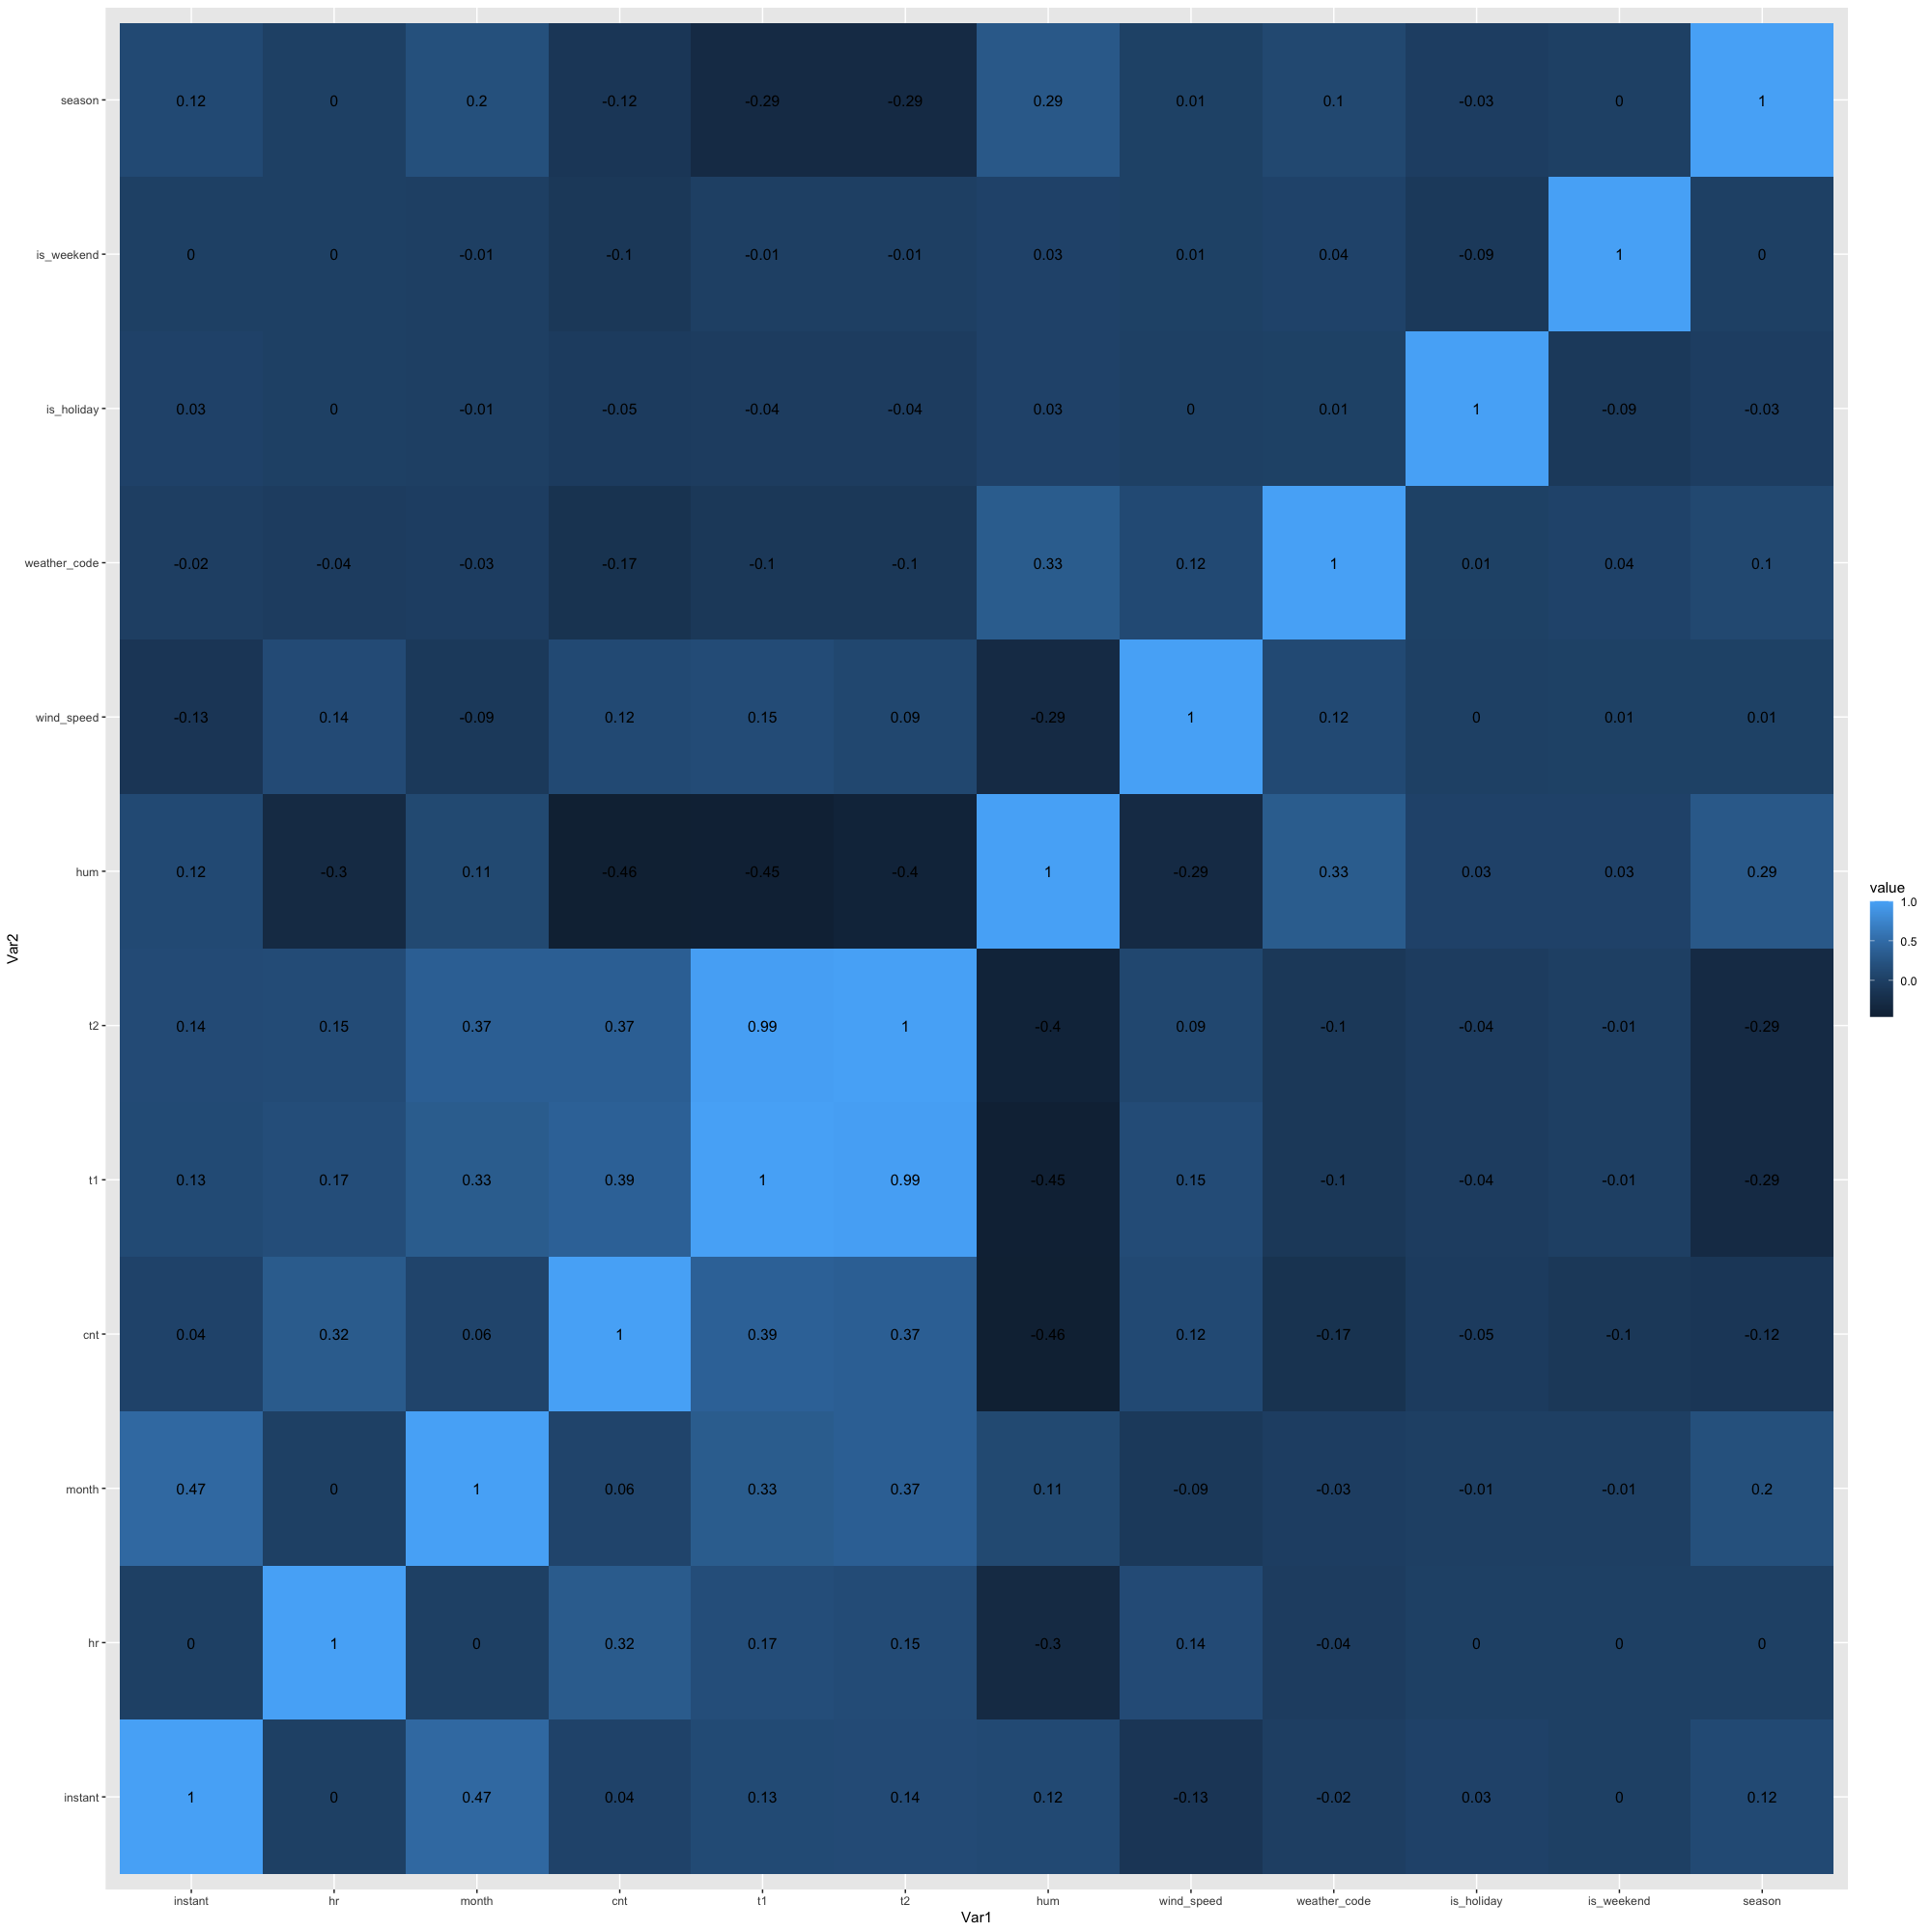

In [160]:
install.packages("reshape2")
library(reshape2)
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head (bike_data)
# Strings ausgeklammert da hier noch eine Umformatierung in Int vorgenommen werden müsste
df = subset(bike_data, select = -c(weekdays, date, time))
head(df)
# Korrelation Matrix erstellen und Korrelation Koeffizienten auf zwei Dezimalstellen runden
cormat <- round(cor(df), 2)
head(cormat)
melted_cormat <- melt(cormat)
head(melted_cormat)
# Korrelation plotten
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "black", size = 4)


### Visualisierung der Korrelation mit einer Heatmap - Neue Anordnung der Werte



The downloaded binary packages are in
	/var/folders/76/b3g4m7y1411581_dpprvcxmc0000gn/T//Rtmpu9sBkZ/downloaded_packages


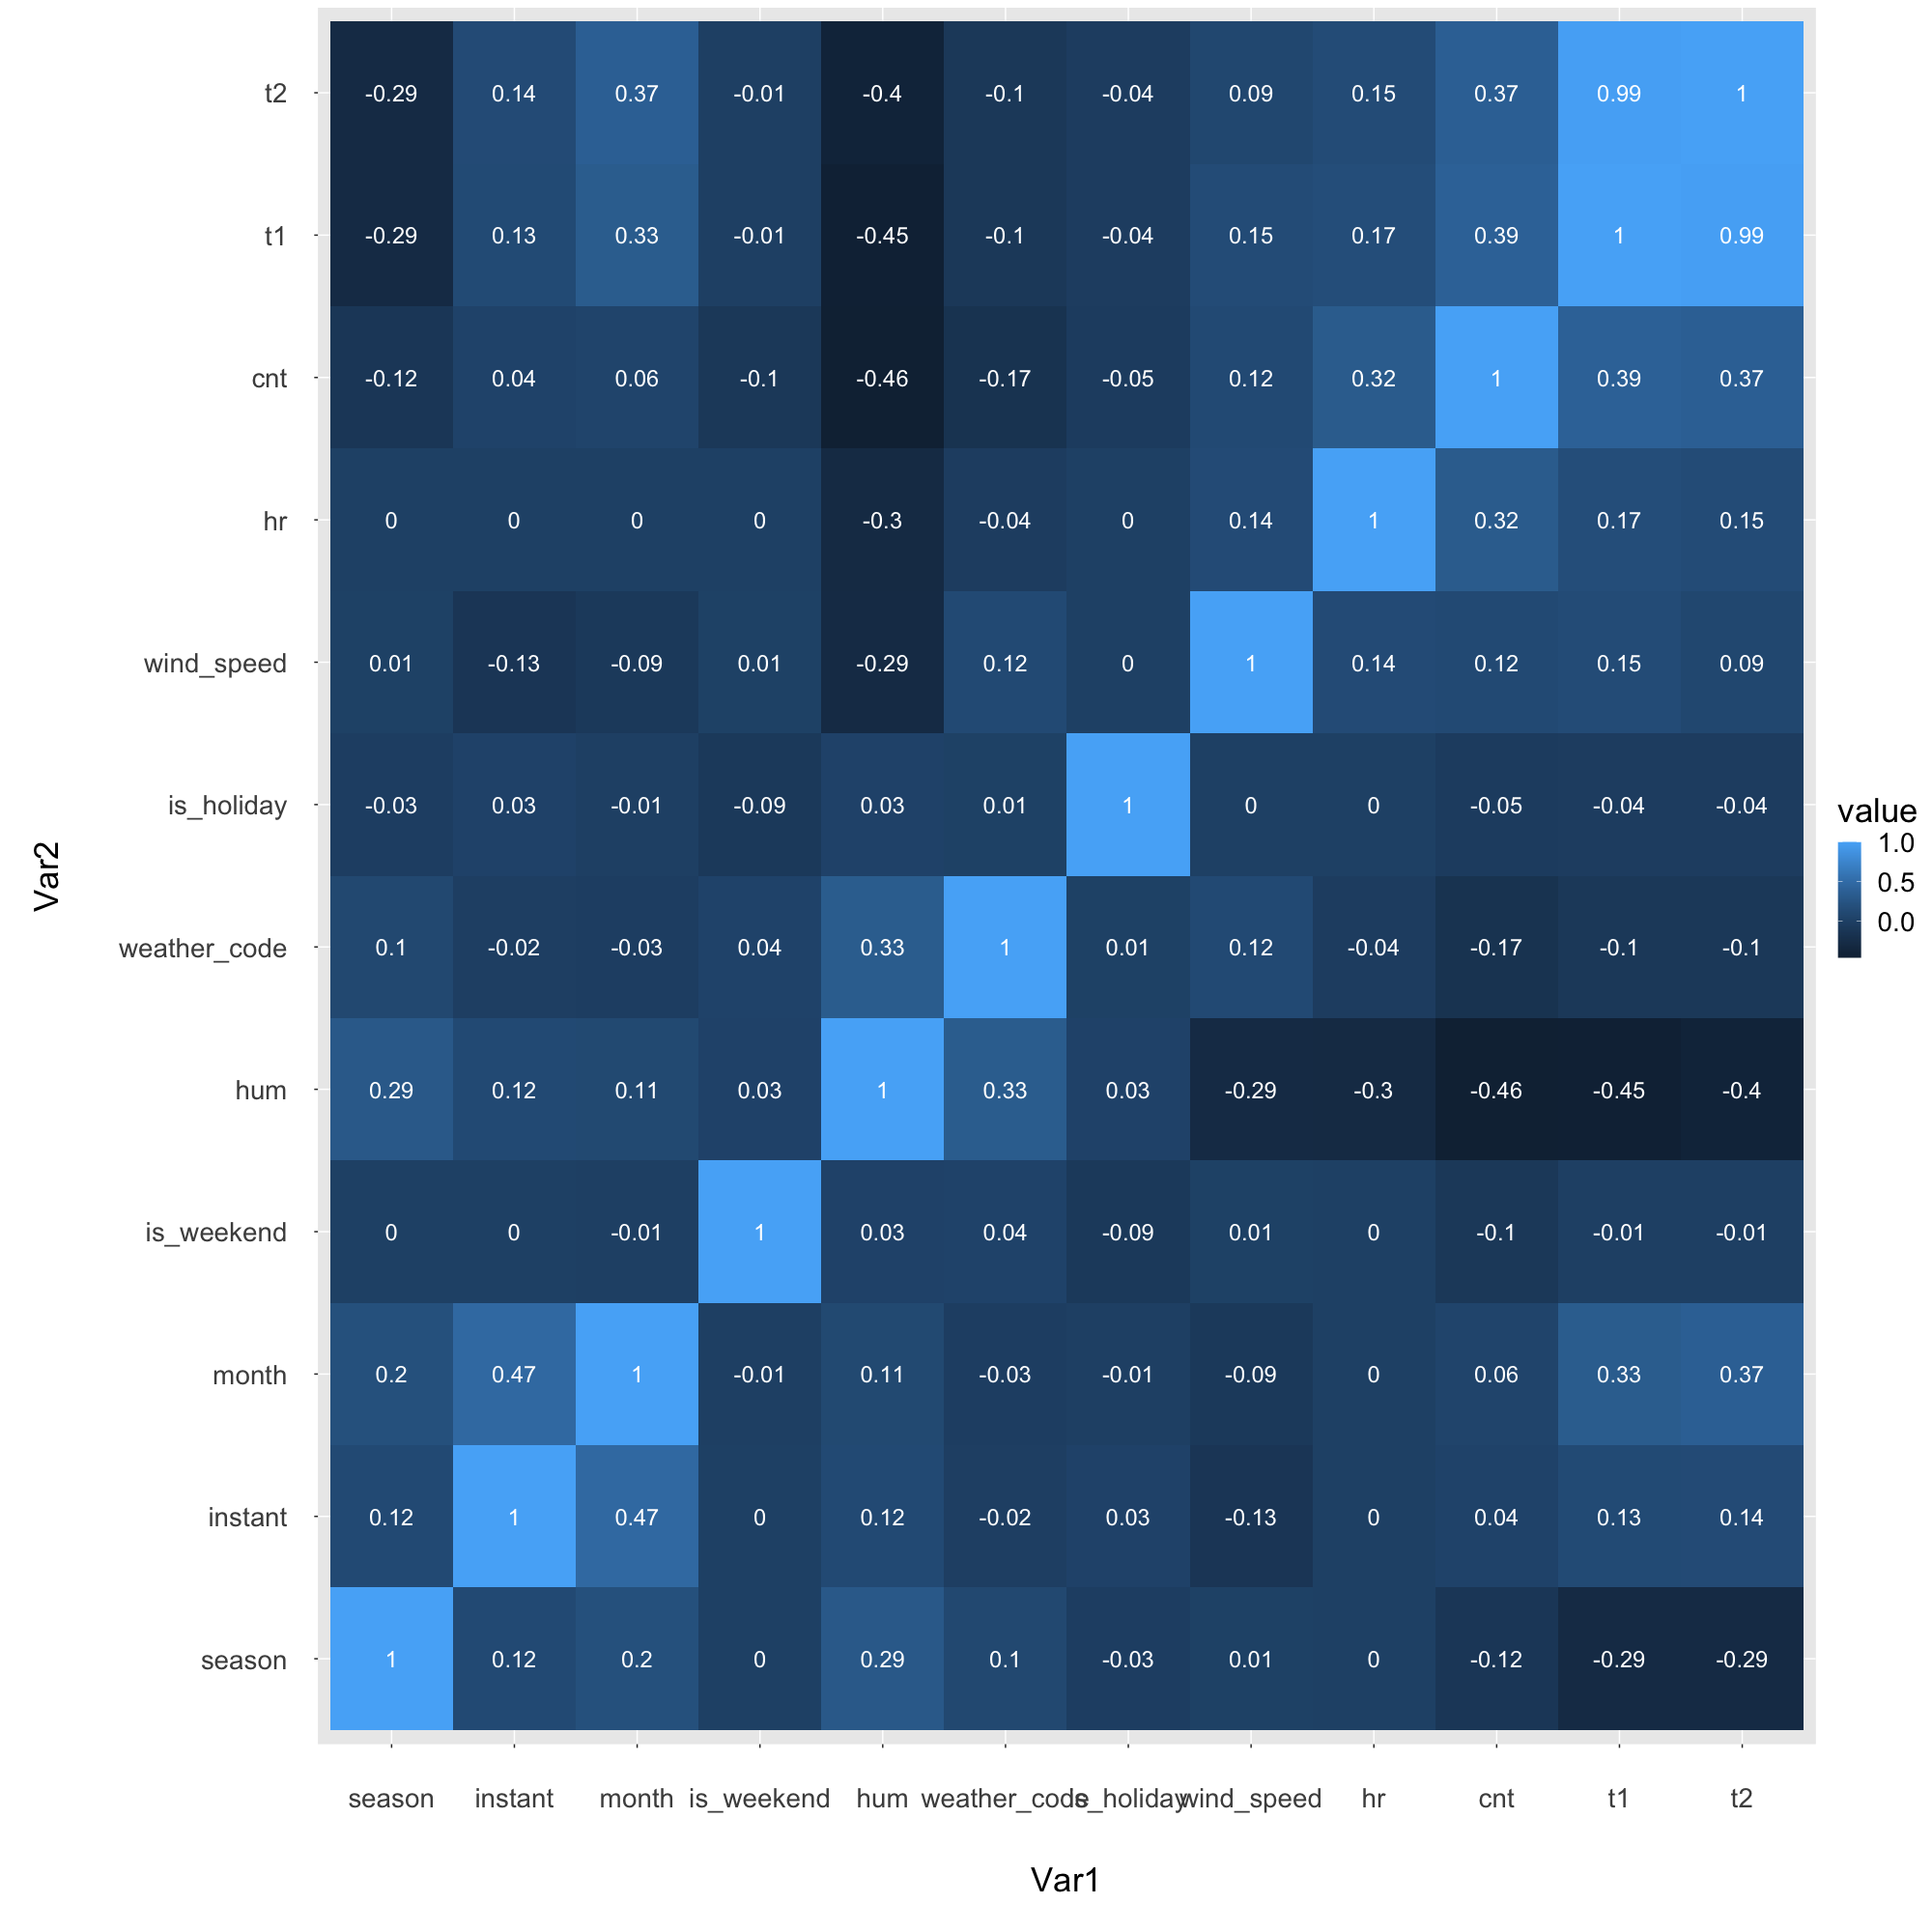

In [153]:
install.packages("reshape2")
library(reshape2)
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
df = subset(bike_data, select = -c(weekdays, date, time))
cormat <- round(cor(df), 2)
dist <- as.dist((1-cormat)/2)
# Hirachisches Clustern der Matrix
hc <- hclust(dist)
cormat <- cormat[hc$order, hc$order]
melted_cormat <- melt(cormat)
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +
geom_text(aes(Var2, Var1, label = value),
          color = "white", size = 6)+



#Aussehen Editing
theme(text = element_text(size = 25) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)


### Balkendiagramm mit Anzahl Ausleihen und Temperatur (gemessene Temperatur - t1)

instant date       time     hr weekdays month cnt t1  t2  hum   wind_speed
1 1       2015-01-04 00:00:00 0  Sonntag  1     182 3.0 2.0  93.0 6.0       
2 2       2015-01-04 01:00:00 1  Sonntag  1     138 3.0 2.5  93.0 5.0       
3 3       2015-01-04 02:00:00 2  Sonntag  1     134 2.5 2.5  96.5 0.0       
4 4       2015-01-04 03:00:00 3  Sonntag  1      72 2.0 2.0 100.0 0.0       
5 5       2015-01-04 04:00:00 4  Sonntag  1      47 2.0 0.0  93.0 6.5       
6 6       2015-01-04 05:00:00 5  Sonntag  1      46 2.0 2.0  93.0 4.0       
  weather_code is_holiday is_weekend season
1 3            0          1          3     
2 1            0          1          3     
3 1            0          1          3     
4 1            0          1          3     
5 1            0          1          3     
6 1            0          1          3

Warning message:
“Removed 3 rows containing missing values (geom_col).”


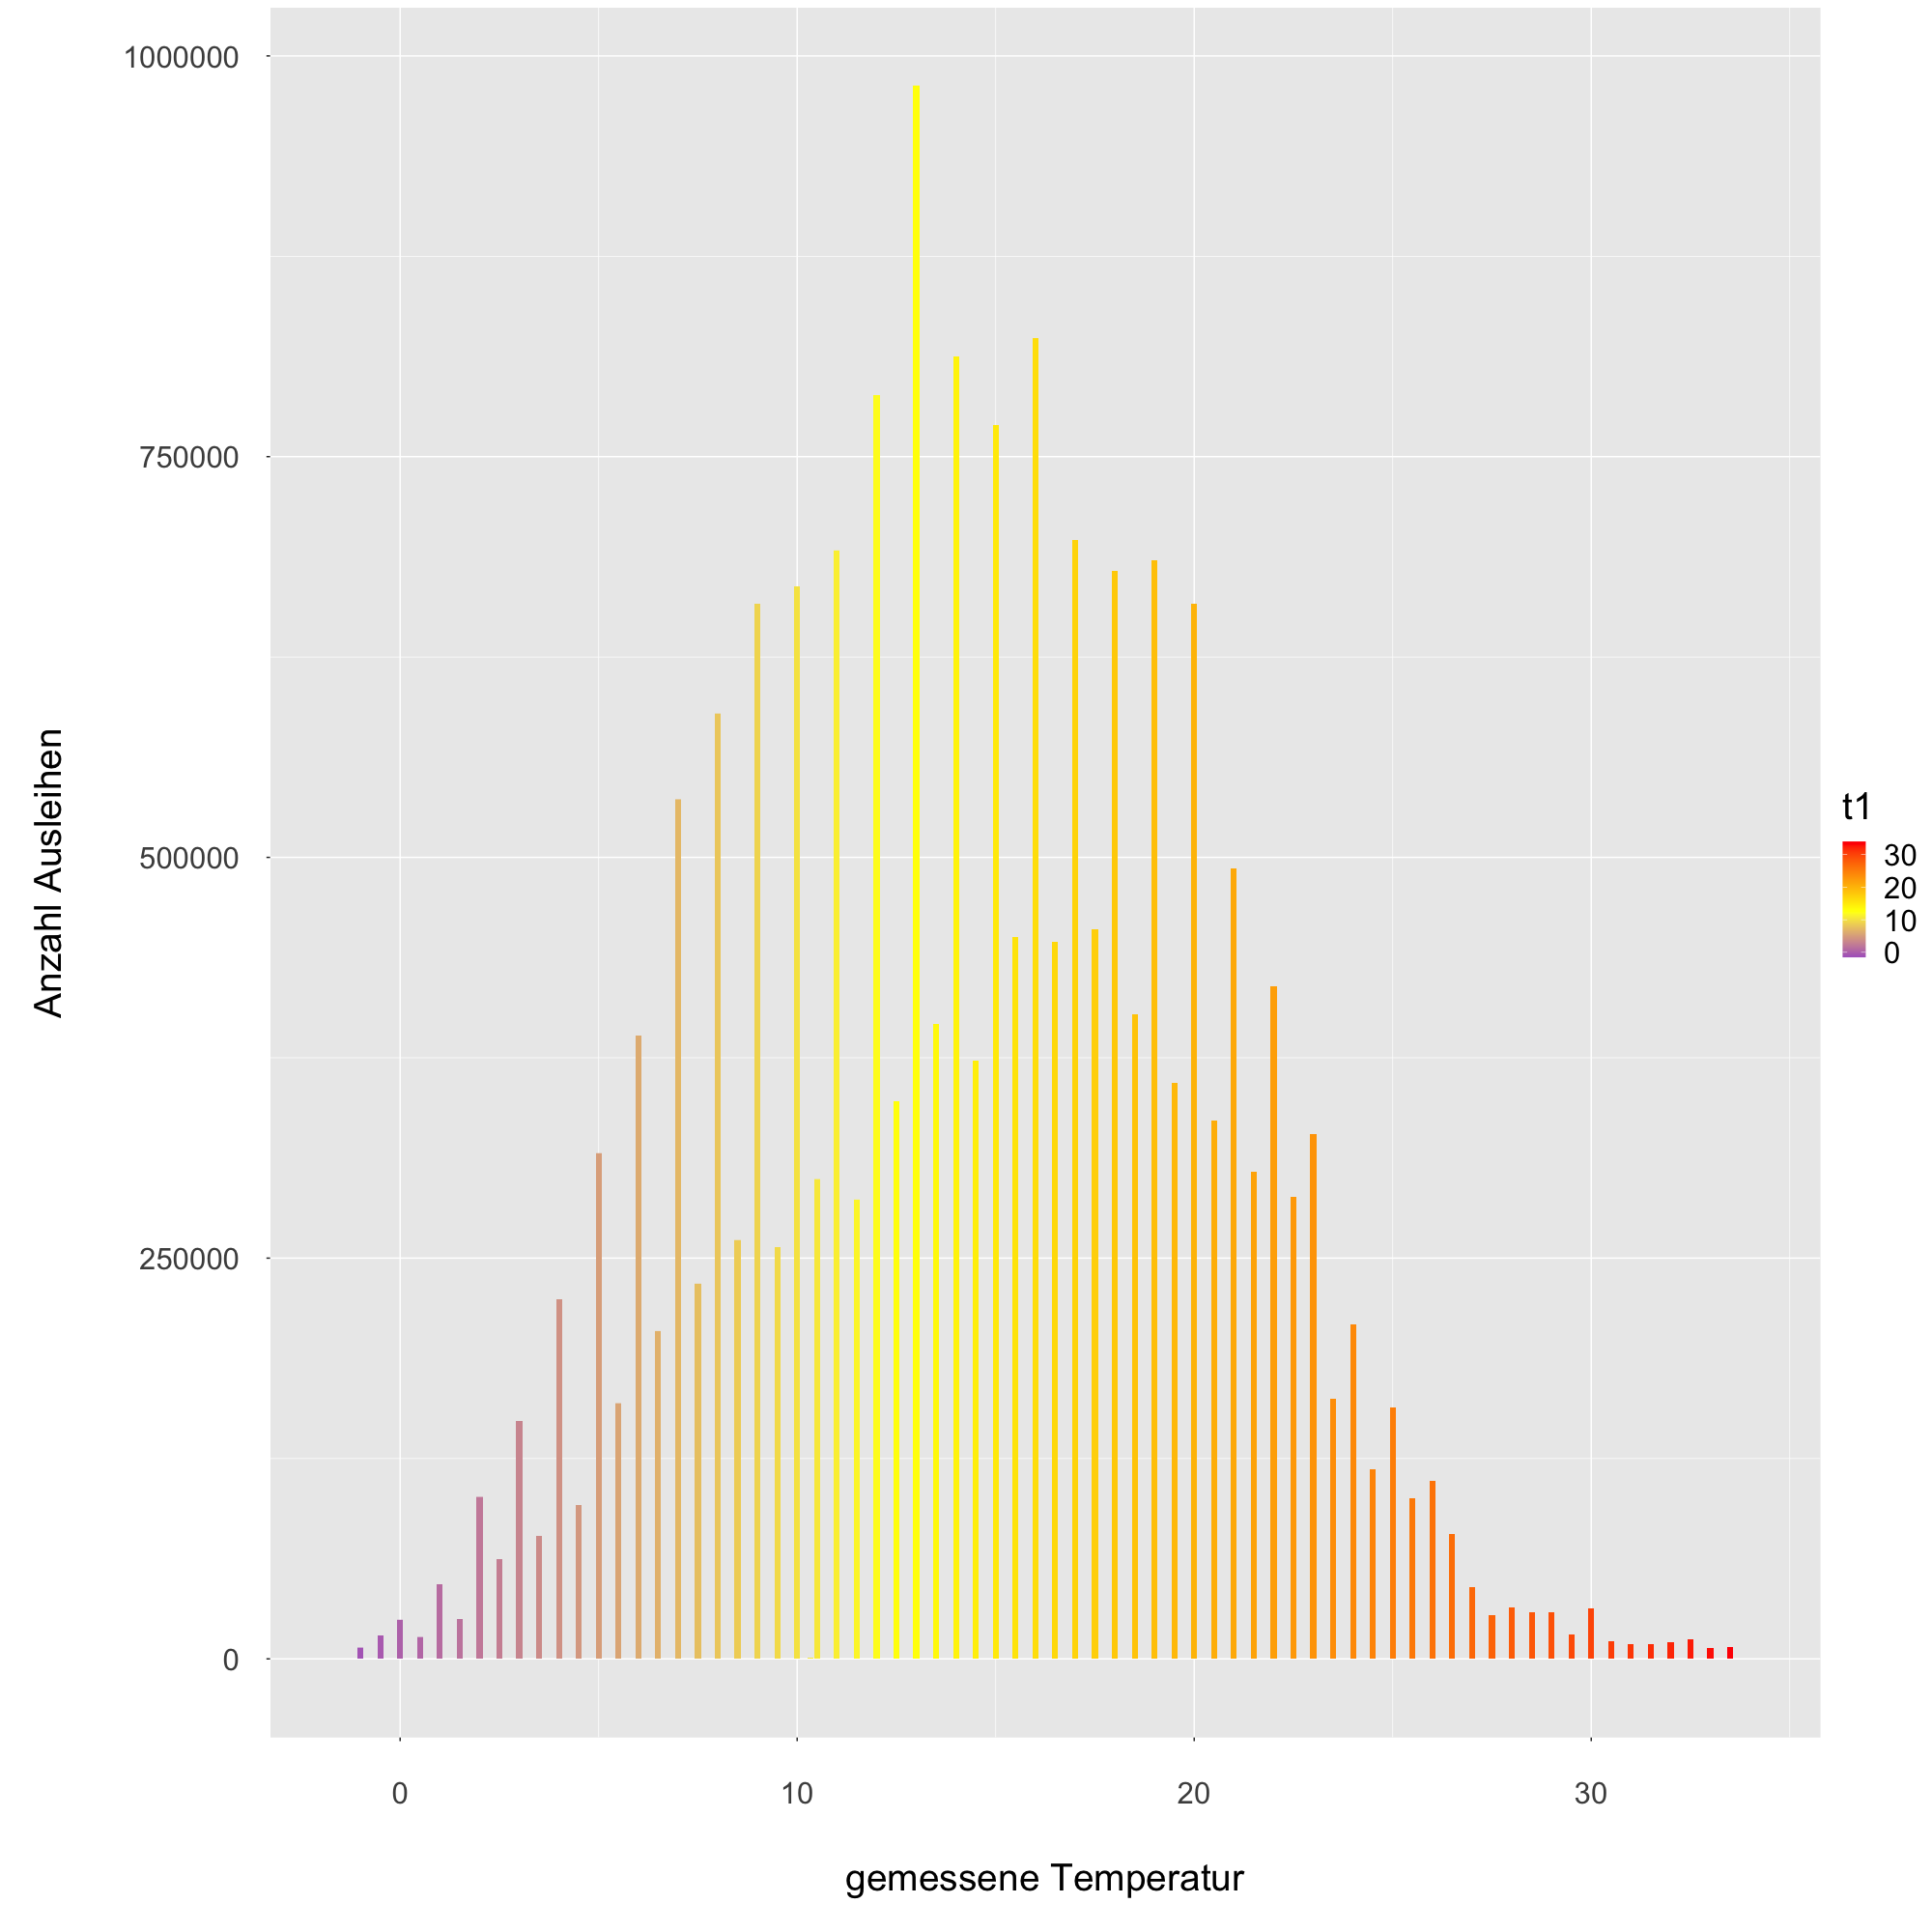

In [62]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)
d <- ggplot(bike_data, aes(t1, cnt, fill = t1))
# gemäss summary Min t1: -1.5, Max t1: 34, Median t1: 12.5
d + geom_col() + scale_x_continuous(limits=c(-1.5,34)) +
scale_fill_gradient2(
    low = "blue", high = "red",
    mid = "yellow", midpoint=12.5) +
xlab("gemessene Temperatur") +
ylab("Anzahl Ausleihen") +

#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Balkendiagramm mit Anzahl Ausleihen und Temperatur (gefühlte Temperatur - t2)

instant date       time     hr weekdays month cnt t1  t2  hum   wind_speed
1 1       2015-01-04 00:00:00 0  Sonntag  1     182 3.0 2.0  93.0 6.0       
2 2       2015-01-04 01:00:00 1  Sonntag  1     138 3.0 2.5  93.0 5.0       
3 3       2015-01-04 02:00:00 2  Sonntag  1     134 2.5 2.5  96.5 0.0       
4 4       2015-01-04 03:00:00 3  Sonntag  1      72 2.0 2.0 100.0 0.0       
5 5       2015-01-04 04:00:00 4  Sonntag  1      47 2.0 0.0  93.0 6.5       
6 6       2015-01-04 05:00:00 5  Sonntag  1      46 2.0 2.0  93.0 4.0       
  weather_code is_holiday is_weekend season
1 3            0          1          3     
2 1            0          1          3     
3 1            0          1          3     
4 1            0          1          3     
5 1            0          1          3     
6 1            0          1          3

Warning message:
“Removed 3 rows containing missing values (geom_col).”


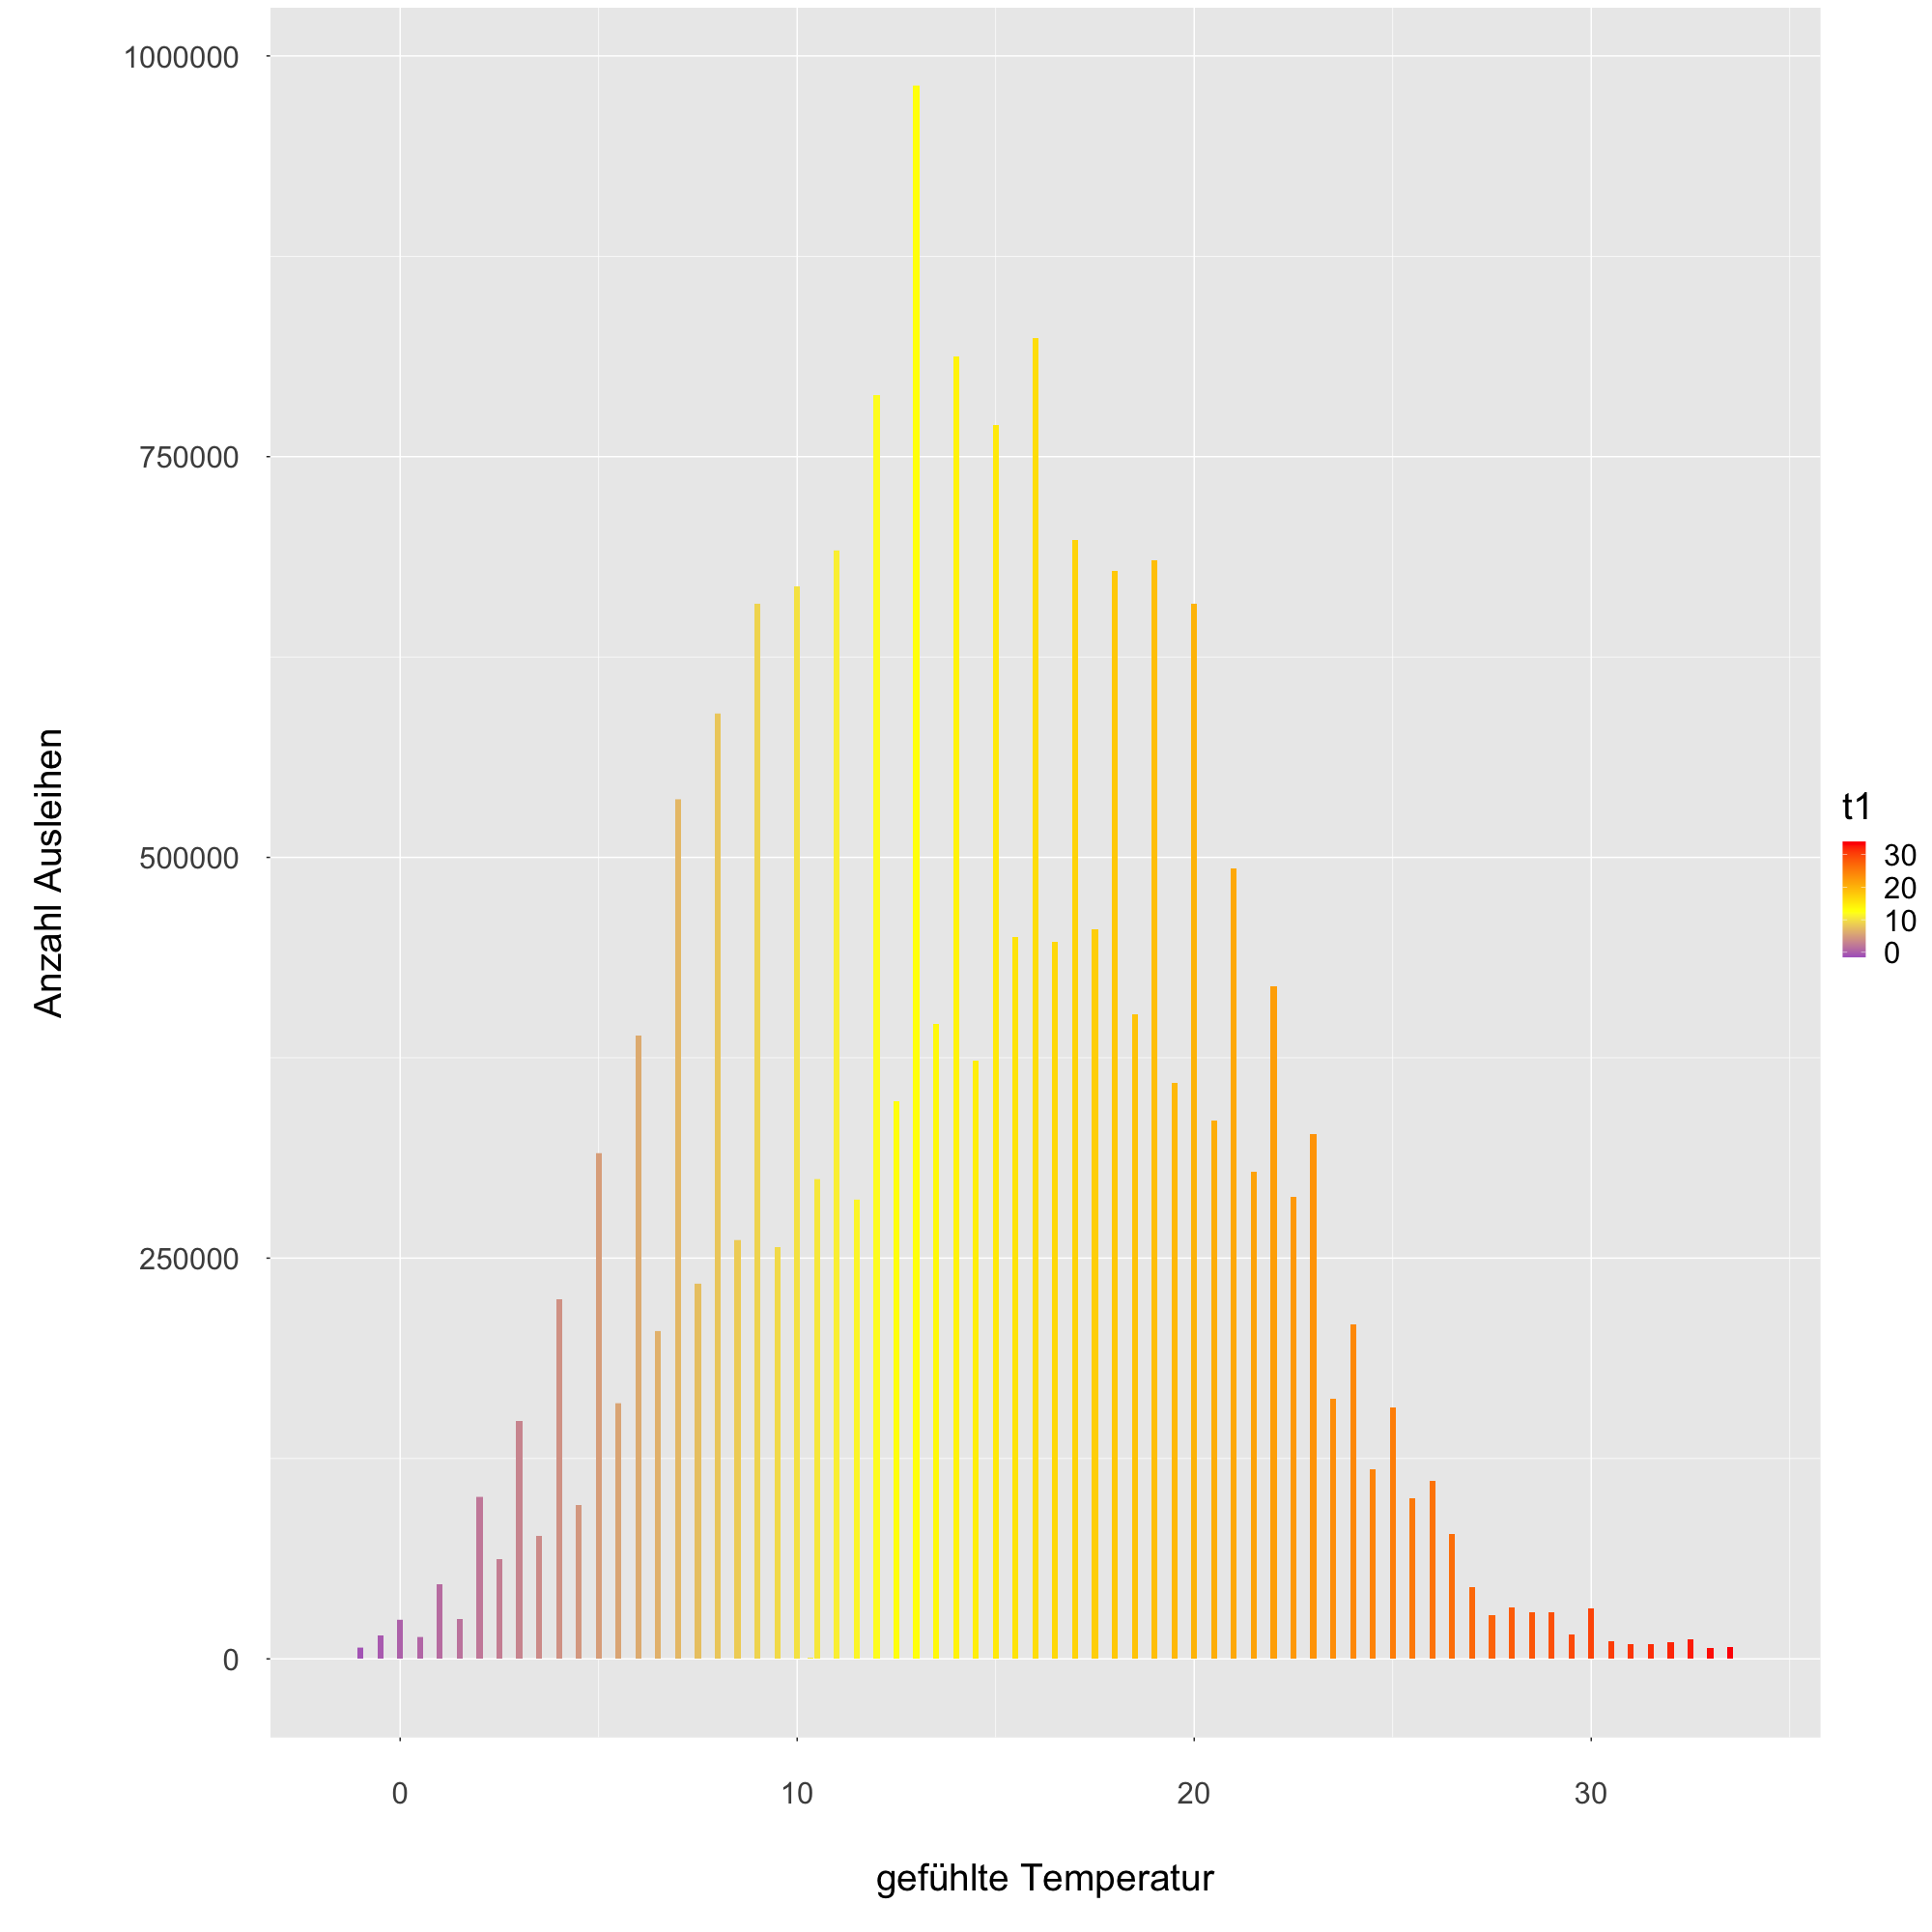

In [63]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)
d <- ggplot(bike_data, aes(t1, cnt, fill = t1))
# gemäss summary Min t2: -6, Max t2: 34, Median t2: 12.5
d + geom_col() + scale_x_continuous(limits=c(-1.5,34)) +
scale_fill_gradient2(
    low = "blue", high = "red",
    mid = "yellow", midpoint=12.5) + 
xlab("gefühlte Temperatur") +
ylab("Anzahl Ausleihen") +


#Aussehen Editing
theme(text = element_text(size = 28) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      )



options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Ausleihen nach Saison - Versuch 1

instant date       time     hr weekdays month cnt t1  t2  hum   wind_speed
1 1       2015-01-04 00:00:00 0  Sonntag  1     182 3.0 2.0  93.0 6.0       
2 2       2015-01-04 01:00:00 1  Sonntag  1     138 3.0 2.5  93.0 5.0       
3 3       2015-01-04 02:00:00 2  Sonntag  1     134 2.5 2.5  96.5 0.0       
4 4       2015-01-04 03:00:00 3  Sonntag  1      72 2.0 2.0 100.0 0.0       
5 5       2015-01-04 04:00:00 4  Sonntag  1      47 2.0 0.0  93.0 6.5       
6 6       2015-01-04 05:00:00 5  Sonntag  1      46 2.0 2.0  93.0 4.0       
  weather_code is_holiday is_weekend season
1 3            0          1          3     
2 1            0          1          3     
3 1            0          1          3     
4 1            0          1          3     
5 1            0          1          3     
6 1            0          1          3

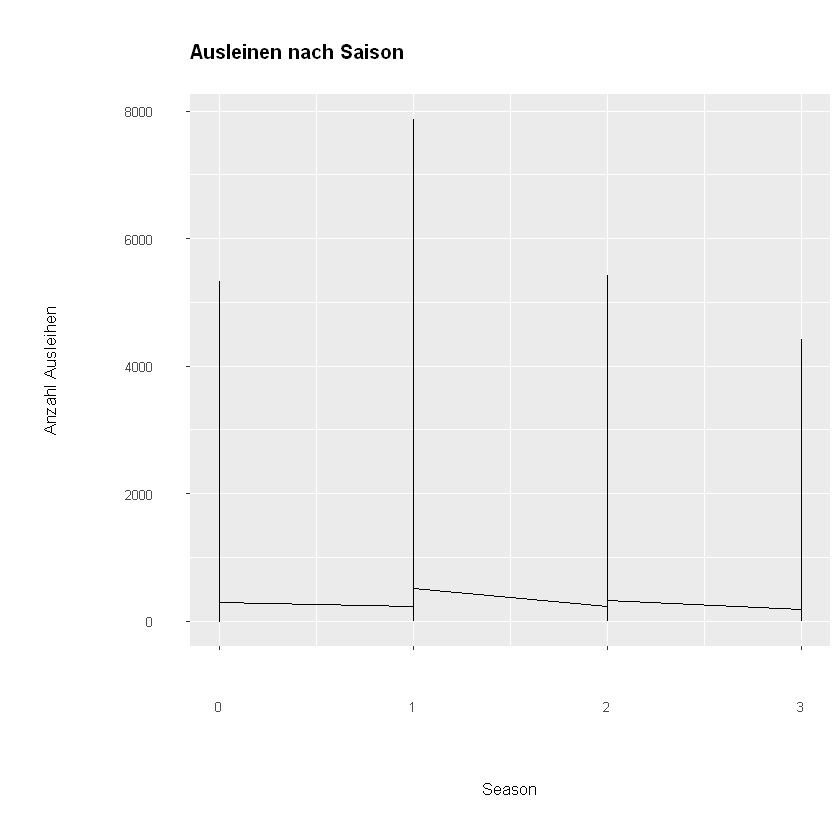

In [48]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)

ggplot(data = bike_data, aes(x = season, y = cnt )) + 
        geom_line() +
xlab("Season") +
ylab("Anzahl Ausleihen") +
ggtitle("Ausleinen nach Saison") +

theme(text = element_text(size = 10) ,
      axis.title.y = element_text(margin = margin(t = 0, r = 40, b = 0, l = 20)),
      axis.title.x = element_text(margin = margin(t = 40, r = 00, b = 20, l = 0)),
      axis.text.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 0)),
      axis.text.x = element_text(margin = margin(t = 30, r = 0, b = 0, l = 0)),
      plot.title = element_text(face="bold" , margin = margin(t = 20, r = 0, b = 20, l = 0))
      )


### Ausleihen nach Saison - Versuch 1

instant date       time     hr weekdays month cnt t1  t2  hum   wind_speed
1 1       2015-01-04 00:00:00 0  Sonntag  1     182 3.0 2.0  93.0 6.0       
2 2       2015-01-04 01:00:00 1  Sonntag  1     138 3.0 2.5  93.0 5.0       
3 3       2015-01-04 02:00:00 2  Sonntag  1     134 2.5 2.5  96.5 0.0       
4 4       2015-01-04 03:00:00 3  Sonntag  1      72 2.0 2.0 100.0 0.0       
5 5       2015-01-04 04:00:00 4  Sonntag  1      47 2.0 0.0  93.0 6.5       
6 6       2015-01-04 05:00:00 5  Sonntag  1      46 2.0 2.0  93.0 4.0       
  weather_code is_holiday is_weekend season
1 3            0          1          3     
2 1            0          1          3     
3 1            0          1          3     
4 1            0          1          3     
5 1            0          1          3     
6 1            0          1          3

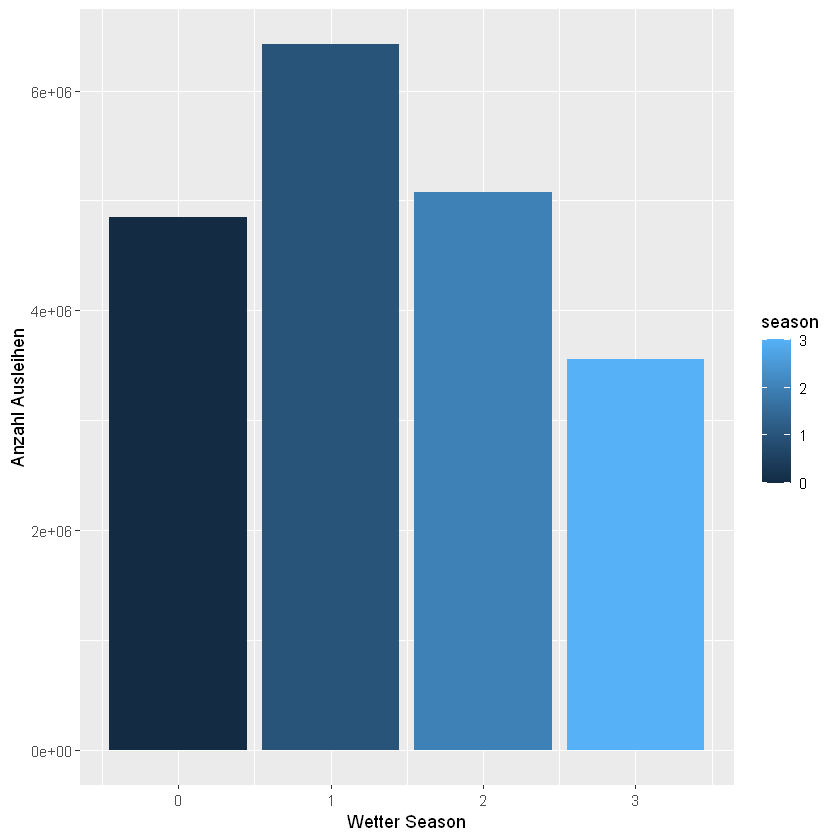

In [47]:
bike_data <- read.csv('london_bereinigt.csv', header = TRUE, sep = ";")
head(bike_data)
d <- ggplot(bike_data, aes(season, cnt, fill = season))
d + geom_col() + 
xlab("Wetter Season") +
ylab("Anzahl Ausleihen") 

### Ausleihen nach Saison - Versuch 2 auf Basis der Vorlage von kaggle - Dataset Bereinigung und Umbenennung von einzelnen Variablen

In [101]:
## Importing packages

library(tidyverse) # metapackage with lots of helpful functions
library(RColorBrewer)
library(scales)
library(lubridate)
options(warn=-1)
library(ggcorrplot)
library(lattice)

b <- read_csv('london_merged.csv');

head (b, 5)

# ---  change some names for clarity str(b)  ----#
b <- b %>% rename("Rentals" = "cnt",
                  "Temperature" = "t1",
                  "Feels like Temperature" = "t2",
                  "Humidity" = "hum",
                  "Season" = 'season',
                  'Weather' = 'weather_code',
                  'Windspeed' = 'wind_speed',
                  'Workday' = 'is_weekend')

# order the columns and put the target variable first
b <- b %>% select("Rentals", "Temperature", "Feels like Temperature", "Humidity", "timestamp",
                  Season, Weather, Windspeed, Workday)


#format the Month and day as a number that can be ordered as a factor
b$date <- as.character(b$timestamp, format = "%e/%d/%y")
# create month day as a number that we can order as a factor
b$Month <- as.character(b$timestamp, format = "%m")
b$month <- as.character(b$timestamp, format = "%m")
b$Day <- as.character(b$timestamp, format = "%u")
b$day <- as.character(b$timestamp, format = "%u")
b$Hour <- hour(b$timestamp)

head(b)

b$Month <- factor(
  b$Month, levels = c("01","02","03","04","05","06","07","08","09","10","11","12"),
  labels = c('January','February', 'March', 'April',
             'May', 'June', 'July', 'August',
             'September','October', 'November', 'December'),
  ordered = TRUE)

b$month <- factor(
  b$month, levels = c("01","02","03","04","05","06","07","08","09","10","11","12"),
  labels = c('JA','FB', 'MR', 'AP', 'MY', 'JN', 'JL', 'AU','SP','OT', 'NV', 'DR'),
  ordered = TRUE)

b$Day <- factor(
  b$Day,levels = c(1,2,3,4,5,6,7),
  labels = c('Monday','Tuesday','Wednesday','Thursday',
             'Friday', 'Saturday','Sunday'),
  ordered = TRUE)


b$day <- factor(
  b$day,levels = c(1,2,3,4,5,6,7),
  labels = c('M','T','W','TH','F','SA','SU'),
  ordered = TRUE)



b$Season <- factor(
  b$Season, levels = c(0,1,2,3),
  labels = c('Frühling', 'Sommer', 'Herbst','Winter'),
  ordered = TRUE)

b$Workday <- factor(b$Workday,
                           levels = c(0,1),
                           labels = c('Workday', 'Weekend'))

b <- b %>% filter(!(Weather %in% c(10,26)))
#table(b$Weather)
b$Weather <- factor(
  b$Weather,
  levels = c(1,2,3,4,7),
  labels = c('Clear', 'Scattered Clouds', 'Broken Clouds', 'Cloudy','Light Rain'))

head(b)



Parsed with column specification:
cols(
  timestamp = col_datetime(format = ""),
  cnt = col_double(),
  t1 = col_double(),
  t2 = col_double(),
  hum = col_double(),
  wind_speed = col_double(),
  weather_code = col_double(),
  is_holiday = col_double(),
  is_weekend = col_double(),
  season = col_double()
)


timestamp           cnt t1  t2  hum   wind_speed weather_code is_holiday
1 2015-01-04 00:00:00 182 3.0 2.0  93.0 6.0        3            0         
2 2015-01-04 01:00:00 138 3.0 2.5  93.0 5.0        1            0         
3 2015-01-04 02:00:00 134 2.5 2.5  96.5 0.0        1            0         
4 2015-01-04 03:00:00  72 2.0 2.0 100.0 0.0        1            0         
5 2015-01-04 04:00:00  47 2.0 0.0  93.0 6.5        1            0         
  is_weekend season
1 1          3     
2 1          3     
3 1          3     
4 1          3     
5 1          3

Rentals Temperature Feels like Temperature Humidity timestamp          
1 182     3.0         2.0                     93.0    2015-01-04 00:00:00
2 138     3.0         2.5                     93.0    2015-01-04 01:00:00
3 134     2.5         2.5                     96.5    2015-01-04 02:00:00
4  72     2.0         2.0                    100.0    2015-01-04 03:00:00
5  47     2.0         0.0                     93.0    2015-01-04 04:00:00
6  46     2.0         2.0                     93.0    2015-01-04 05:00:00
  Season Weather Windspeed Workday date     Month month Day day Hour
1 3      3       6.0       1        4/04/15 01    01    7   7   0   
2 3      1       5.0       1        4/04/15 01    01    7   7   1   
3 3      1       0.0       1        4/04/15 01    01    7   7   2   
4 3      1       0.0       1        4/04/15 01    01    7   7   3   
5 3      1       6.5       1        4/04/15 01    01    7   7   4   
6 3      1       4.0       1        4/04/15 01    01    7   7   5

Rentals Temperature Feels like Temperature Humidity timestamp          
1 182     3.0         2.0                     93.0    2015-01-04 00:00:00
2 138     3.0         2.5                     93.0    2015-01-04 01:00:00
3 134     2.5         2.5                     96.5    2015-01-04 02:00:00
4  72     2.0         2.0                    100.0    2015-01-04 03:00:00
5  47     2.0         0.0                     93.0    2015-01-04 04:00:00
6  46     2.0         2.0                     93.0    2015-01-04 05:00:00
  Season Weather       Windspeed Workday date     Month   month Day    day Hour
1 Winter Broken Clouds 6.0       Weekend  4/04/15 January JA    Sunday SU  0   
2 Winter Clear         5.0       Weekend  4/04/15 January JA    Sunday SU  1   
3 Winter Clear         0.0       Weekend  4/04/15 January JA    Sunday SU  2   
4 Winter Clear         0.0       Weekend  4/04/15 January JA    Sunday SU  3   
5 Winter Clear         6.5       Weekend  4/04/15 January JA    Sunday SU  4   
6 Winter Clear         4.0       Weekend  4/04/15 January JA    Sunday SU  5

### Ausleihen pro Jahreszeit

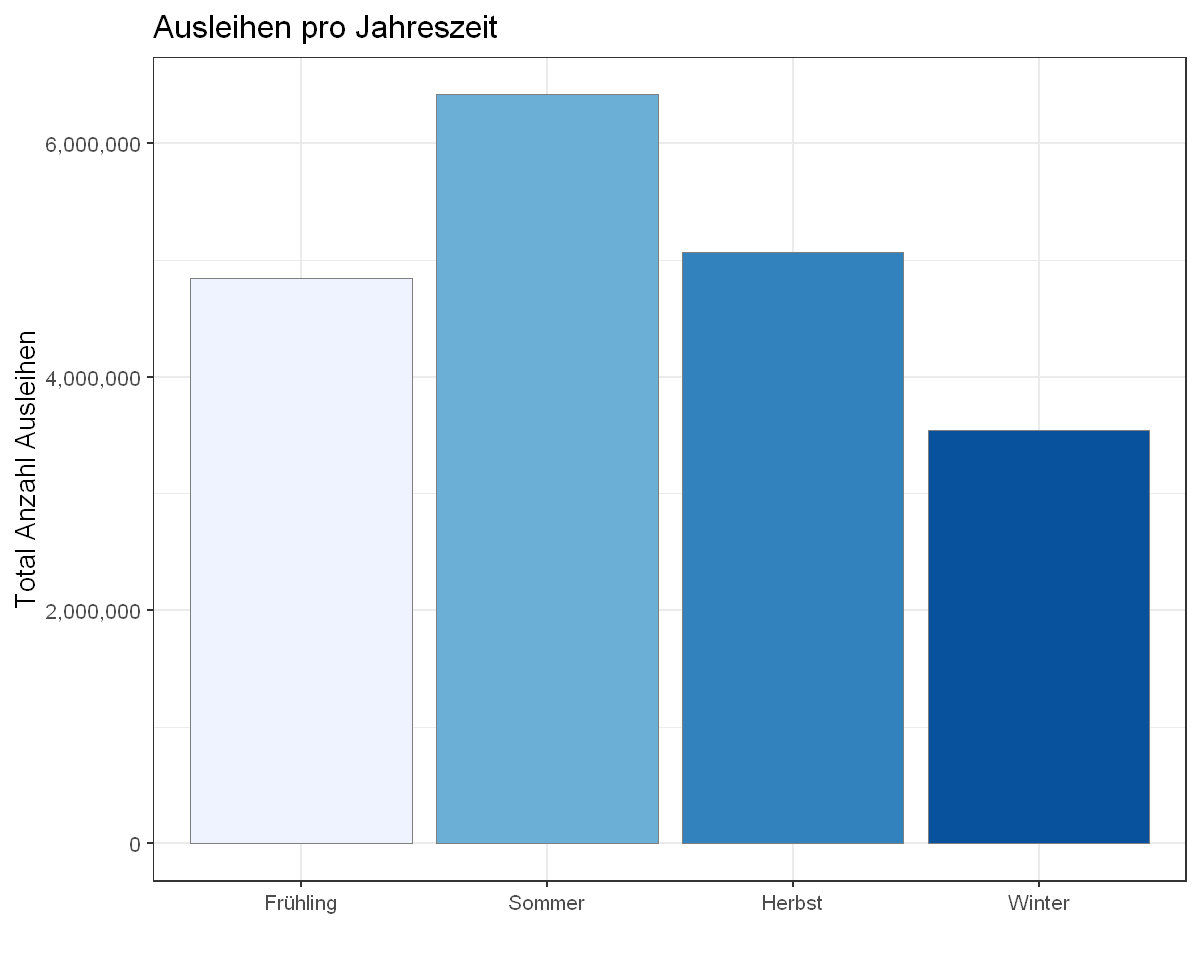

In [110]:
### ----  Ausleihen pro Jahreszeit  ----- #####
s = c("#eff3ff", '#6baed6', '#3182bd', '#08519c')
options(repr.plot.width=10, repr.plot.height=8)
b %>% group_by(Season) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(Season, rent, fill = Season)) + 
  geom_bar(stat = "identity", show.legend = F, color = 'gray50') +
  theme_bw(base_size = 16) + scale_fill_manual(values = s) +
  labs(title = "Ausleihen pro Jahreszeit", x = "", y = "Total Anzahl Ausleihen") + scale_y_continuous(labels = comma)

### Ausleihen pro Jahreszeit (Arbeitstag vs. Wochenende)

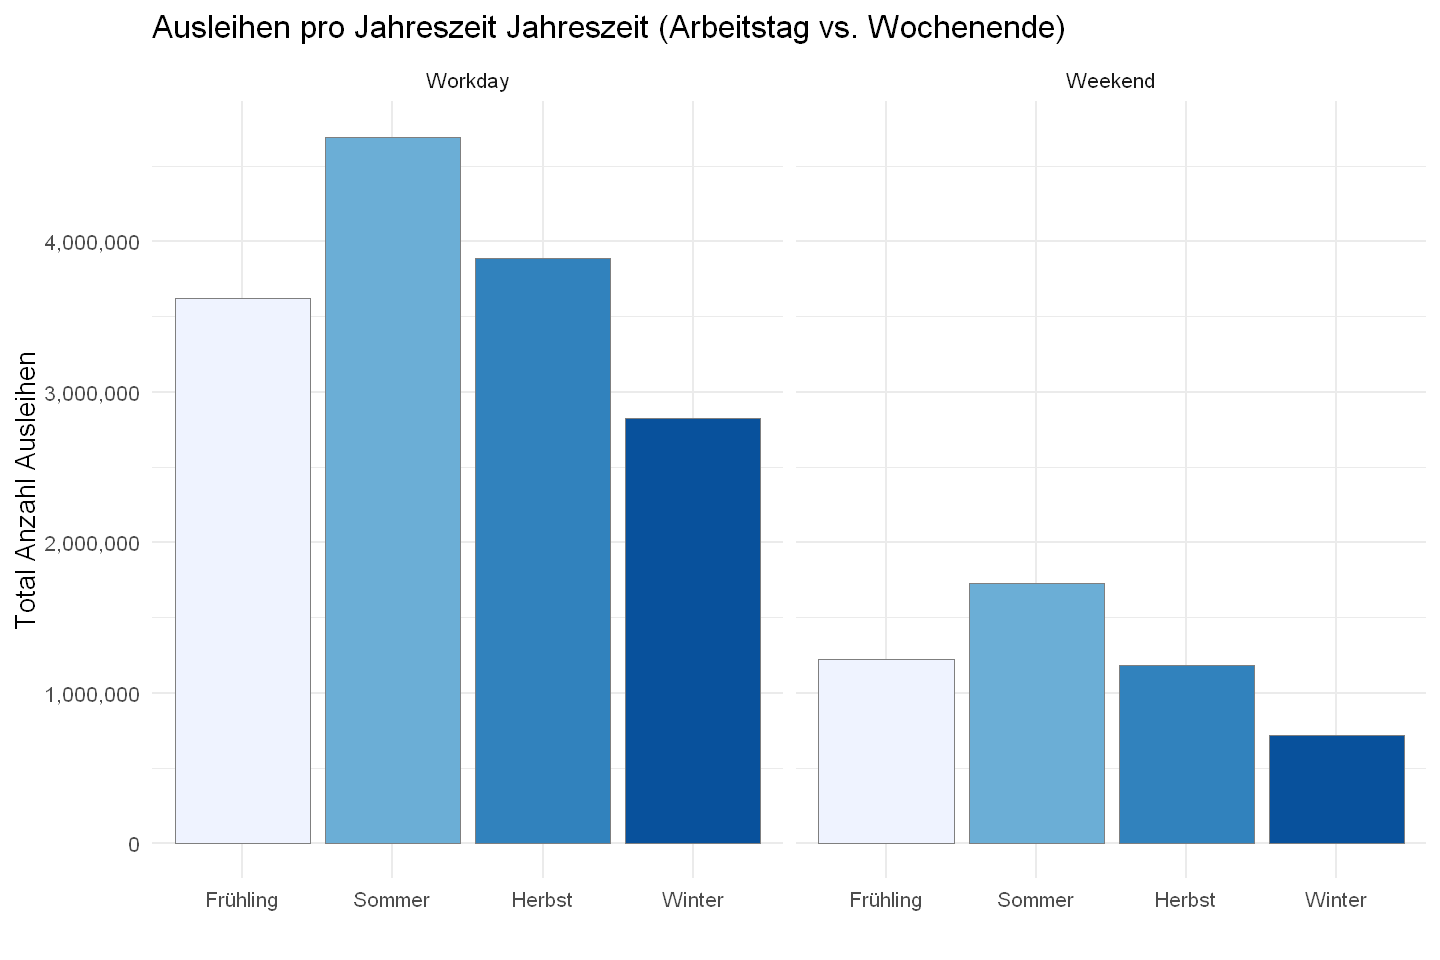

In [109]:
###   Rentals by Season & Day Off  #####
options(repr.plot.width=12, repr.plot.height=8)
b %>% group_by(Season, Workday) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(Season, rent, fill = Season)) + 
  geom_bar(stat = "identity", color = 'grey50', show.legend = F) +
  scale_fill_manual(values = s) +
  facet_grid(~Workday) + theme_minimal(base_size = 16) +
  labs(title = "Ausleihen pro Jahreszeit (Arbeitstag vs. Wochenende)", x = "", y = "Total Anzahl Ausleihen") +
  scale_y_continuous(labels = comma)

### Aushleihen pro Monat (Arbeitstag vs. Wochenende)

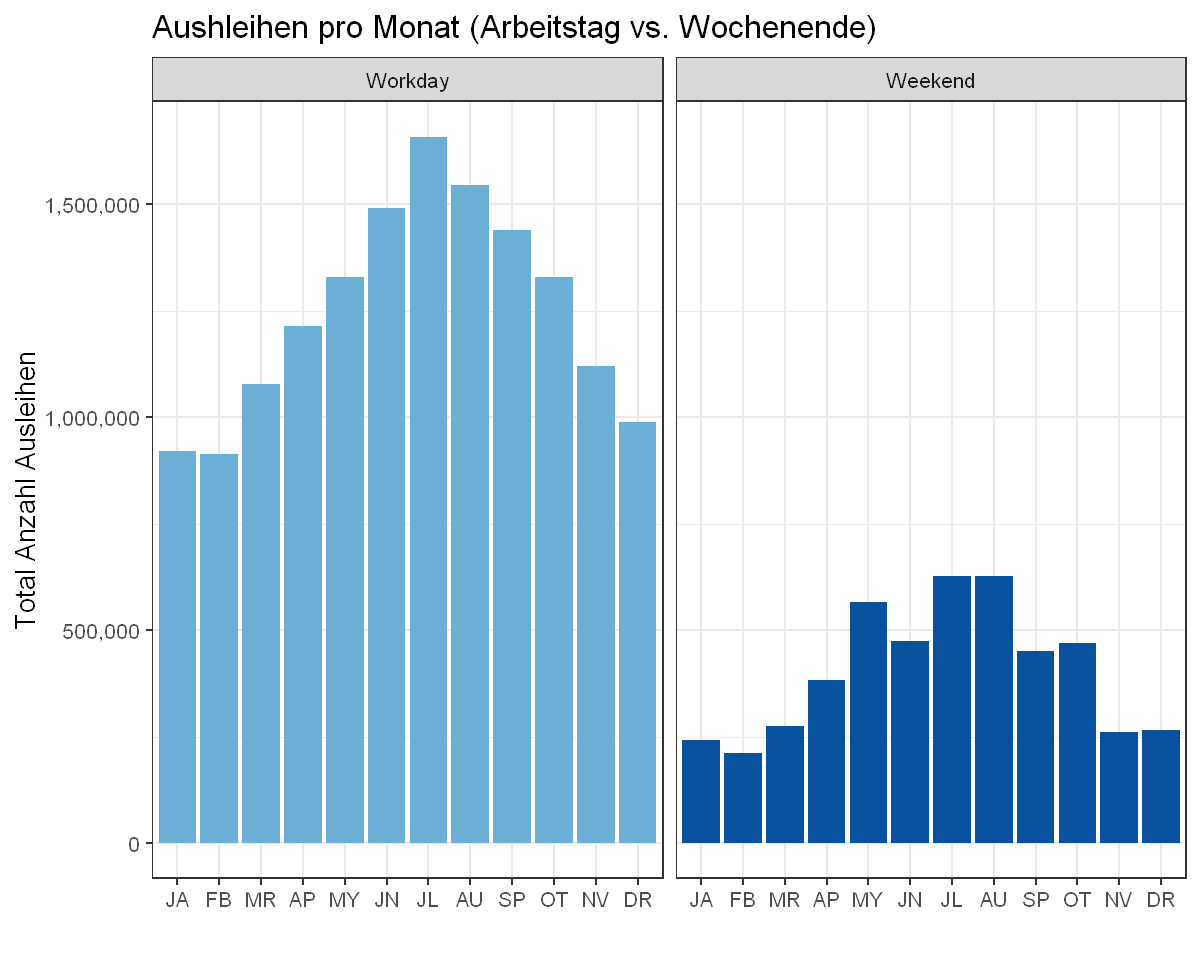

In [114]:
###   -----  Rentals by Month & workday ---- #####
wd = c("#6baed6", "#08519c")
b %>% group_by(month, Workday) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(month, rent, fill = Workday)) + 
  geom_bar(stat = "identity", show.legend = F) +
  scale_fill_manual(values = wd) +
  facet_grid(~Workday) + theme_bw(base_size = 16) + 
  labs(title = "Aushleihen pro Monat (Arbeitstag vs. Wochenende)", x = "", y = "Total Anzahl Ausleihen") +
  scale_y_continuous(labels = comma)

### Ausleihen pro Wetter

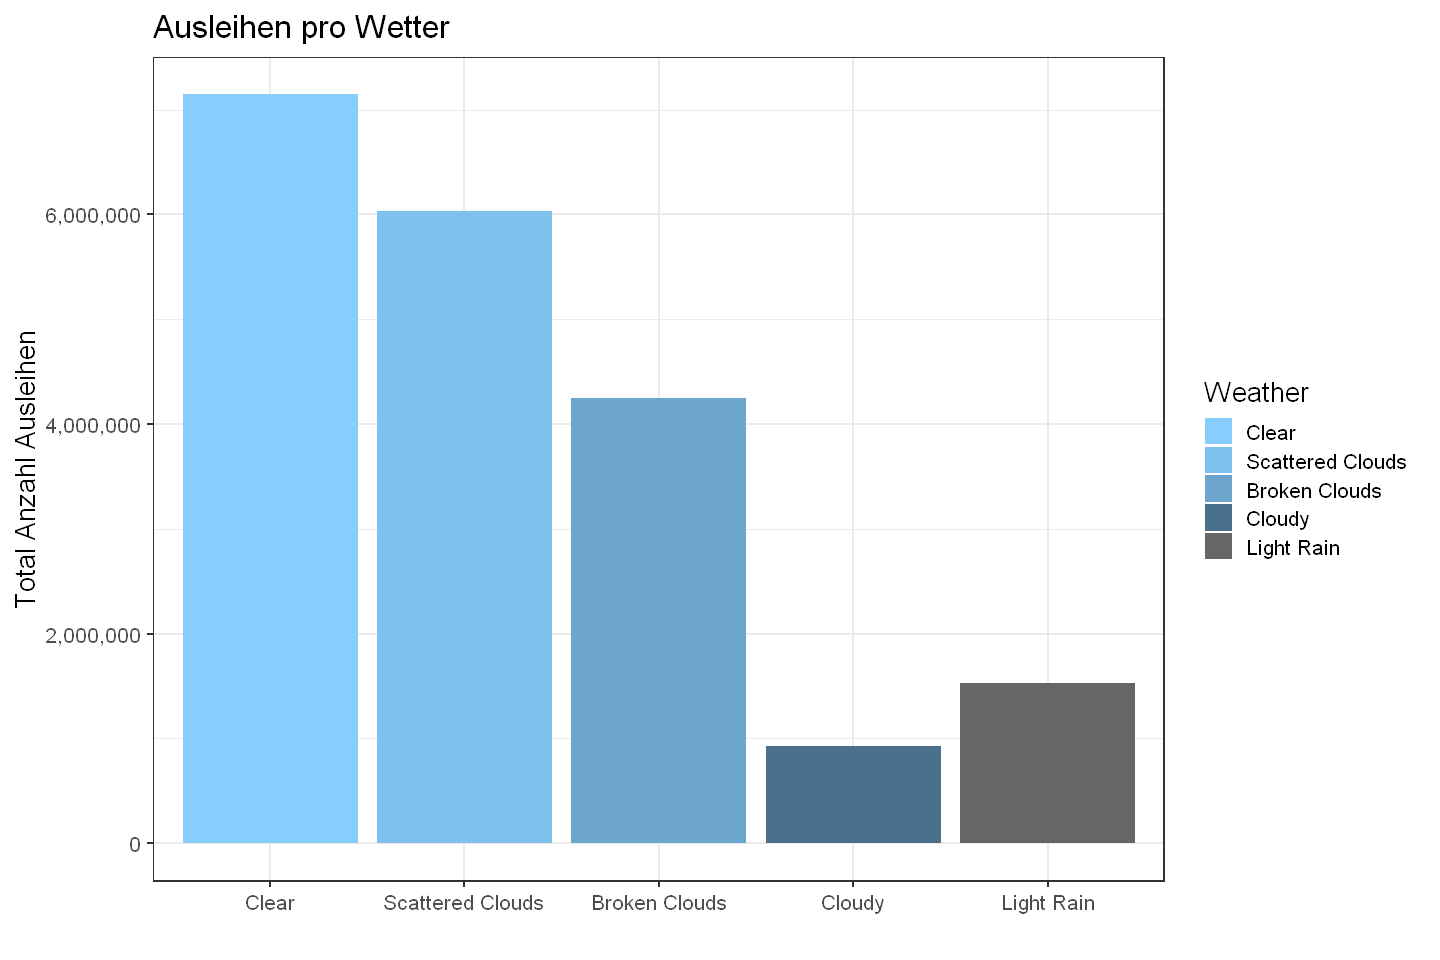

In [117]:
###  ---- Rentals by Weather ----  #####

options(repr.plot.width=12, repr.plot.height=8)
w = c('skyblue1','skyblue2','skyblue3','skyblue4','grey40')
b %>% group_by(Weather) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(Weather, rent, fill = Weather)) + 
  geom_bar(stat = "identity") + scale_fill_manual(values = w) +
  theme_bw(base_size = 16) + 
  labs(title = "Ausleihen pro Wetter", x = "", y = "Total Anzahl Ausleihen") +
  scale_y_continuous(labels = comma)

### Ausleihen pro Arbeitstag - Version 1

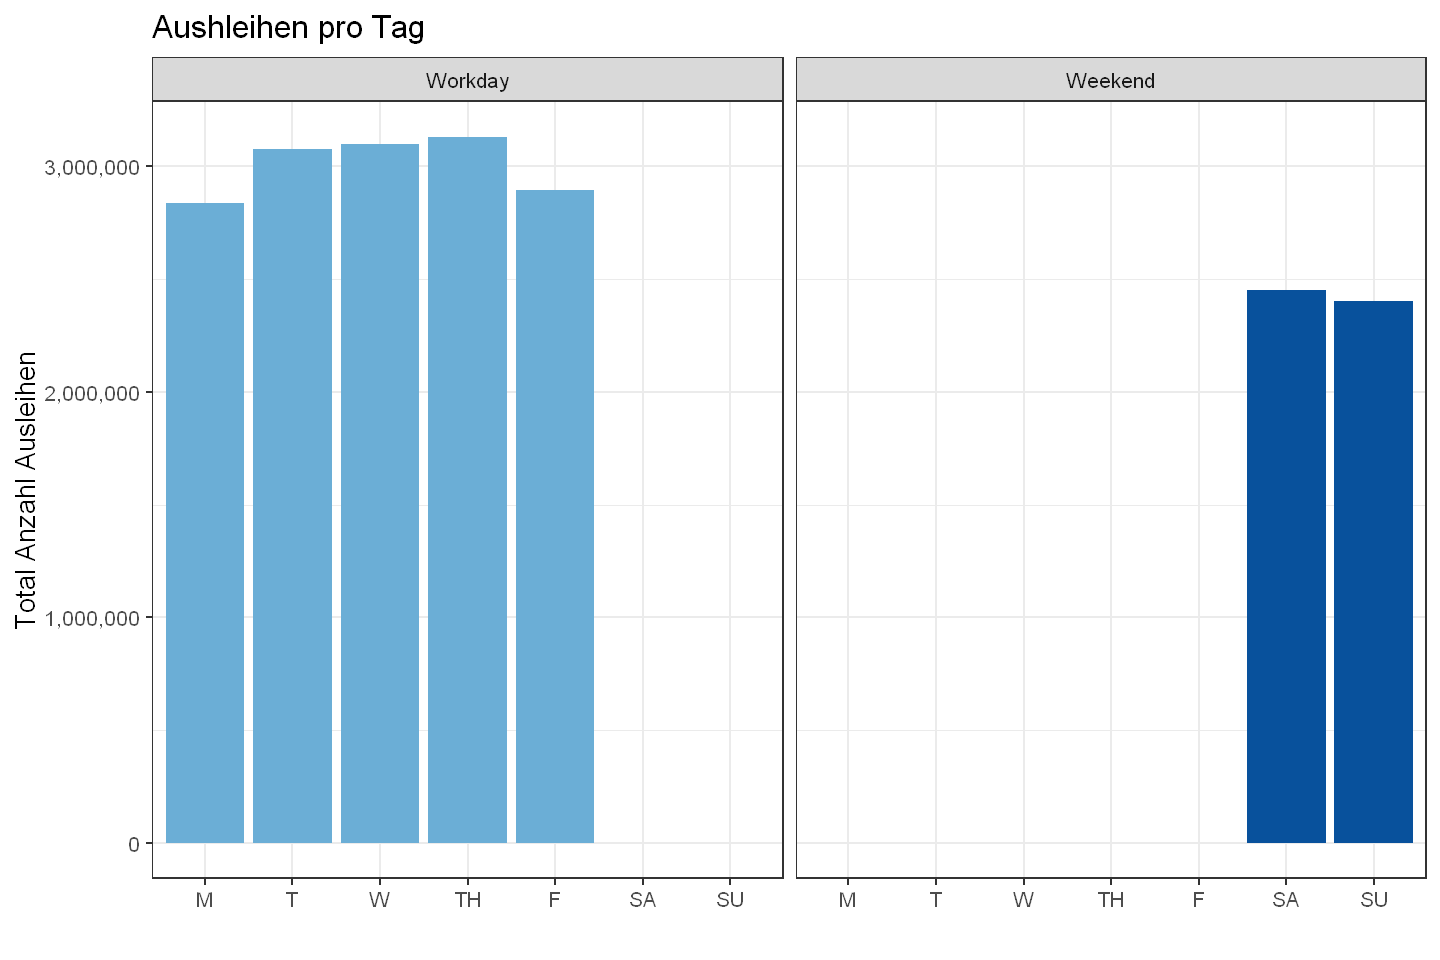

In [128]:
###   -----  Rentals by Workday ---- #####
wd = c("#6baed6", "#08519c")
b %>% group_by(day, Workday) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(day, rent, fill = Workday)) + 
  geom_bar(stat = "identity", show.legend = F) +
  scale_fill_manual(values = wd) +
  facet_grid(~Workday) + theme_bw(base_size = 16) + 
  labs(title = "Aushleihen pro Tag", x = "", y = "Total Anzahl Ausleihen") +
  scale_y_continuous(labels = comma)




### Ausleihen pro Arbeitstag - Version 2

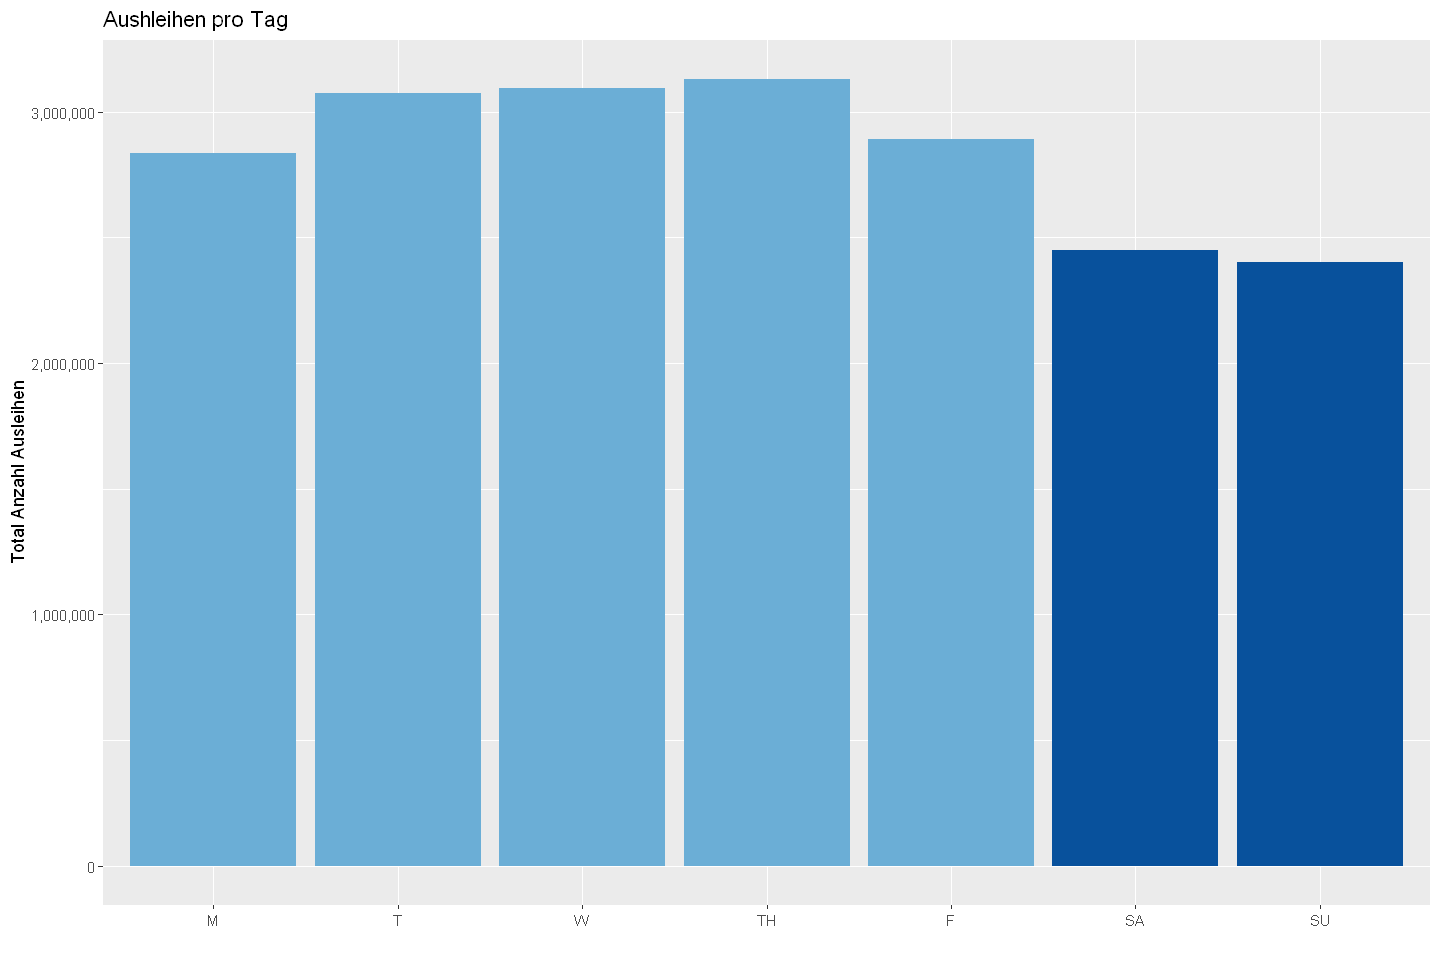

In [130]:
###   -----  Rentals by Workday ---- #####
wd = c("#6baed6", "#08519c")
b %>% group_by(day, Workday) %>%
  summarise(n = n(), rent = sum(Rentals)) %>%
  ggplot(aes(day, rent, fill = Workday)) + 
  geom_bar(stat = "identity", show.legend = F) +
  scale_fill_manual(values = wd) +
  labs(title = "Aushleihen pro Tag", x = "", y = "Total Anzahl Ausleihen") +
  scale_y_continuous(labels = comma)


## Vorhersagemodell

### Data preparation

In [157]:
bike_data <- read.csv('london_bereinigt_prediction.csv', header = TRUE, sep = ";")
#Datentypen von int in nummerisch umwandeln, um diese Werte später in Faktoren umzuwandeln

bike_data$season <- as.numeric(bike_data$season)
bike_data$yr <- as.numeric(bike_data$yr)
bike_data$cnt <- as.numeric(bike_data$cnt)
bike_data$month_nr <- as.numeric(bike_data$month_nr)
bike_data$hr <- as.numeric(bike_data$hr)
bike_data$weekdays_nr <- as.numeric(bike_data$weekdays_nr)
bike_data$weather_code <- as.numeric(bike_data$weather_code)
bike_data$is_holiday <- as.numeric(bike_data$is_holiday)
bike_data$is_weekend <- as.numeric(bike_data$is_weekend)



head(bike_data)

instant date     yr time     hr weekdays weekdays_nr month_nr cnt t1  t2 
1 1       04.01.15 0  00:00:00 0  Sonntag  7           1        182 3.0 2.0
2 2       04.01.15 0  01:00:00 1  Sonntag  7           1        138 3.0 2.5
3 3       04.01.15 0  02:00:00 2  Sonntag  7           1        134 2.5 2.5
4 4       04.01.15 0  03:00:00 3  Sonntag  7           1         72 2.0 2.0
5 5       04.01.15 0  04:00:00 4  Sonntag  7           1         47 2.0 0.0
6 6       04.01.15 0  05:00:00 5  Sonntag  7           1         46 2.0 2.0
  hum   wind_speed weather_code is_holiday is_weekend season
1  93.0 6.0        3            0          1          3     
2  93.0 5.0        1            0          1          3     
3  96.5 0.0        1            0          1          3     
4 100.0 0.0        1            0          1          3     
5  93.0 6.5        1            0          1          3     
6  93.0 4.0        1            0          1          3

In [159]:
#Datenset nach Jahr, Monat, Wochentag und Stunde gruppieren und Zusammenfassen
#detach(package:plyr)
bike_data_grouped <- bike_data %>% group_by(yr, month_nr, weekdays_nr, hr, is_holiday, is_weekend) %>% summarise(season = mean(season),
                                                                                                         weather_code = mean(weather_code), 
                                                                                                         t1 = mean(t1), 
                                                                                                         t2 = mean(t2), 
                                                                                                        hum = mean(hum), 
                                                                                                         wind_speed = mean(wind_speed), 
                                                                                                         cnt = mean(cnt))

head(bike_data_grouped)

`summarise()` has grouped output by 'yr', 'month_nr', 'weekdays_nr', 'hr',
'is_holiday'. You can override using the `.groups` argument.


yr month_nr weekdays_nr hr is_holiday is_weekend season weather_code t1   
1 0  1        1           0  0          0          3      3.00         5.250
2 0  1        1           1  0          0          3      3.50         5.750
3 0  1        1           2  0          0          3      3.50         6.250
4 0  1        1           3  0          0          3      3.25         6.375
5 0  1        1           4  0          0          3      3.25         6.500
6 0  1        1           5  0          0          3      3.25         6.625
  t2    hum    wind_speed cnt   
1 2.500 85.375 15.500     110.75
2 3.125 83.250 16.250      60.75
3 4.250 82.875 15.750      31.25
4 4.125 82.750 15.250      30.75
5 4.250 82.750 15.500      36.75
6 4.375 82.875 15.875      85.75

In [160]:
#Diskrete Werte runden auf ganze Zahlen. (Durch das Gruppieren und Berechnen des Mittelwerts sind Kommastellen entstanden)
bike_data_grouped$season <- round(bike_data_grouped$season, digits=0)
bike_data_grouped$weather_code <- round(bike_data_grouped$weather_code, digits=0)

In [161]:
#Kategorische Variabeln in Faktor umwandeln
bike_data_grouped$season <-as.factor(bike_data_grouped$season)
bike_data_grouped$yr <-as.factor(bike_data_grouped$yr)
bike_data_grouped$month_nr <-as.factor(bike_data_grouped$month_nr)
bike_data_grouped$hr <-as.factor(bike_data_grouped$hr)
bike_data_grouped$weekdays_nr <-as.factor(bike_data_grouped$weekdays_nr)
bike_data_grouped$weather_code <-as.factor(bike_data_grouped$weather_code)

head(bike_data_grouped)


yr month_nr weekdays_nr hr is_holiday is_weekend season weather_code t1   
1 0  1        1           0  0          0          3      3            5.250
2 0  1        1           1  0          0          3      4            5.750
3 0  1        1           2  0          0          3      4            6.250
4 0  1        1           3  0          0          3      3            6.375
5 0  1        1           4  0          0          3      3            6.500
6 0  1        1           5  0          0          3      3            6.625
  t2    hum    wind_speed cnt   
1 2.500 85.375 15.500     110.75
2 3.125 83.250 16.250      60.75
3 4.250 82.875 15.750      31.25
4 4.125 82.750 15.250      30.75
5 4.250 82.750 15.500      36.75
6 4.375 82.875 15.875      85.75

In [162]:
#Modeling Dropping columns
bike_data_grouped <- bike_data_grouped[c(-1,-6)]
head(bike_data_grouped)

month_nr weekdays_nr hr is_holiday season weather_code t1    t2    hum   
1 1        1           0  0          3      3            5.250 2.500 85.375
2 1        1           1  0          3      4            5.750 3.125 83.250
3 1        1           2  0          3      4            6.250 4.250 82.875
4 1        1           3  0          3      3            6.375 4.125 82.750
5 1        1           4  0          3      3            6.500 4.250 82.750
6 1        1           5  0          3      3            6.625 4.375 82.875
  wind_speed cnt   
1 15.500     110.75
2 16.250      60.75
3 15.750      31.25
4 15.250      30.75
5 15.500      36.75
6 15.875      85.75

In [7]:
#Aufteilen der Daten in Trainings- und Testdaten
#set.seed(101)
#sample <- sample.int(n = nrow(bike_data_grouped), size = floor(0.8 * nrow(bike_data_grouped)), replace = F)

#Trainingsdatensatz erstellen
#bike_train <- bike_data_grouped[ sample, ]

#Testdatensatz erstellen
#bike_test <- bike_data_grouped[ -sample, ]

In [278]:
#Modifikationen für weitere Analysen

##Analyse für Wochenende
bike_data_weekend<-bike_data_grouped
bike_data_weekend<-bike_data_weekend[!(bike_data_weekend$weekdays_nr=="1" | bike_data_weekend$weekdays_nr=="2" | bike_data_weekend$weekdays_nr=="3" | bike_data_weekend$weekdays_nr=="4" | bike_data_weekend$weekdays_nr=="5"),]
bike_data_weekend<-bike_data_weekend[!(bike_data_weekend$weather_code=="7"),]

##Analyse für Workingdays
bike_data_workingdays<-bike_data_grouped
bike_data_workingdays<-bike_data_workingdays[!(bike_data_workingdays$weekdays_nr=="6" | bike_data_workingdays$weekdays_nr=="7"),]


##Analyse ohne Outliners
#find Q1, Q3, and interquartile range for values in column cnt
Q1 <- quantile(bike_data_grouped$cnt, .25)
Q3 <- quantile(bike_data_grouped$cnt, .75)
IQR <- IQR(bike_data_grouped$cnt)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
no_outliers <- subset(bike_data_grouped, bike_data_grouped$cnt> (Q1 - 1.5*IQR) & bike_data_grouped$cnt< (Q3 + 1.5*IQR))



#### Alle Daten Modell

In [166]:
library(rpart)
library(Metrics)
library(caTools)


In [216]:
#Splitting data
library(caTools)
set.seed(123)


split = sample.split(bike_data_grouped$cnt, SplitRatio = 0.8)
bike_train = subset(bike_data_grouped, split == TRUE)
bike_test = subset(bike_data_grouped, split == FALSE)


In [217]:
#Multilinear regression
multi = lm(formula = cnt ~ ., data = bike_train)

#Predicting the test values
y_pred_m = predict(multi, newdata = bike_test) 


library(Metrics)

mae_m = mae(bike_test[[9]], y_pred_m)
rmse_m = rmse(bike_test[[9]], y_pred_m)

cat("MAE_m:\n",mae_m,"\n") 
cat("\n")
cat("RMSE_m:\n",rmse_m)

Warning message in predict.lm(multi, newdata = bike_test):
“prediction from a rank-deficient fit may be misleading”


MAE_m:
 1064.699 

RMSE_m:
 1359.998

In [168]:
print(multi)


Call:
lm(formula = cnt ~ ., data = bike_train)

Coefficients:
  (Intercept)      month_nr2      month_nr3      month_nr4      month_nr5  
    1048.4095        -9.5444       -54.6637       -59.2728       -81.2326  
    month_nr6      month_nr7      month_nr8      month_nr9     month_nr10  
    -180.2504      -258.3604      -296.3289      -157.5046        40.9439  
   month_nr11     month_nr12   weekdays_nr2   weekdays_nr3   weekdays_nr4  
      -0.8529       -29.9859        80.0991        72.6369        63.1732  
 weekdays_nr5   weekdays_nr6   weekdays_nr7            hr1            hr2  
      29.6625      -150.5351      -188.2475       -40.1133       -99.1687  
          hr3            hr4            hr5            hr6            hr7  
    -121.1501      -132.4874       -87.9282       255.7677      1180.0645  
          hr8            hr9           hr10           hr11           hr12  
    2402.7879      1176.9463       536.9365       511.2269       765.9412  
         hr13           h

In [218]:
#Multilinear regression // Hier werden die einzelnen Gemessenen Prameter manuel angegeben.
library(Metrics)

mu_bike <- lm(cnt ~ weather_code + wind_speed+ t1 + hum + is_holiday , data=bike_train)
#summary(mu_bike)

#Predicting the test values
y_pred_m = predict(mu_bike, newdata = bike_test)

mae_m = mae(bike_test[[9]], y_pred_m)
rmse_m = rmse(bike_test[[9]], y_pred_m)

cat("mae_m:\n",mae_m,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_m)

mae_m:
 1028.93 

rmse_m:
 1180.627

In [170]:
print(mu_bike)


Call:
lm(formula = cnt ~ weather_code + wind_speed + t1 + hum + is_holiday, 
    data = bike_train)

Coefficients:
  (Intercept)  weather_code2  weather_code3  weather_code4  weather_code5  
     3428.549        181.802        170.445         88.814        218.447  
weather_code7     wind_speed             t1            hum     is_holiday  
      219.421         -1.551         35.565        -39.382       -148.156  



In [219]:
#Decision tree
library(rpart)

dt = rpart(formula = cnt ~ ., data = bike_train, control = rpart.control(minsplit = 3))

#Predicting the test values
y_pred_dt = predict(dt, newdata = bike_test)

#Performance metrics
mae_dt = mae(bike_test[[9]], y_pred_dt)
rmse_dt = rmse(bike_test[[9]], y_pred_dt)

cat("mae_m:\n",mae_dt,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_dt)

mae_m:
 1002.959 

rmse_m:
 1359.038

In [172]:
print(dt)

n= 3532 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 3532 3792281000 1120.1860  
   2) hr=0,1,2,3,4,5,6,10,11,20,21,22,23 1898  365969300  487.5897  
     4) hr=0,1,2,3,4,5,6,22,23 1309   69370130  264.0656 *
     5) hr=10,11,20,21 589   85848290  984.3522 *
   3) hr=7,8,9,12,13,14,15,16,17,18,19 1634 1784518000 1854.9890  
     6) hr=7,9,12,13,14,15,16,19 1190  548872600 1546.1770  
      12) month_nr=1,2,3,11,12 526  123692800 1182.7520 *
      13) month_nr=4,5,6,7,8,9,10 664  300672700 1834.0710 *
     7) hr=8,17,18 444  818003100 2682.6620  
      14) weekdays_nr=6,7 115   98499480 1269.7960  
        28) hum>=61.0625 79   16210030  727.6998 *
        29) hum< 61.0625 36    8128528 2459.3960 *
      15) weekdays_nr=1,2,3,4,5 329  409699800 3176.5200  
        30) is_holiday>=0.5 35   23805730  876.4286 *
        31) is_holiday< 0.5 294  178685900 3450.3410  
          62) month_nr=1,2,3,11,12 122   46815060 2828.3610 *
          63) month_nr=4,5,6,7,8,9

In [284]:
#Random forest
library(randomForest)

set.seed(123)
rf = randomForest(formula = cnt ~ ., data = bike_train, ntree = 58)

#Predicting the test values
y_pred_rf = predict(rf, newdata = bike_test)


#Performance metrics
mae_rf = mae(bike_test[[9]], y_pred_rf)
rmse_rf = rmse(bike_test[[9]], y_pred_rf)

cat("mae_m:\n",mae_rf,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_rf)

mae_m:
 910.8045 

rmse_m:
 1162.487

In [285]:
print(rf)


Call:
 randomForest(formula = cnt ~ ., data = bike_train, ntree = 58) 
               Type of random forest: regression
                     Number of trees: 58
No. of variables tried at each split: 3

          Mean of squared residuals: 81283.52
                    % Var explained: 89.13


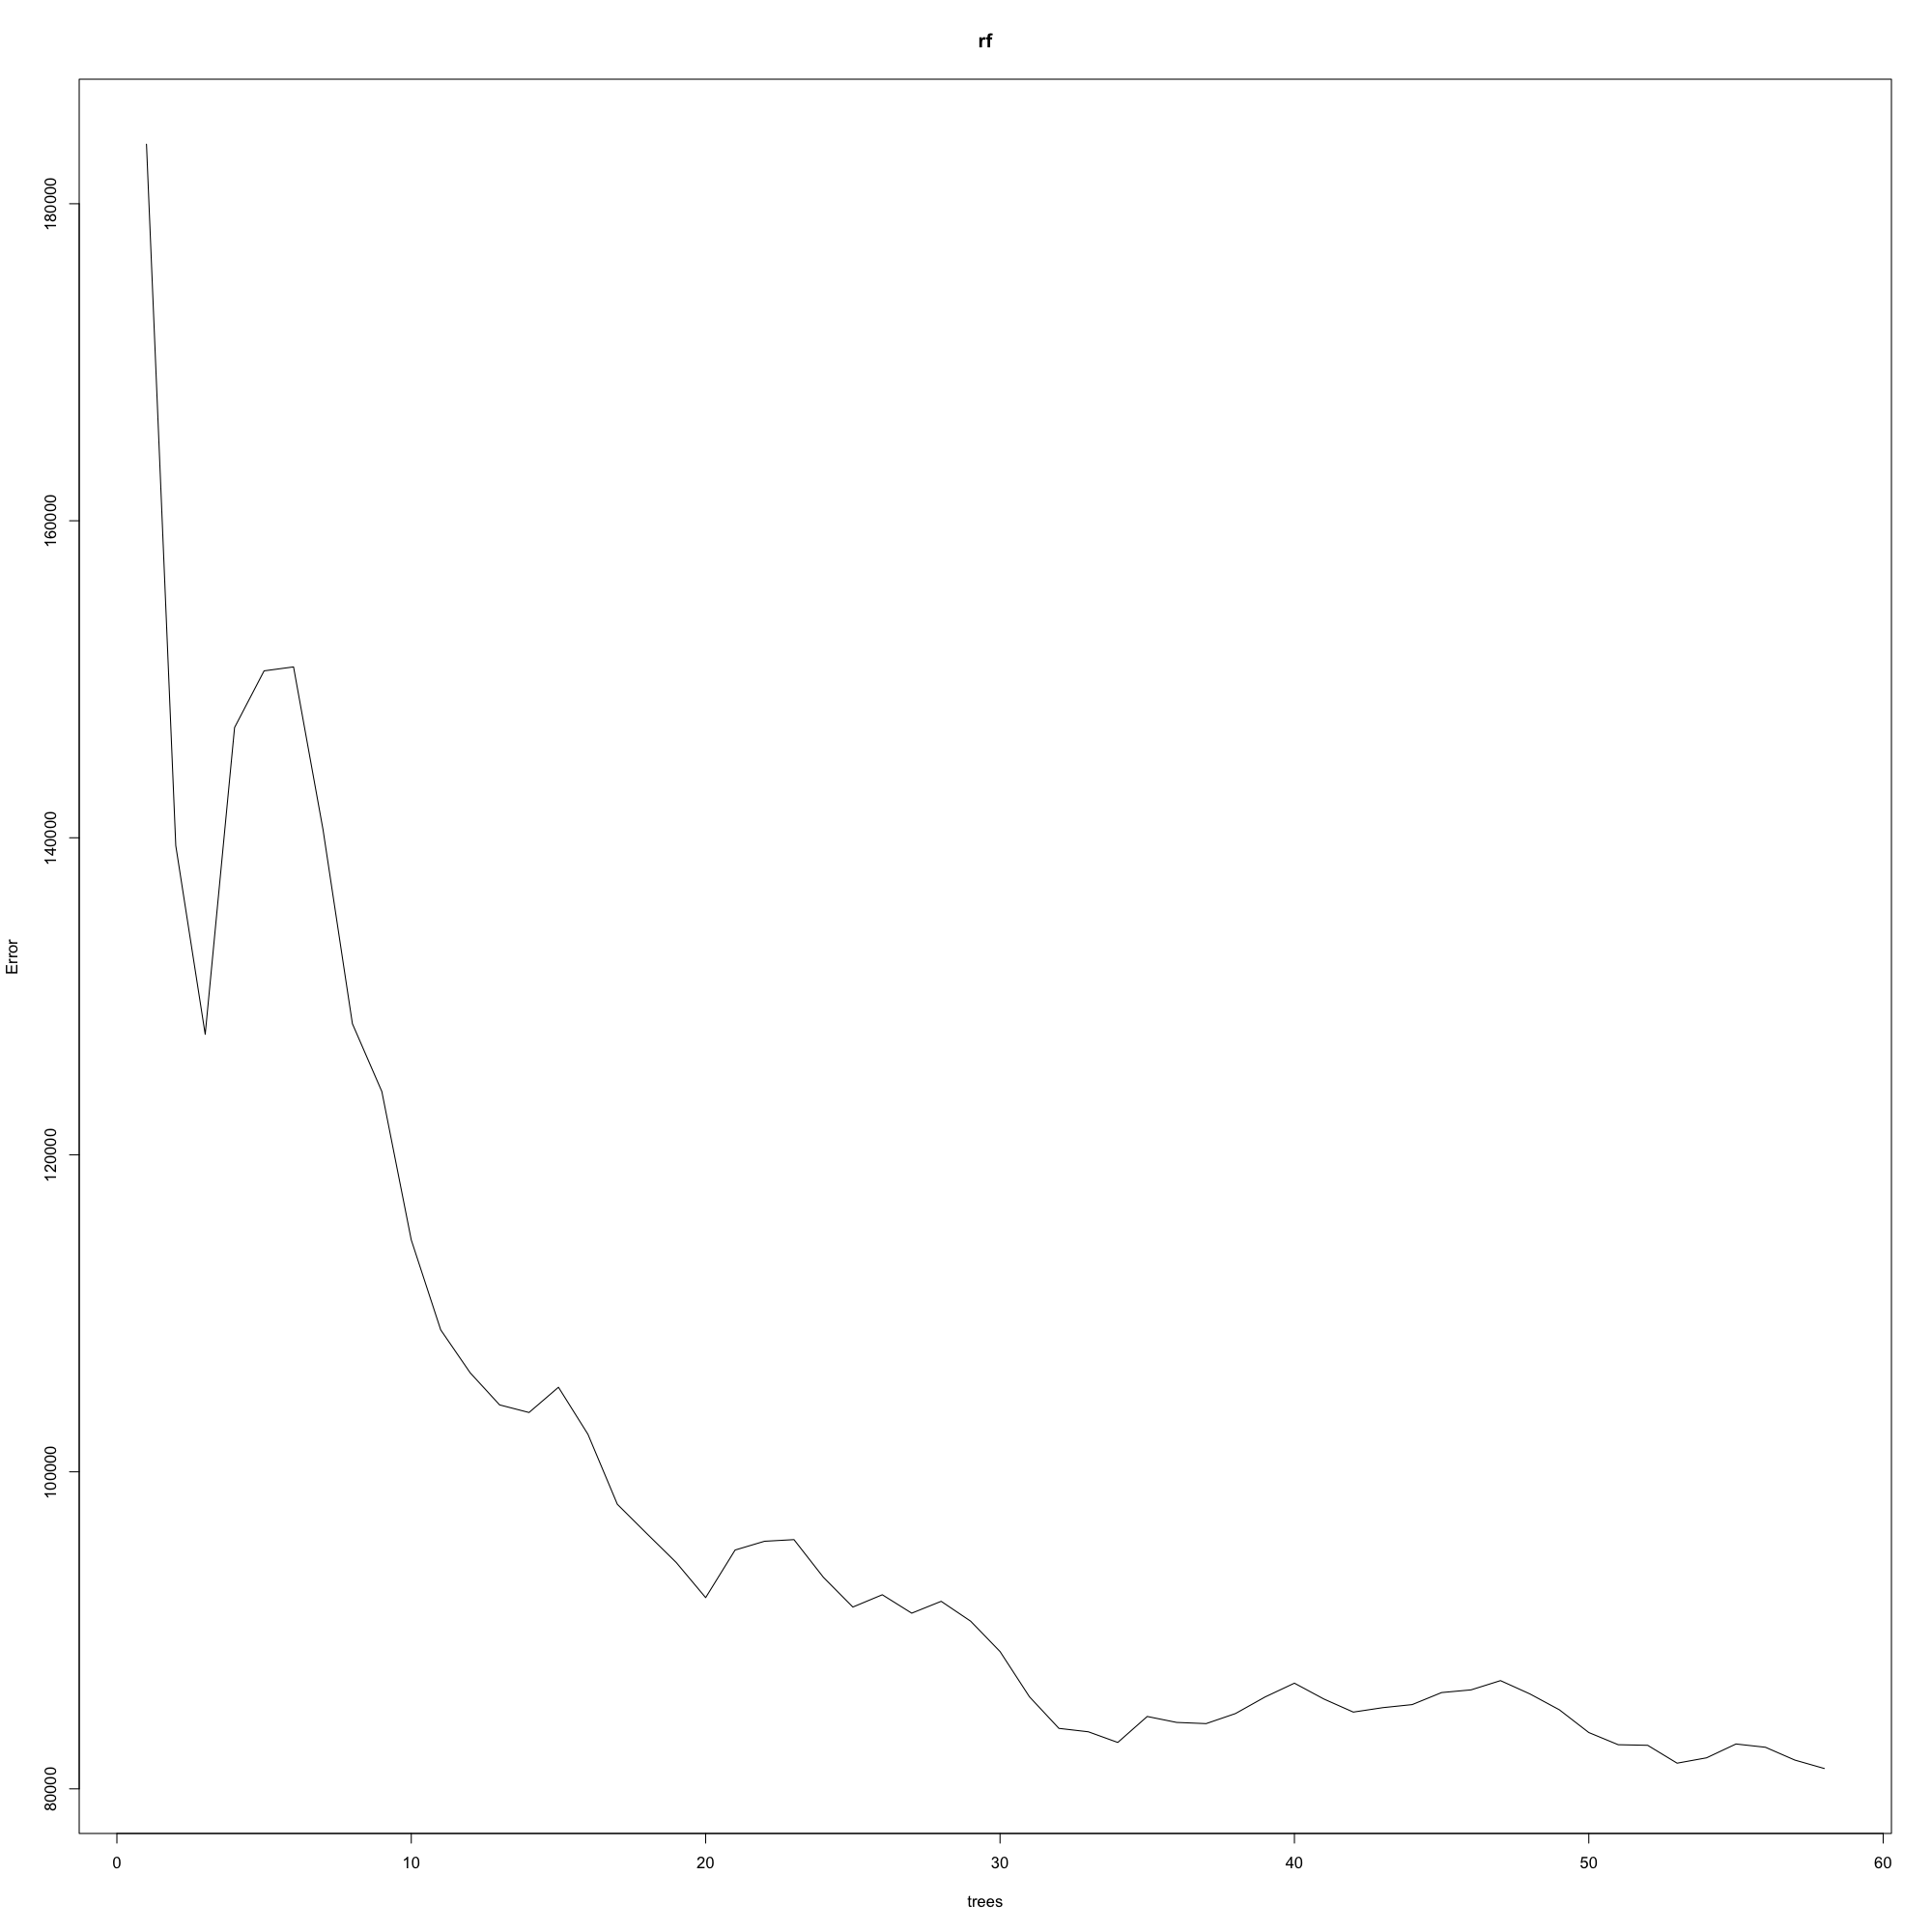

In [286]:
plot(rf)

In [176]:
head(y_pred_rf)

1          2          3          4          5          6 
  87.06037  102.43105 1360.68066  791.80266  860.04295 1257.32267

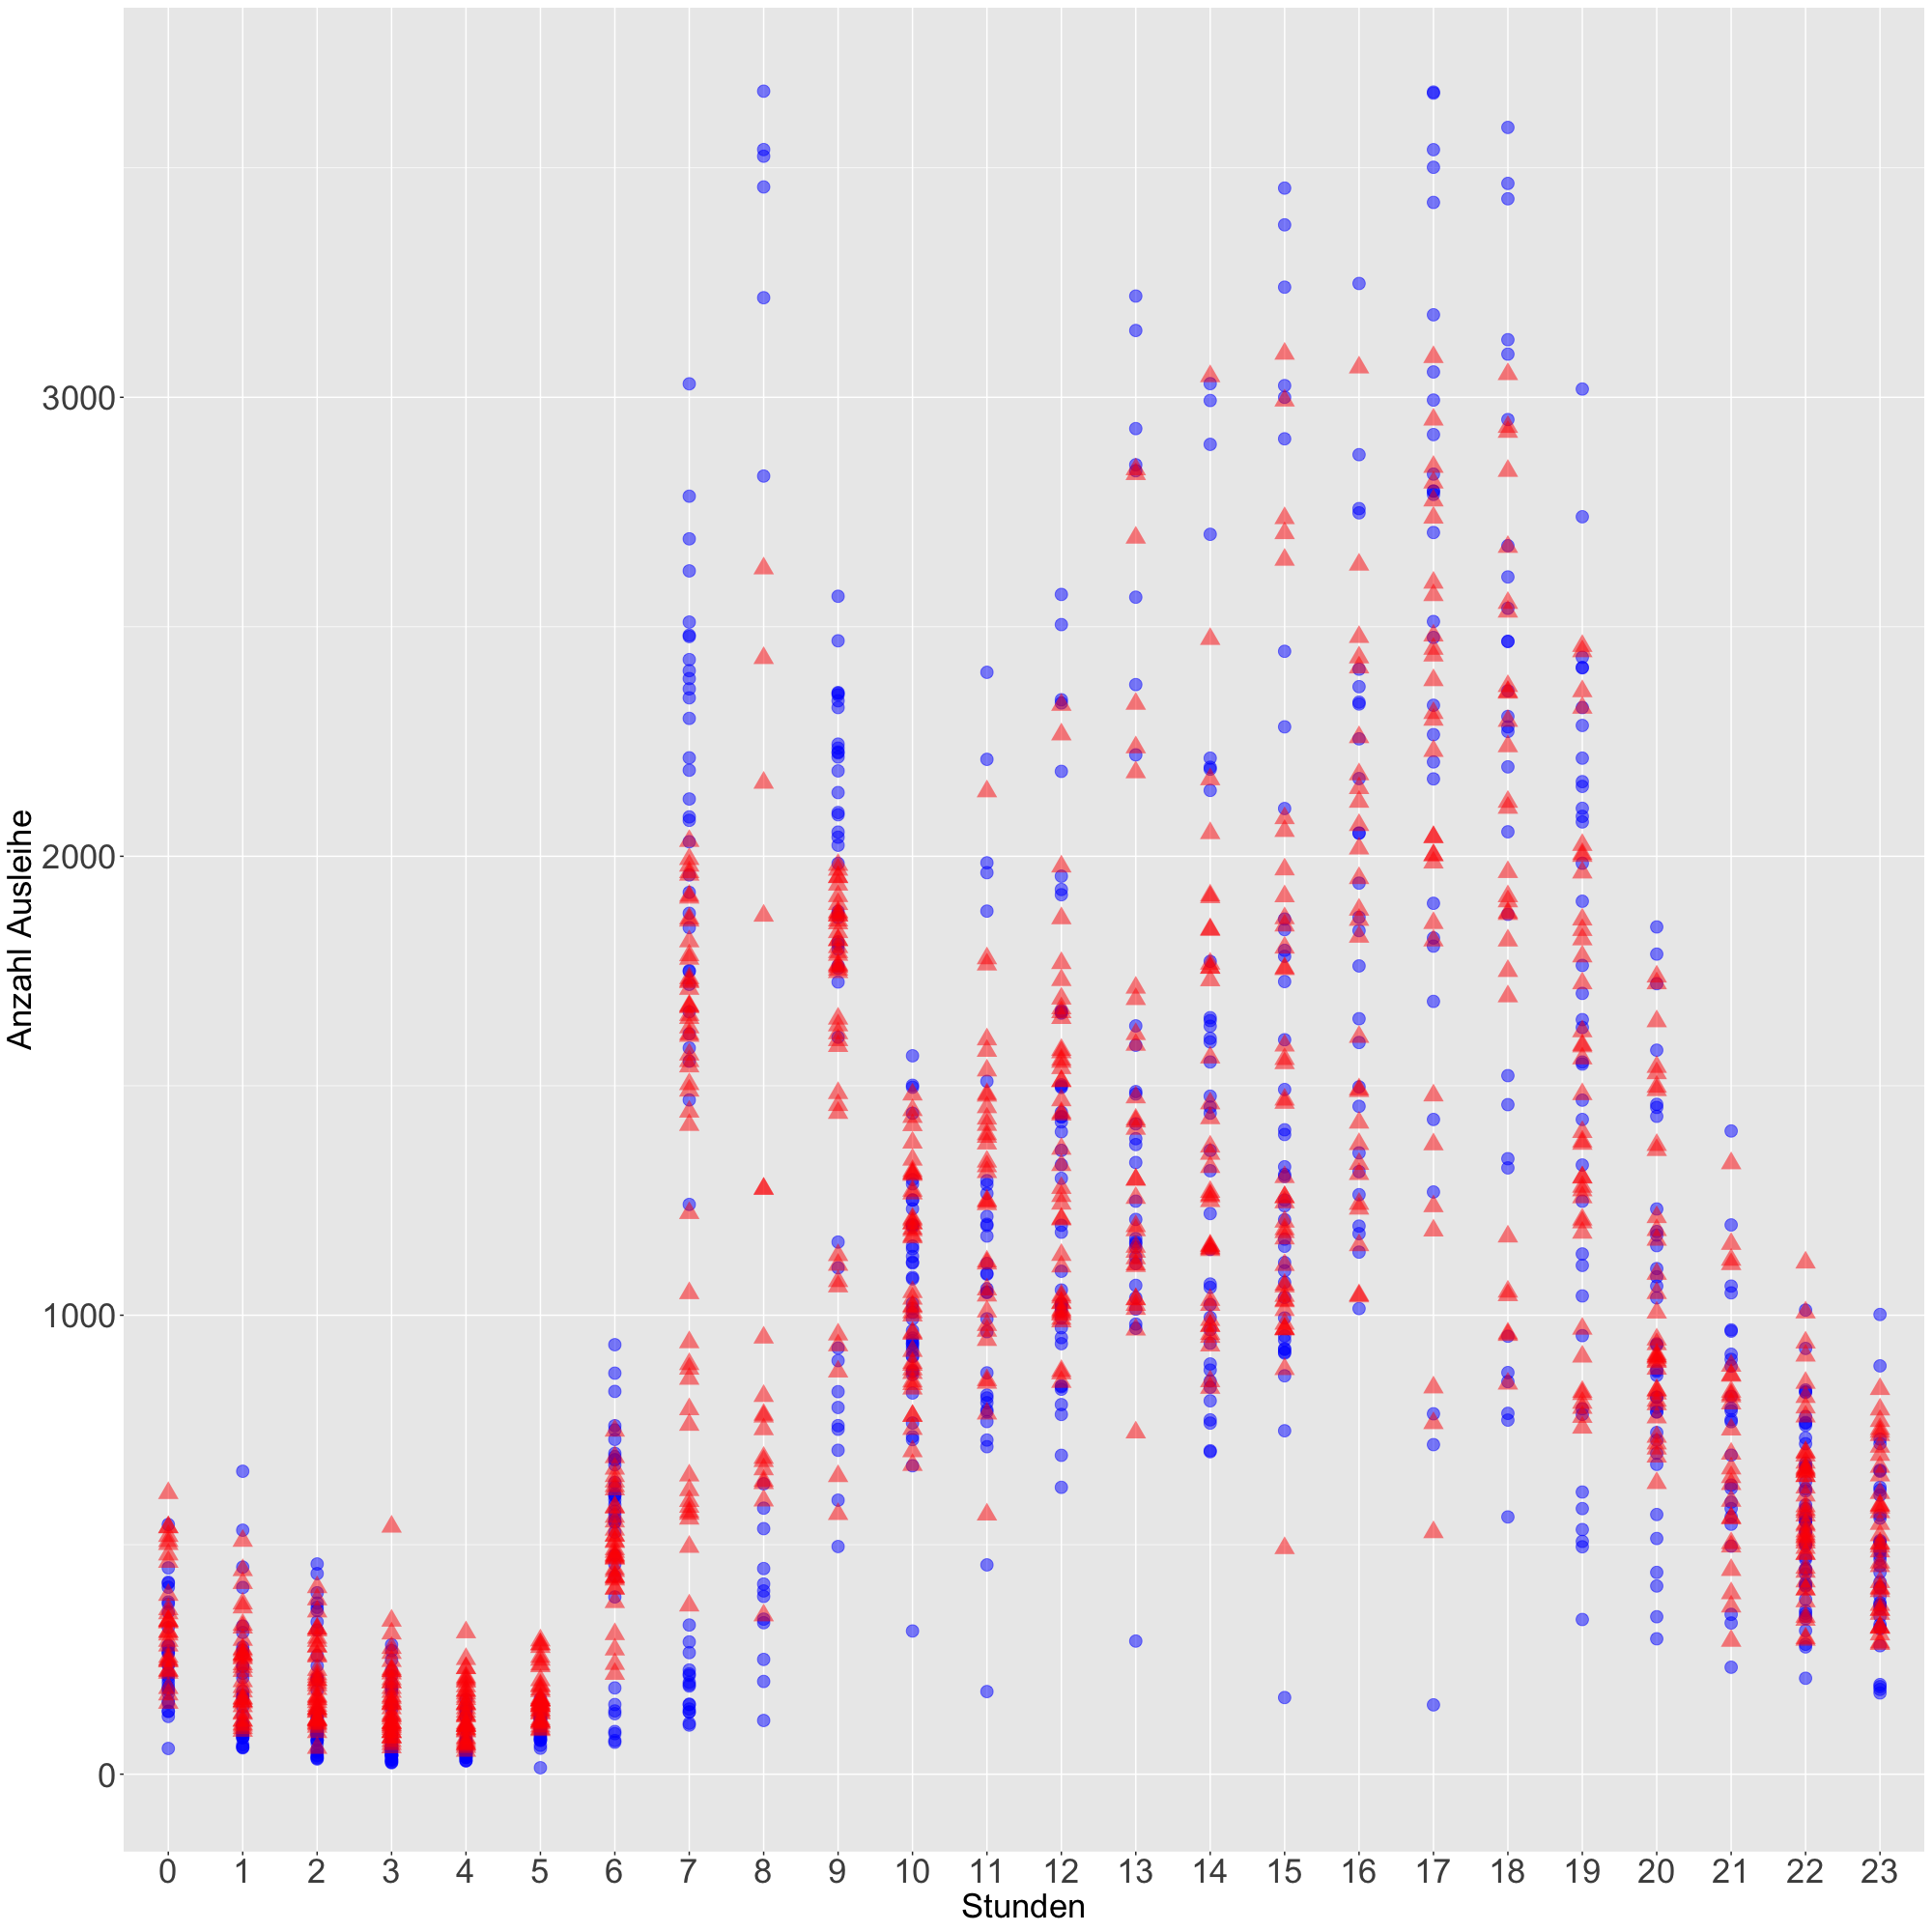

In [287]:
# Build scatterplot

A = data.frame(x = bike_test$hr,y=bike_test$cnt)
B = data.frame(x = bike_test$hr,y=y_pred_rf)

g<-ggplot(A, aes(x,y)) + 
    geom_point(color = 'blue', alpha = 0.5, size= 4) + 
    geom_point(data= B, color = 'red',  alpha = 0.5, size= 5, shape=17) + 
    labs(x = "Stunden", y = "Anzahl Ausleihe", color = "", 'Transperency', size= 25)



#Aussehen Editing
g + theme(axis.text=element_text(size=25),
            axis.title=element_text(size=25))

 


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)








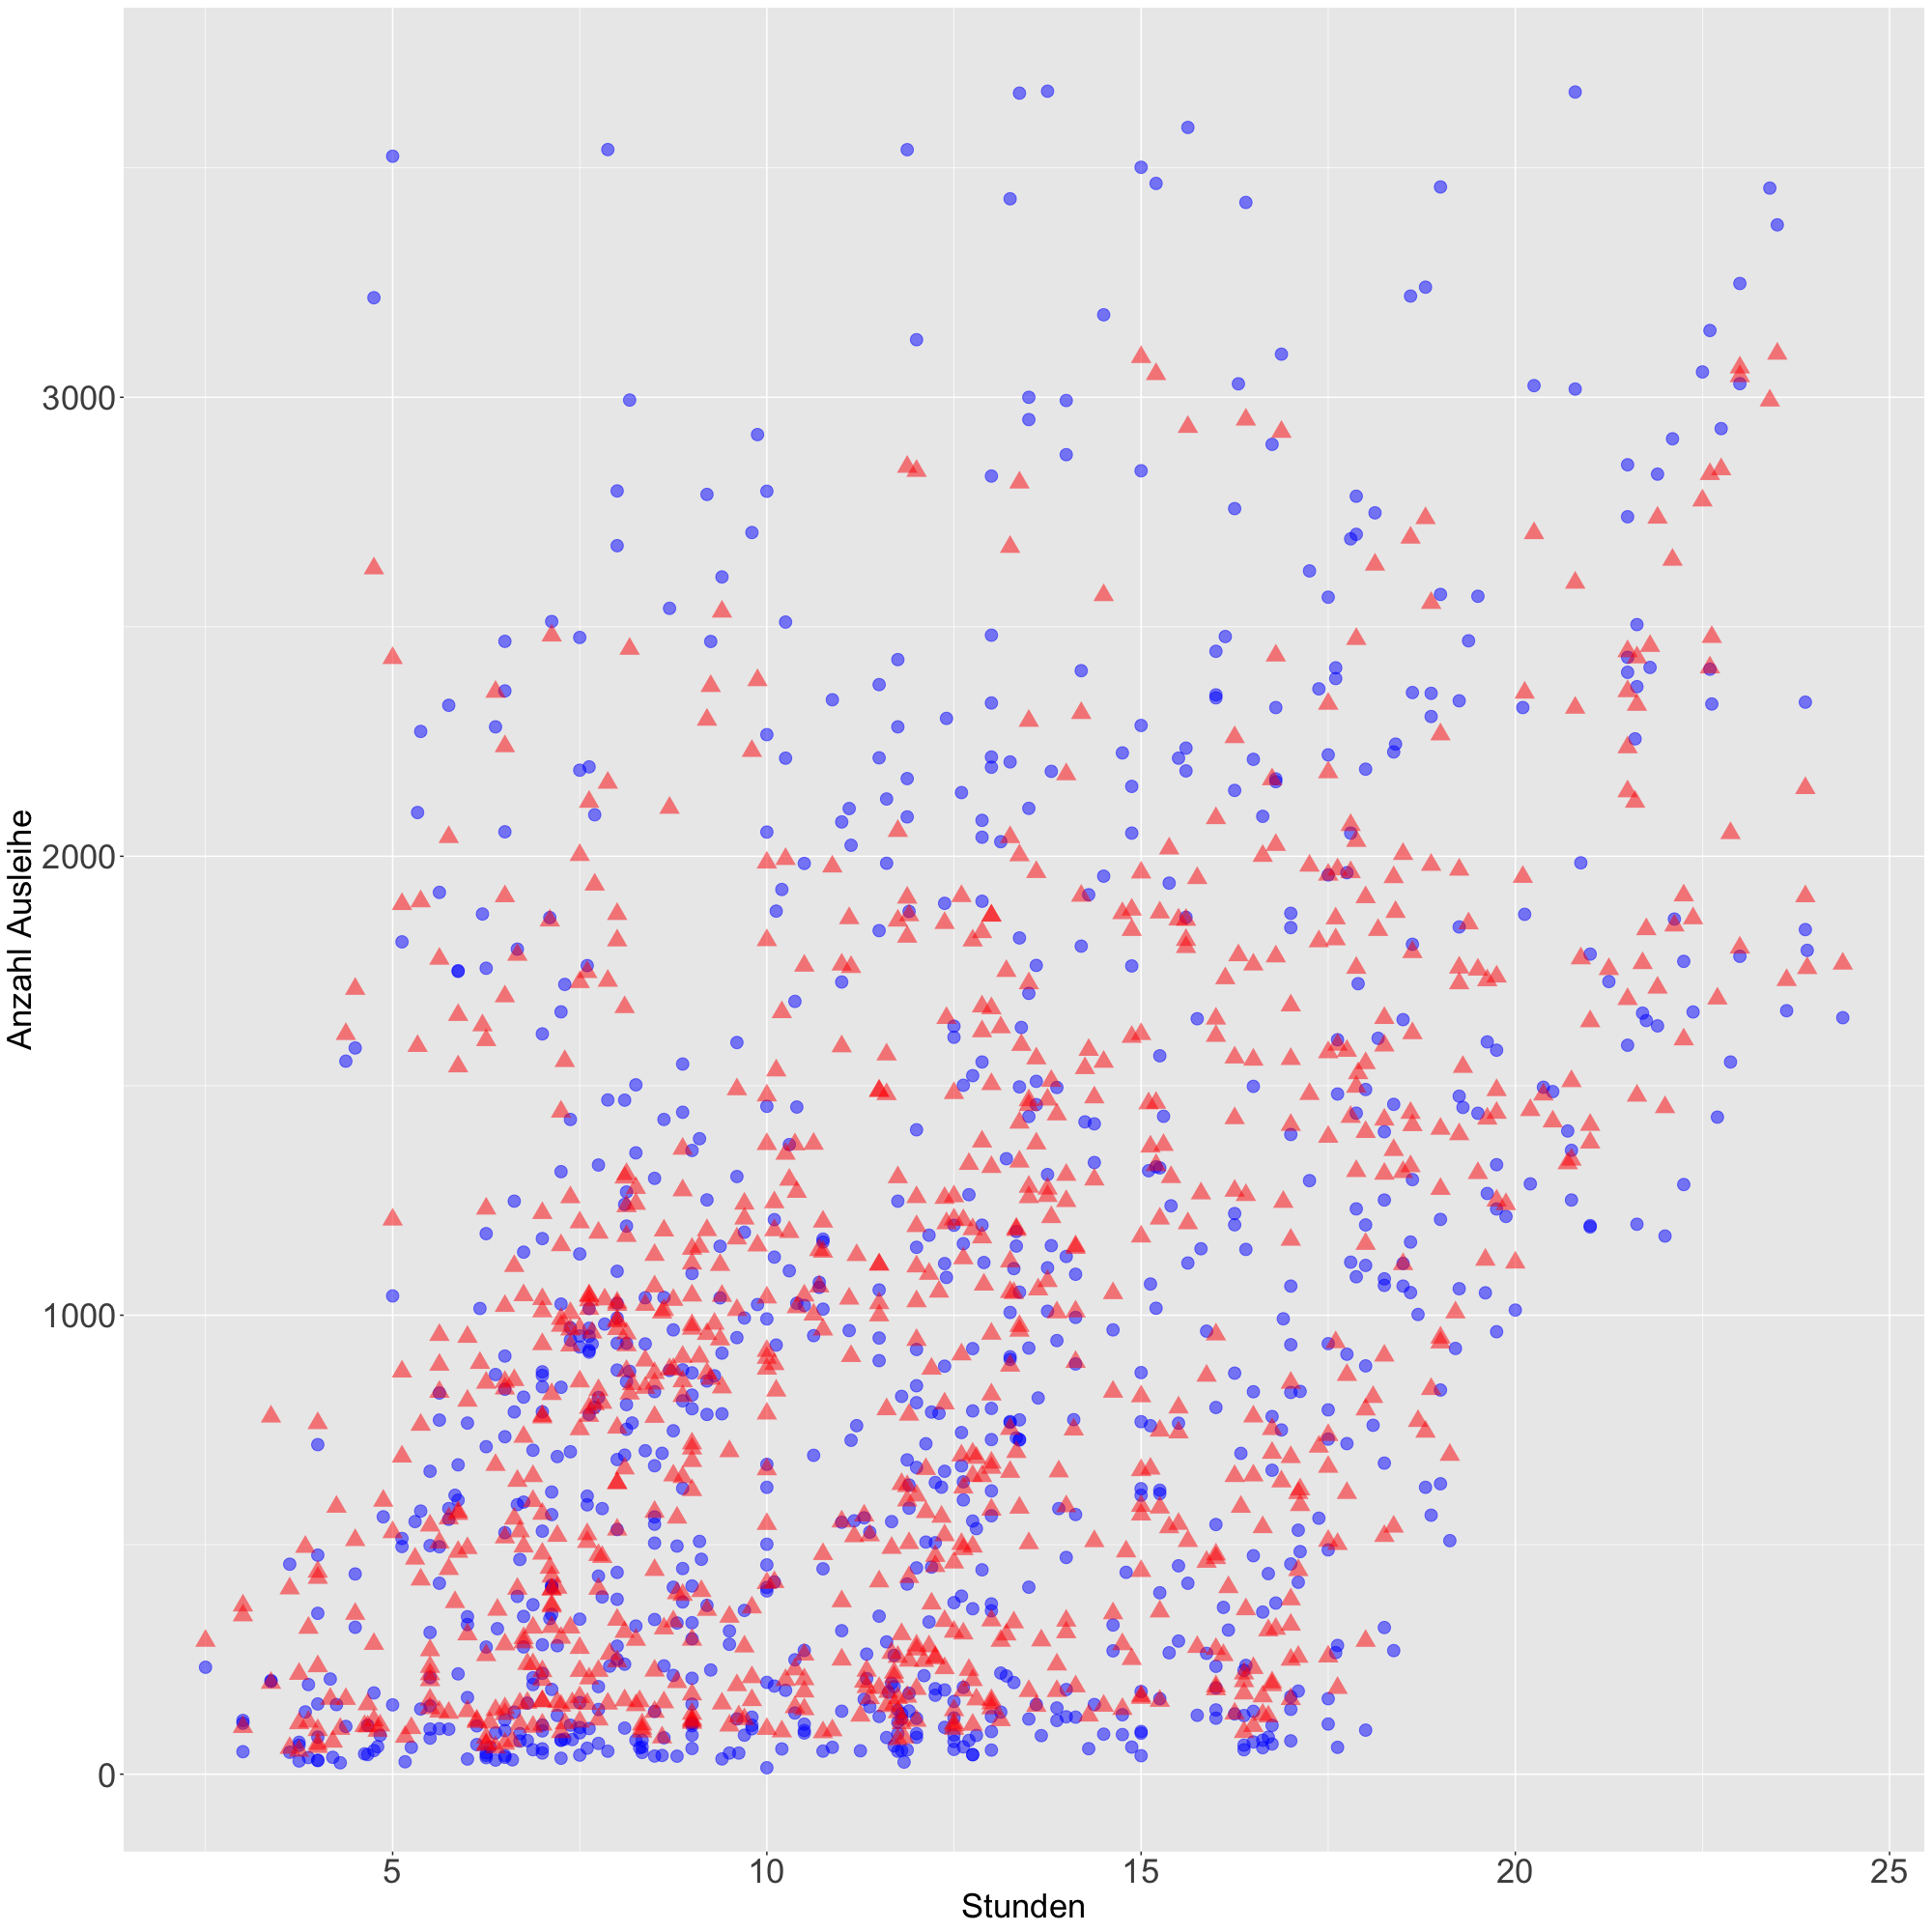

In [288]:
# Build scatterplot

A = data.frame(x = bike_test$t1,y=bike_test$cnt)
B = data.frame(x = bike_test$t1,y=y_pred_rf)

g<-ggplot(A, aes(x,y)) + 
    geom_point(color = 'blue', alpha = 0.5, size= 4) + 
    geom_point(data= B, color = 'red',  alpha = 0.5, size= 5, shape=17) + 
    labs(x = "Stunden", y = "Anzahl Ausleihe", color = "", 'Transperency', size= 25)



#Aussehen Editing
g + theme(axis.text=element_text(size=25),
            axis.title=element_text(size=25))

 


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

### Nur Daten des Weekends untersucht

In [289]:
#Splitting data
library(caTools)
set.seed(123)


split = sample.split(bike_data_weekend$cnt, SplitRatio = 0.8)
bike_train_weekend = subset(bike_data_weekend, split == TRUE)
bike_test_weekend = subset(bike_data_weekend, split == FALSE)

In [294]:
#Random forest
library(randomForest)

set.seed(123)
rf = randomForest(formula = cnt ~ ., data = bike_train_weekend, ntree = 58)

#Predicting the test values
y_pred_rf = predict(rf, newdata = bike_test_weekend)


#Performance metrics
mae_rf = mae(bike_test_weekend[[9]], y_pred_rf)
rmse_rf = rmse(bike_test_weekend[[9]], y_pred_rf)

cat("mae_m:\n",mae_rf,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_rf)

mae_m:
 902.237 

rmse_m:
 1194.906

In [295]:
print(rf)


Call:
 randomForest(formula = cnt ~ ., data = bike_train_weekend, ntree = 58) 
               Type of random forest: regression
                     Number of trees: 58
No. of variables tried at each split: 3

          Mean of squared residuals: 26293.22
                    % Var explained: 96.47


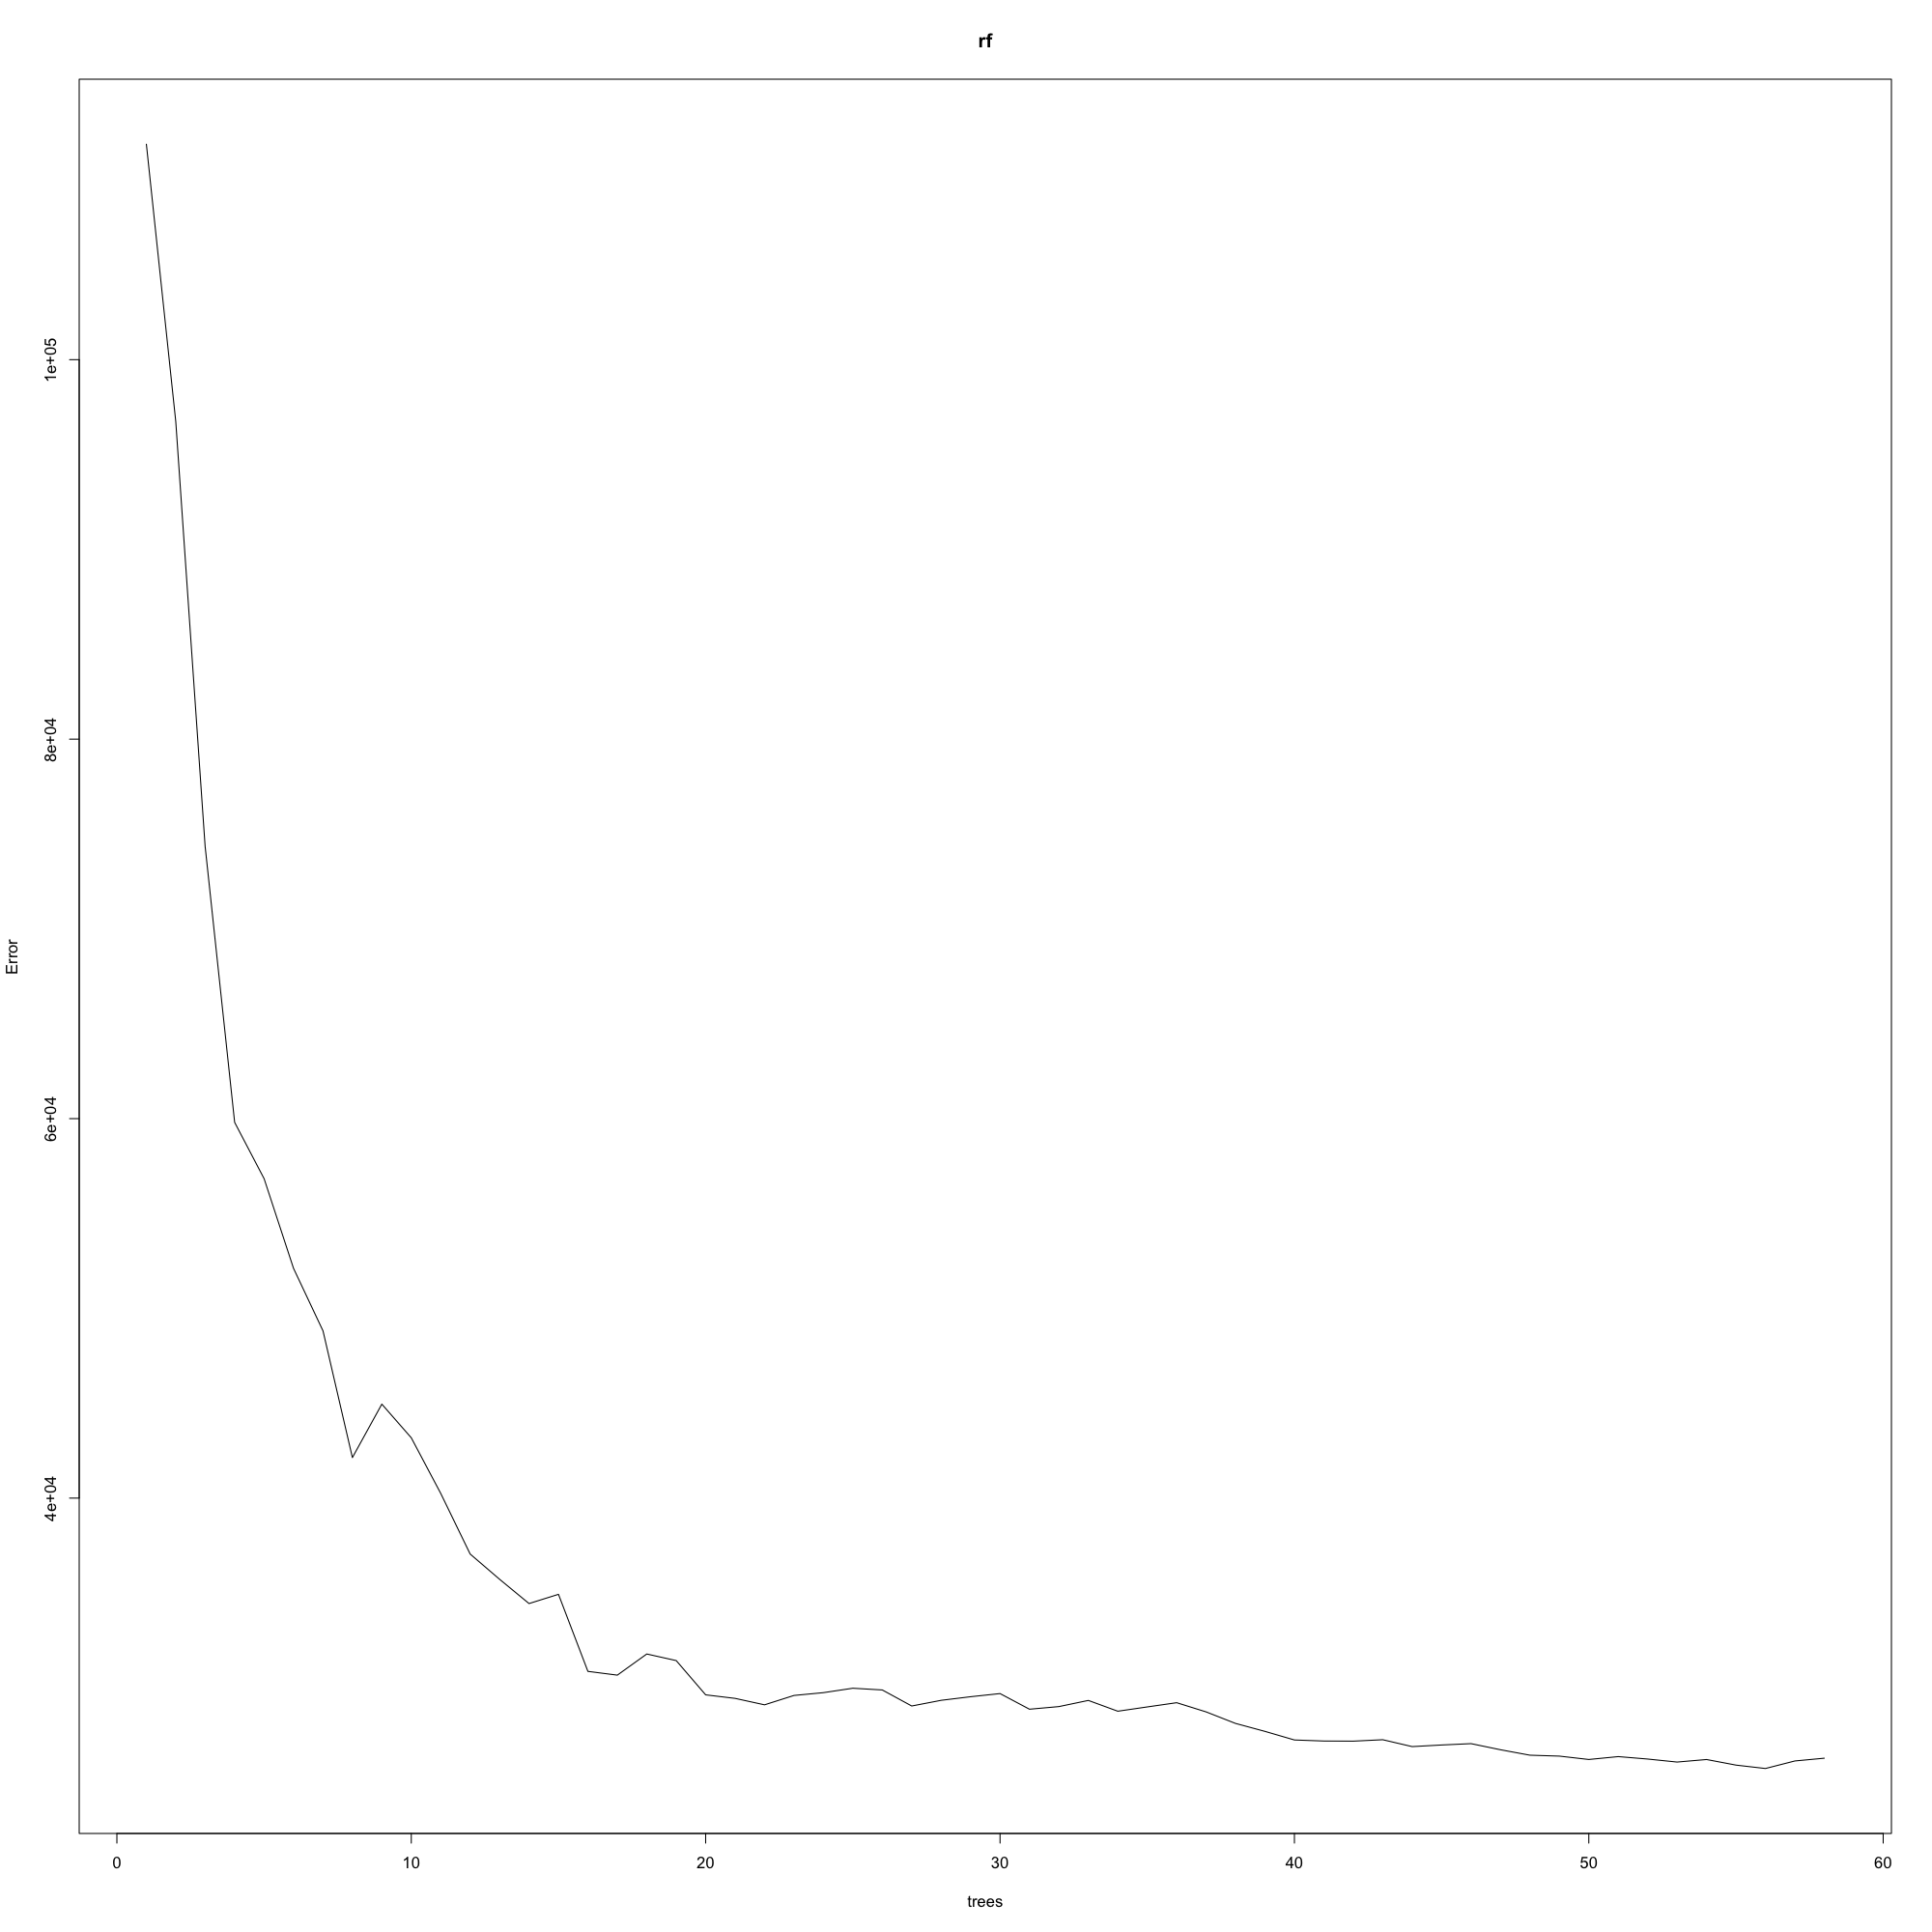

In [296]:
plot(rf)

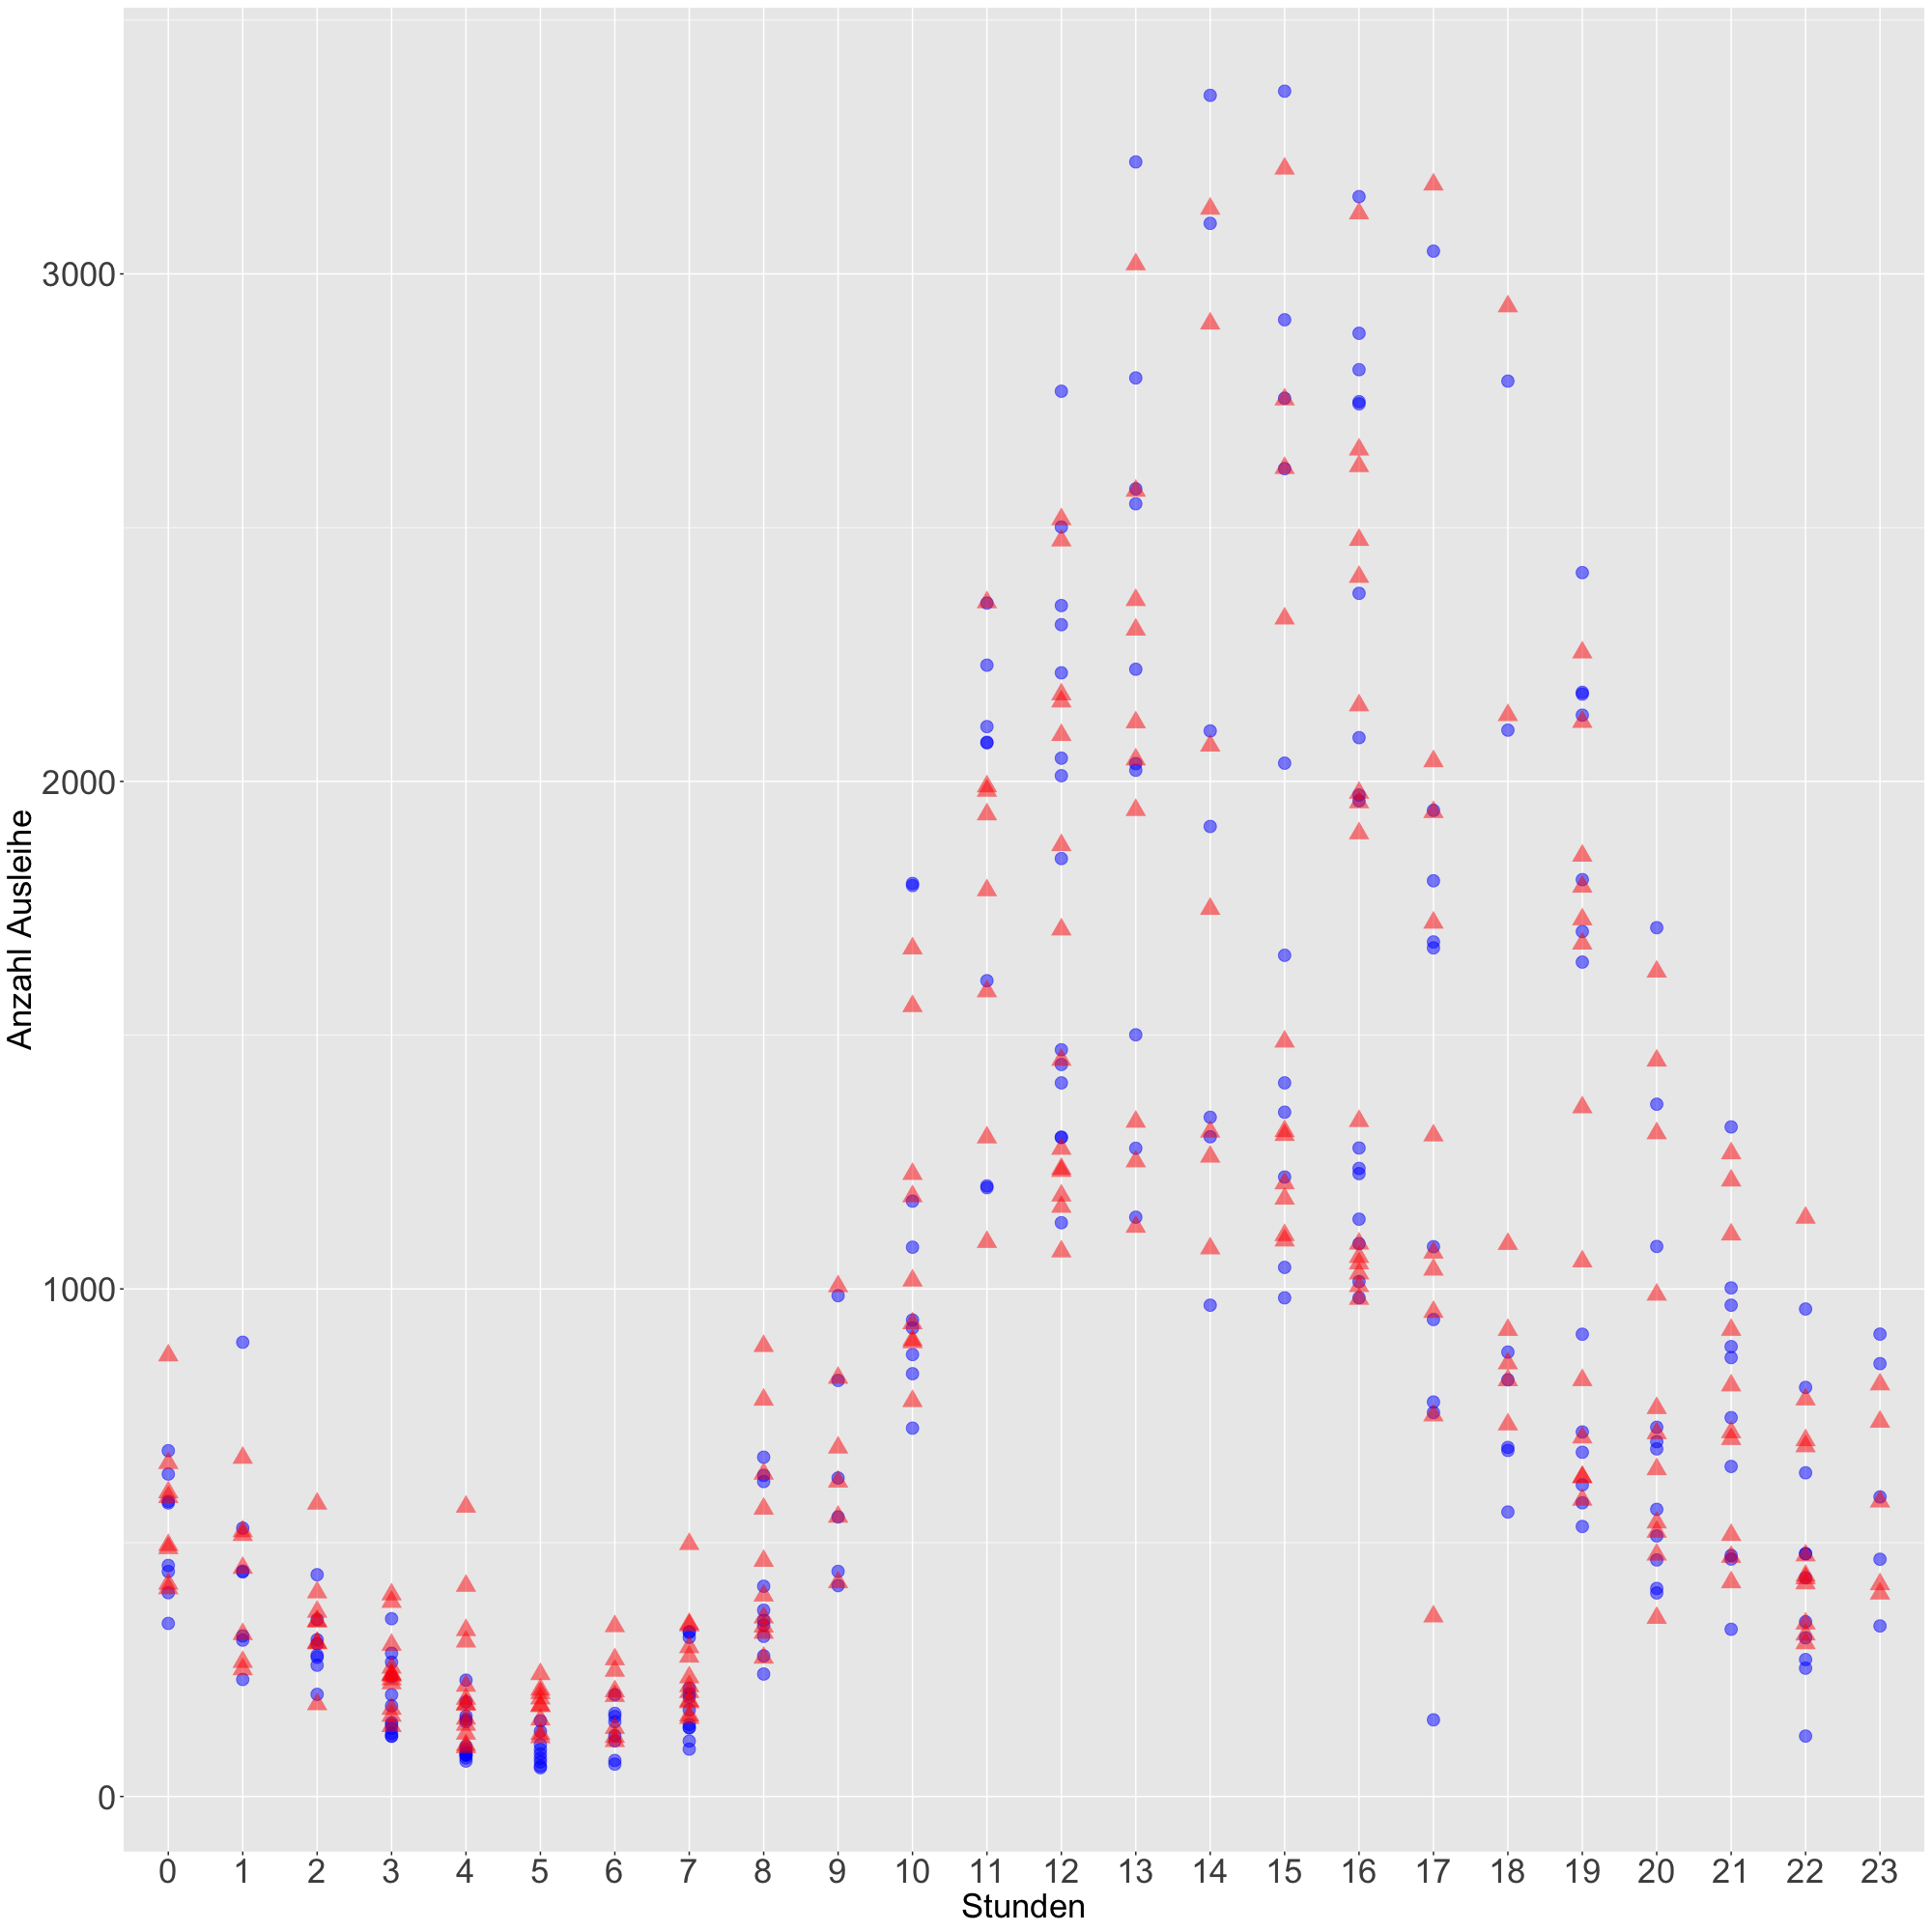

In [298]:
# Build scatterplot

A = data.frame(x = bike_test_weekend$hr,y=bike_test_weekend$cnt)
B = data.frame(x = bike_test_weekend$hr,y=y_pred_rf)

g<-ggplot(A, aes(x,y)) + 
    geom_point(color = 'blue', alpha = 0.5, size= 4) + 
    geom_point(data= B, color = 'red',  alpha = 0.5, size= 5, shape=17) + 
    labs(x = "Stunden", y = "Anzahl Ausleihe", color = "", 'Transperency', size= 25)



#Aussehen Editing
g + theme(axis.text=element_text(size=25),
            axis.title=element_text(size=25))

 


options(repr.plot.width = 20, repr.plot.height = 20, repr.plot.res = 100)

#### keine Outliners für ganzen Datensets

In [300]:
#Splitting data
library(caTools)
set.seed(123)


split = sample.split(no_outliers$cnt, SplitRatio = 0.8)
bike_train_o = subset(no_outliers, split == TRUE)
bike_test_o = subset(no_outliers, split == FALSE)

In [301]:
#Random forest
library(randomForest)

set.seed(123)
rf = randomForest(formula = cnt ~ ., data = bike_train_o, ntree = 58)

#Predicting the test values
y_pred_rf = predict(rf, newdata = bike_test_o)


#Performance metrics
mae_rf = mae(bike_test_o[[9]], y_pred_rf)
rmse_rf = rmse(bike_test_o[[9]], y_pred_rf)

cat("mae_m:\n",mae_rf,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_rf)

mae_m:
 910.8045 

rmse_m:
 1162.487

In [302]:
print(rf)


Call:
 randomForest(formula = cnt ~ ., data = bike_train_o, ntree = 58) 
               Type of random forest: regression
                     Number of trees: 58
No. of variables tried at each split: 3

          Mean of squared residuals: 81283.52
                    % Var explained: 89.13


### Datenset nur unter der Woche

In [303]:
library(rpart)
library(Metrics)
library(caTools)



In [304]:
#Splitting data
library(caTools)
set.seed(123)


split = sample.split(bike_data_workingdays$cnt, SplitRatio = 0.8)
bike_train_work = subset(bike_data_workingdays, split == TRUE)
bike_test_work = subset(bike_data_workingdays, split == FALSE)

In [305]:
#Random forest
library(randomForest)

set.seed(123)
rf_work = randomForest(formula = cnt ~ ., data = bike_train_work, ntree = 58)

#Predicting the test values
y_pred_rf = predict(rf_work, newdata = bike_test_work)


#Performance metrics
mae_rf = mae(bike_train_work[[9]], y_pred_rf)
rmse_rf = rmse(bike_train_work[[9]], y_pred_rf)

cat("mae_m:\n",mae_rf,"\n") 
cat("\n")
cat("rmse_m:\n",rmse_rf)

mae_m:
 1066.95 

rmse_m:
 1418.3

In [306]:
print(rf_work)


Call:
 randomForest(formula = cnt ~ ., data = bike_train_work, ntree = 58) 
               Type of random forest: regression
                     Number of trees: 58
No. of variables tried at each split: 3

          Mean of squared residuals: 65774.28
                    % Var explained: 94.52
